<table>
    <tr><td><b>Name : Ridhi Sharma</b></td></tr>
    <tr><td><b>Student Number : 21201977</b></td></tr>
    <tr><td><b>Project Name: Non-conventional features for English Word Recognition of non-native speakers</b></td></tr>
    <tr><td><b>Refrence : https://github.com/pberjon/Frequency-centroid-features-for-word-recognition-of-non-native-English-speakers</b></td></tr>
</table>    

Below will be importing libraries required for this analysis

In [1]:
import pandas as pd
import numpy as np
import csv
from numpy import load
from pathlib import Path
from numpy import savez_compressed
import IPython.display as ipd
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

Create path to read the processed data from **Part-1**

In [2]:
#creating new directory
dir_data = Path("Speech_Data")
dir_data.mkdir(parents=True, exist_ok=True)

Saving folder names in the directory to iterrate through later in the analysis

In [3]:
foldernames=[]
for folder in dir_data.iterdir():
    foldernames.append(str(folder))

Below is a list of models we used in this analysis

In [4]:
models=["KNN","Gaussian Naive Bayes","Support Vector Machine",
                                         "Decesion Tree","Random Forest Classifier","Logistic Regression"]

Creating list of SNR, Noise and Features we are dealing with

In [5]:
list_snr = ['noise_-5dB','noise_0dB','noise_5dB','noise_10dB']
list_noises = ['babble','hf_channel','white_noise']
list_features = ['mfcc','mfcc+fourier','mfcc+instant','mfcc+fourier+instant','fourier+instant','hilbert','spectrograms']

### Model Training and Evaluation:
Below function deals with training, fitting and predicting different machine learning models:
The models we are dealing with are:
1. K-Nearest Neighbour
2. Gausian Naive Bayes
3. Support Vector Machine
4. Decision Tree
5. Random Forest Classifier
6. Logistic Regression

We are also evaluating models based on:
1. Accuarcy
3. Mean Absolute Error
4. Mean Squared Error

Breif explanation for this model is given in the thesis.

This function accepts training and test set data and label and returns the evaluatic metrics

In [6]:
def model_analysis(name,x_train,x_test,y_train,y_test):

    
    print("*********Basic Machine Learning Model Analysis for ", name.split("\\")[1], "*********")
    
    
    # initializin the models
    knn_model = KNeighborsClassifier(n_neighbors=3)

    gnb_model = GaussianNB()

    svm_model = svm.SVC()

    dec_model = tree.DecisionTreeClassifier()

    rfc_model = RandomForestClassifier(n_estimators=10)
    
    lr_model  = LogisticRegression(random_state=0,solver='lbfgs', max_iter=100)
    
    print("Models initialized")
    
    #training the models
    knn_model.fit(x_train,y_train)
    
    gnb_model.fit(x_train,y_train)
    
    svm_model.fit(x_train,y_train)
    
    dec_model.fit(x_train,y_train)
    
    rfc_model.fit(x_train,y_train)
    
    lr_model.fit(x_train,y_train)

    
    print("Models Trained")
   
    
    #predicting the models
    predict_knn = knn_model.predict(x_test)
    
    predict_gnb = gnb_model.predict(x_test)
    
    predict_svm = svm_model.predict(x_test)
    
    predict_dec = dec_model.predict(x_test)
    
    predict_rfc = rfc_model.predict(x_test)
    
    predict_lr  = lr_model.predict(x_test)
    
    print("Models Predicted")
    
    
    
    #defining accurarcy score
    acc_KNN = accuracy_score(y_test, predict_knn)
    
    acc_gnb = accuracy_score(y_test, predict_gnb)
    
    acc_svm = accuracy_score(y_test, predict_svm)
    
    acc_dec = accuracy_score(y_test, predict_dec)
    
    acc_rfc = accuracy_score(y_test, predict_rfc)
    
    acc_lr  = accuracy_score(y_test, predict_lr)
    
    print("Accuracy Defined")
    
    #creating dictionary for accuracy
    accuracy = {"Data": name, "KNN":acc_KNN,"Gaussian Naive Bayes":acc_gnb, 
                "Support Vector Machine":acc_svm, "Decesion Tree": acc_dec, 
                "Random Forest Classifier":acc_rfc, "Logistic Regression": acc_lr}
    
    
    #defining mean_squared_error
    mse_KNN = mean_squared_error(y_test, predict_knn)
    
    mse_gnb = mean_squared_error(y_test, predict_gnb)
    
    mse_svm = mean_squared_error(y_test, predict_svm)
    
    mse_dec = mean_squared_error(y_test, predict_dec)
    
    mse_lr = mean_squared_error(y_test, predict_lr)
    
    mse_rfc = mean_squared_error(y_test, predict_rfc)
    
    #creating dictionary for mse
    mse = {"Data": name, "KNN":mse_KNN,"Gaussian Naive Bayes":mse_gnb, 
                 "Support Vector Machine":mse_svm, "Decesion Tree": mse_dec, 
                 "Random Forest Classifier":mse_rfc, "Logistic Regression": mse_lr}
    
    #defining mean_absolute_error
    mae_KNN = mean_absolute_error(y_test, predict_knn)
    
    mae_gnb = mean_absolute_error(y_test, predict_gnb)
    
    mae_svm = mean_absolute_error(y_test, predict_svm)
    
    mae_dec = mean_absolute_error(y_test, predict_dec)
    
    mae_lr = mean_absolute_error(y_test, predict_lr)
    
    mae_rfc = mean_absolute_error(y_test, predict_rfc)
    
    
    #creating dictionary for mae
    mae = {"Data": name, "KNN":mae_KNN,"Gaussian Naive Bayes":mae_gnb, 
                 "Support Vector Machine":mae_svm, "Decesion Tree": mae_dec, 
                 "Random Forest Classifier":mae_rfc, "Logistic Regression": mae_lr}
    
    #confusion matrix for KNN
    print("Confusion Matrix for KNN")
    cm_knn = confusion_matrix(y_test, predict_knn, labels=knn_model.classes_)
    disp_cm_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn,display_labels=knn_model.classes_)
    disp_cm_knn.plot()
    
    plt.show()

    #confusion matrix for Guassian Naive Bayes
    print("Confusion Matrix for Guassian Naive Bayes")    
    cm_gnb = confusion_matrix(y_test, predict_gnb, labels=gnb_model.classes_)
    disp_cm_gnb = ConfusionMatrixDisplay(confusion_matrix=cm_gnb,display_labels=gnb_model.classes_)
    disp_cm_gnb.plot()

    plt.show()
    
    #confusion matrix for SVM
    print("Confusion Matrix for SVM")    
    cm_svm = confusion_matrix(y_test, predict_svm, labels=svm_model.classes_)
    disp_cm_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm,display_labels=svm_model.classes_)
    disp_cm_svm.plot()
    
    plt.show()
    
    #confusion matrix for Decision Tree
    print("Confusion Matrix for Decision Tree")    
    cm_dec = confusion_matrix(y_test, predict_dec, labels=dec_model.classes_)
    disp_cm_dec = ConfusionMatrixDisplay(confusion_matrix=cm_dec,display_labels=dec_model.classes_)
    disp_cm_dec.plot()
    
    plt.show()

    #confusion matrix for Random Forest Classifier
    print("Confusion Matrix for Random Forest Classifier")
    cm_rfc = confusion_matrix(y_test, predict_rfc, labels=rfc_model.classes_)
    disp_cm_rfc = ConfusionMatrixDisplay(confusion_matrix=cm_rfc,display_labels=rfc_model.classes_)
    disp_cm_rfc.plot()

    plt.show()
    
    #confusion matrix for Logistic Regression
    print("Confusion Matrix for Logistic Regression")
    cm_lr = confusion_matrix(y_test, predict_knn, labels=lr_model.classes_)
    disp_cm_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr,display_labels=lr_model.classes_)
    disp_cm_lr.plot()
  
    plt.show()
    
    return accuracy, mse, mae

Below function will convert list from text file which we have saved earlier for labels.

In [7]:
def convert_txt_List(file):
    y = []
    with open(file, 'r') as fp:
        for line in fp:
            # remove linebreak from a current name
            # linebreak is the last character of each line
            item = int(line[:-1])
            # add current item to the list
            y.append(item)
    return y

Now, we will iterrate through each folder in the path, each folder has 4 files two for training and two testing, we will also create dataframe for different metric so that we can compare different models for each feature.

*********Basic Machine Learning Model Analysis for  French_fourier+instant *********
Models initialized


C:\Users\ridhi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Models Trained
Models Predicted
Accuracy Defined
Confusion Matrix for KNN


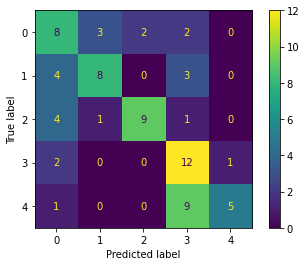

Confusion Matrix for Guassian Naive Bayes


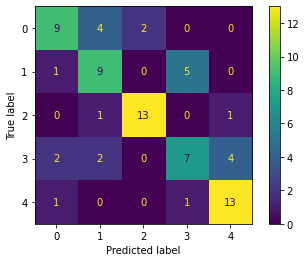

Confusion Matrix for SVM


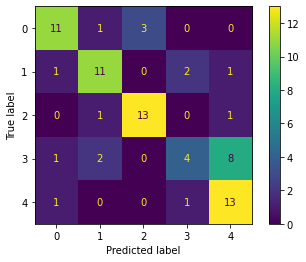

Confusion Matrix for Decision Tree


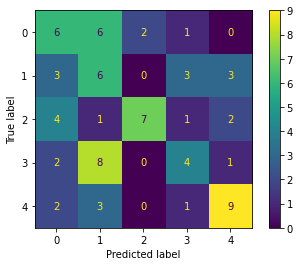

Confusion Matrix for Random Forest Classifier


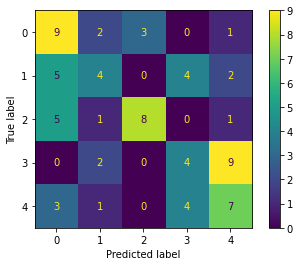

Confusion Matrix for Logistic Regression


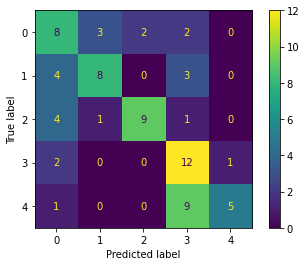

*********Basic Machine Learning Model Analysis for  French_hilbert *********
Models initialized


C:\Users\ridhi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Models Trained
Models Predicted
Accuracy Defined
Confusion Matrix for KNN


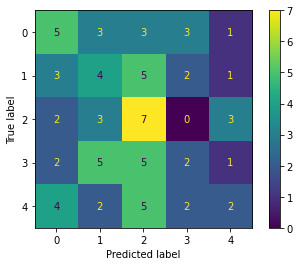

Confusion Matrix for Guassian Naive Bayes


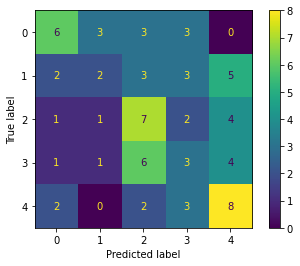

Confusion Matrix for SVM


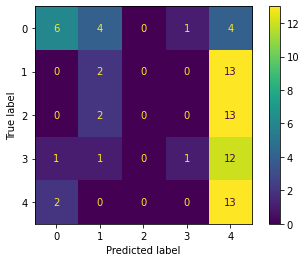

Confusion Matrix for Decision Tree


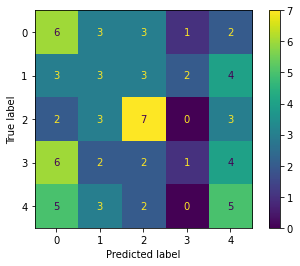

Confusion Matrix for Random Forest Classifier


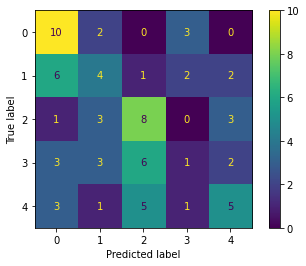

Confusion Matrix for Logistic Regression


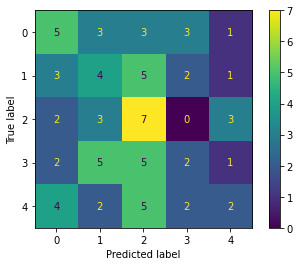

*********Basic Machine Learning Model Analysis for  French_mfcc *********
Models initialized


C:\Users\ridhi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Models Trained
Models Predicted
Accuracy Defined
Confusion Matrix for KNN


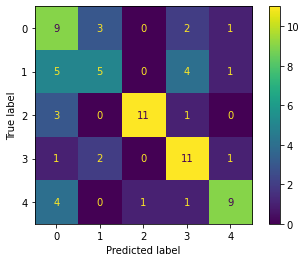

Confusion Matrix for Guassian Naive Bayes


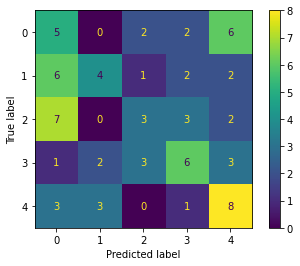

Confusion Matrix for SVM


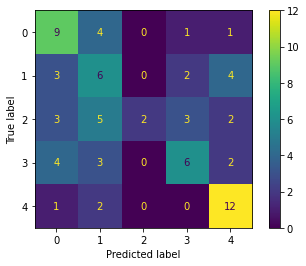

Confusion Matrix for Decision Tree


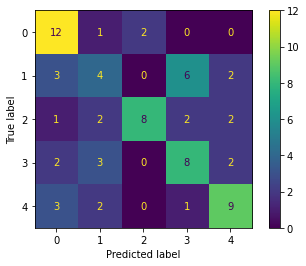

Confusion Matrix for Random Forest Classifier


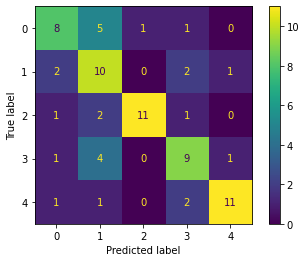

Confusion Matrix for Logistic Regression


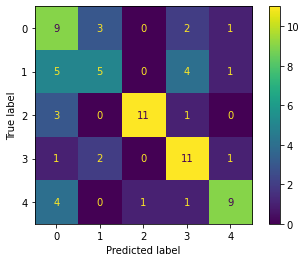

*********Basic Machine Learning Model Analysis for  French_mfcc+fourier *********
Models initialized


C:\Users\ridhi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Models Trained
Models Predicted
Accuracy Defined
Confusion Matrix for KNN


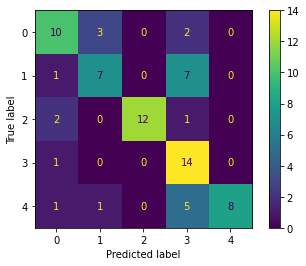

Confusion Matrix for Guassian Naive Bayes


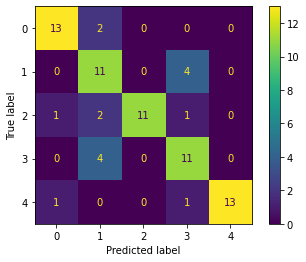

Confusion Matrix for SVM


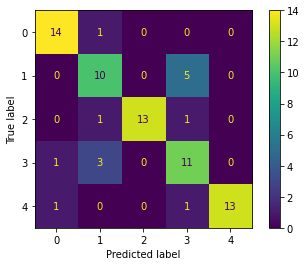

Confusion Matrix for Decision Tree


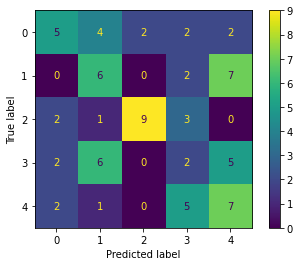

Confusion Matrix for Random Forest Classifier


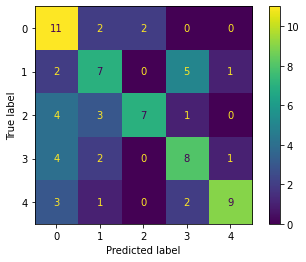

Confusion Matrix for Logistic Regression


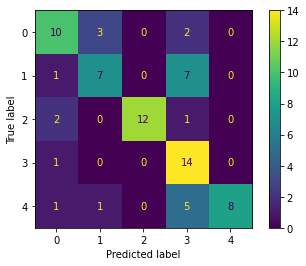

*********Basic Machine Learning Model Analysis for  French_mfcc+fourier+instant *********
Models initialized


C:\Users\ridhi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Models Trained
Models Predicted
Accuracy Defined
Confusion Matrix for KNN


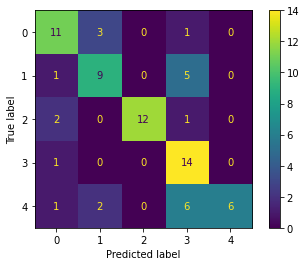

Confusion Matrix for Guassian Naive Bayes


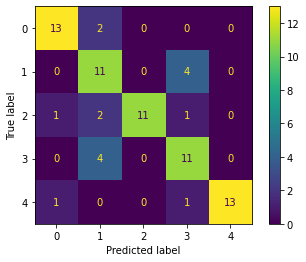

Confusion Matrix for SVM


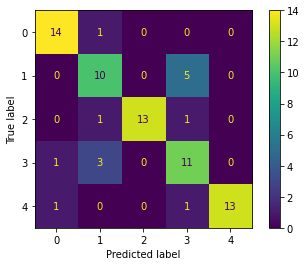

Confusion Matrix for Decision Tree


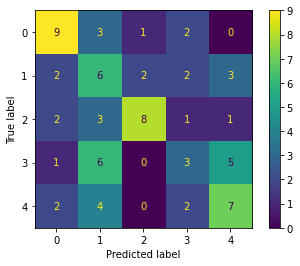

Confusion Matrix for Random Forest Classifier


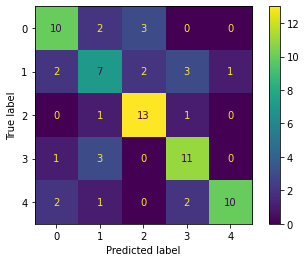

Confusion Matrix for Logistic Regression


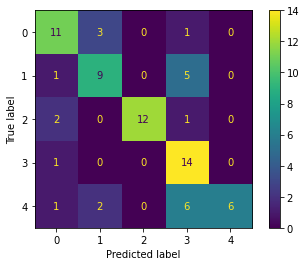

*********Basic Machine Learning Model Analysis for  French_mfcc+instant *********
Models initialized


C:\Users\ridhi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Models Trained
Models Predicted
Accuracy Defined
Confusion Matrix for KNN


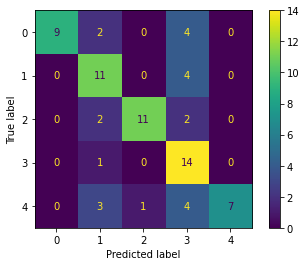

Confusion Matrix for Guassian Naive Bayes


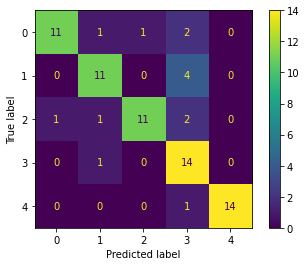

Confusion Matrix for SVM


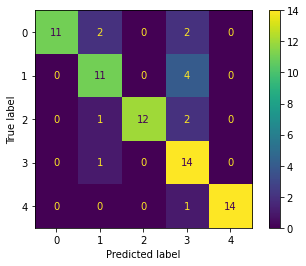

Confusion Matrix for Decision Tree


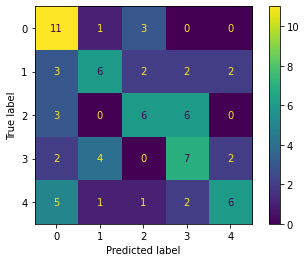

Confusion Matrix for Random Forest Classifier


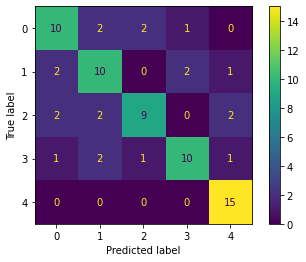

Confusion Matrix for Logistic Regression


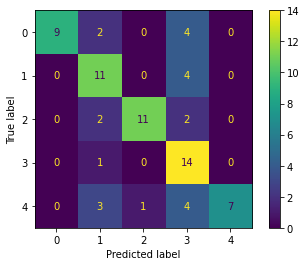

*********Basic Machine Learning Model Analysis for  French_noise_-5dB_babble_fourier+instant *********
Models initialized


C:\Users\ridhi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Models Trained
Models Predicted
Accuracy Defined
Confusion Matrix for KNN


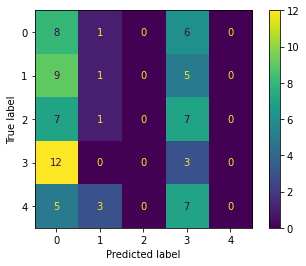

Confusion Matrix for Guassian Naive Bayes


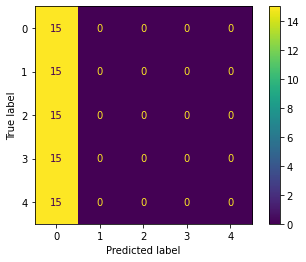

Confusion Matrix for SVM


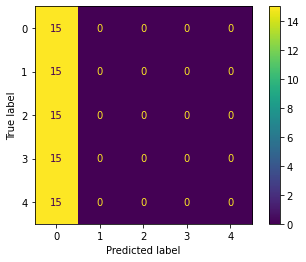

Confusion Matrix for Decision Tree


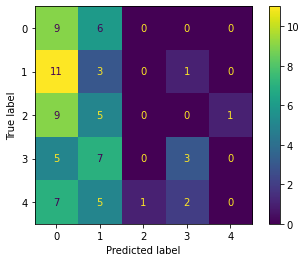

Confusion Matrix for Random Forest Classifier


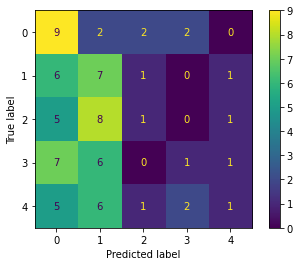

Confusion Matrix for Logistic Regression


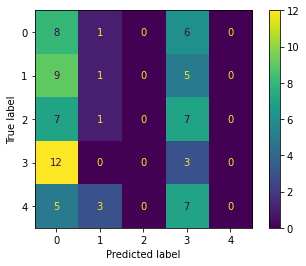

*********Basic Machine Learning Model Analysis for  French_noise_-5dB_babble_hilbert *********
Models initialized


C:\Users\ridhi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Models Trained
Models Predicted
Accuracy Defined
Confusion Matrix for KNN


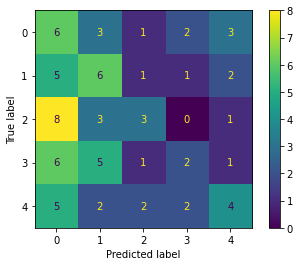

Confusion Matrix for Guassian Naive Bayes


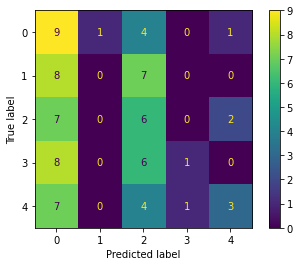

Confusion Matrix for SVM


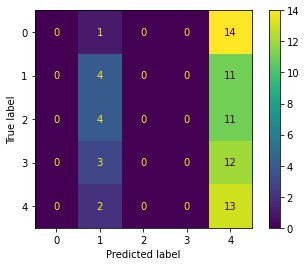

Confusion Matrix for Decision Tree


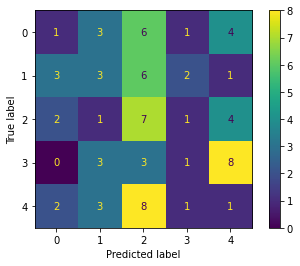

Confusion Matrix for Random Forest Classifier


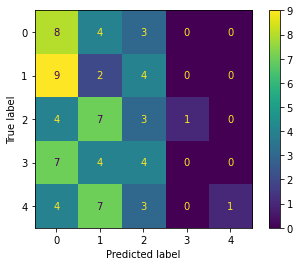

Confusion Matrix for Logistic Regression


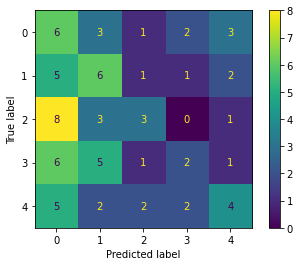

*********Basic Machine Learning Model Analysis for  French_noise_-5dB_babble_mfcc *********
Models initialized


C:\Users\ridhi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Models Trained
Models Predicted
Accuracy Defined
Confusion Matrix for KNN


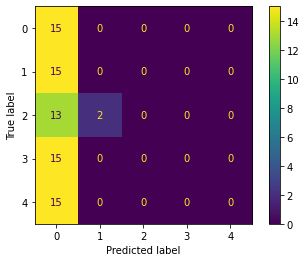

Confusion Matrix for Guassian Naive Bayes


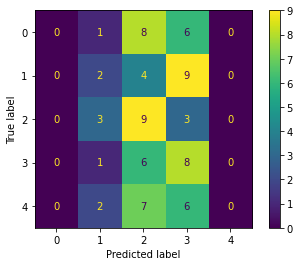

Confusion Matrix for SVM


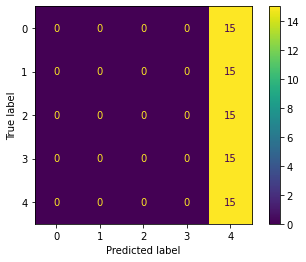

Confusion Matrix for Decision Tree


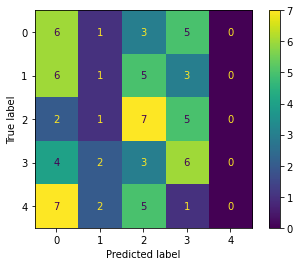

Confusion Matrix for Random Forest Classifier


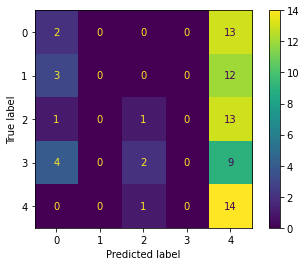

Confusion Matrix for Logistic Regression


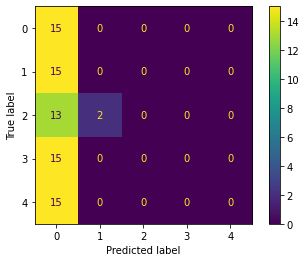

*********Basic Machine Learning Model Analysis for  French_noise_-5dB_babble_mfcc+fourier *********
Models initialized


C:\Users\ridhi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Models Trained
Models Predicted
Accuracy Defined
Confusion Matrix for KNN


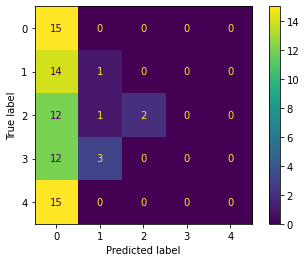

Confusion Matrix for Guassian Naive Bayes


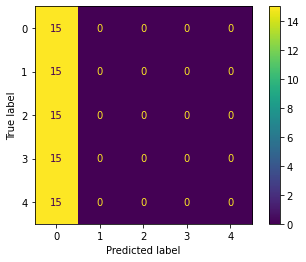

Confusion Matrix for SVM


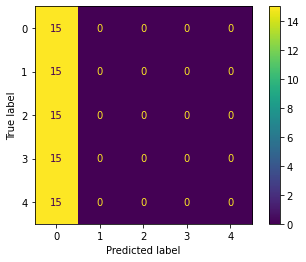

Confusion Matrix for Decision Tree


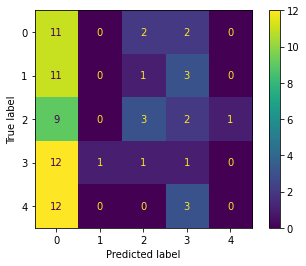

Confusion Matrix for Random Forest Classifier


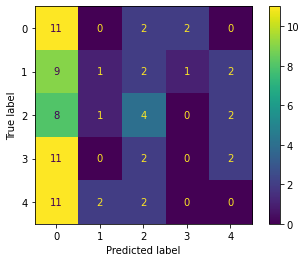

Confusion Matrix for Logistic Regression


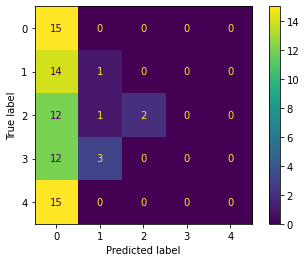

*********Basic Machine Learning Model Analysis for  French_noise_-5dB_babble_mfcc+fourier+instant *********
Models initialized


C:\Users\ridhi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Models Trained
Models Predicted
Accuracy Defined
Confusion Matrix for KNN


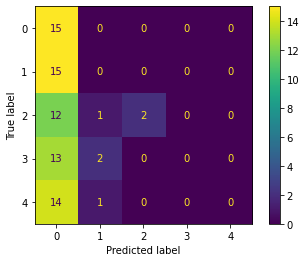

Confusion Matrix for Guassian Naive Bayes


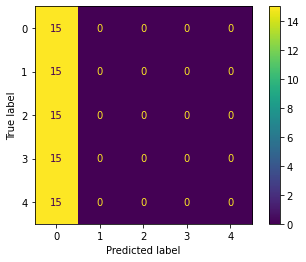

Confusion Matrix for SVM


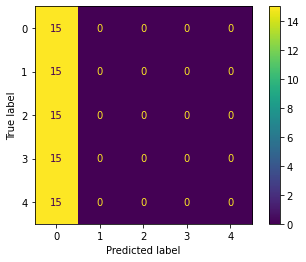

Confusion Matrix for Decision Tree


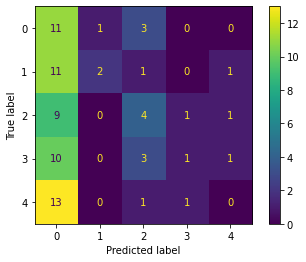

Confusion Matrix for Random Forest Classifier


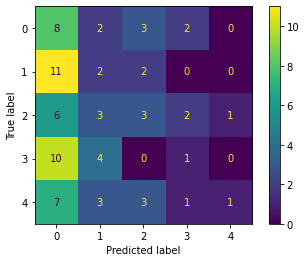

Confusion Matrix for Logistic Regression


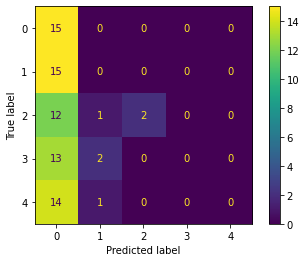

*********Basic Machine Learning Model Analysis for  French_noise_-5dB_babble_mfcc+instant *********
Models initialized


C:\Users\ridhi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Models Trained
Models Predicted
Accuracy Defined
Confusion Matrix for KNN


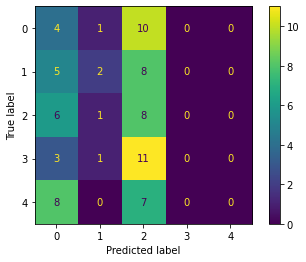

Confusion Matrix for Guassian Naive Bayes


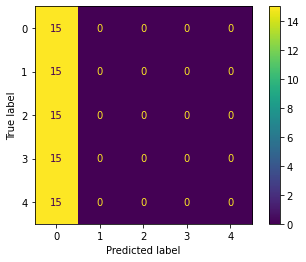

Confusion Matrix for SVM


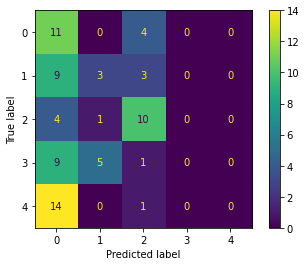

Confusion Matrix for Decision Tree


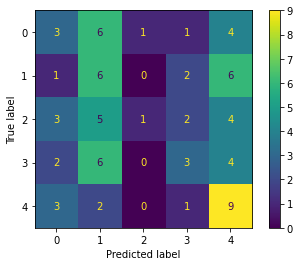

Confusion Matrix for Random Forest Classifier


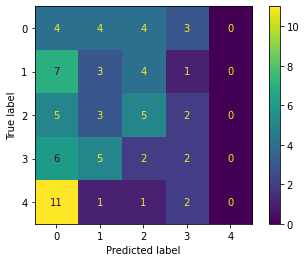

Confusion Matrix for Logistic Regression


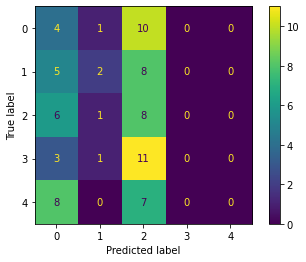

*********Basic Machine Learning Model Analysis for  French_noise_-5dB_babble_spectrograms *********
Models initialized


C:\Users\ridhi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Models Trained
Models Predicted
Accuracy Defined
Confusion Matrix for KNN


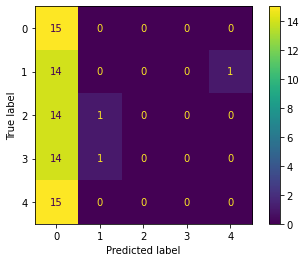

Confusion Matrix for Guassian Naive Bayes


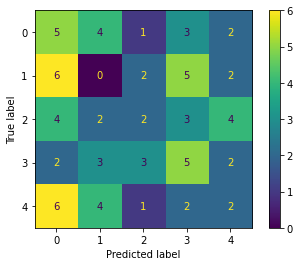

Confusion Matrix for SVM


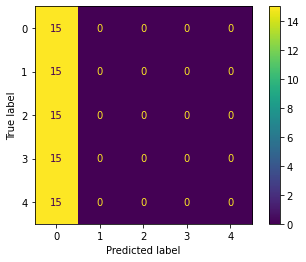

Confusion Matrix for Decision Tree


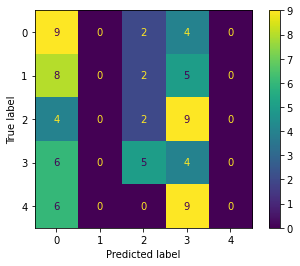

Confusion Matrix for Random Forest Classifier


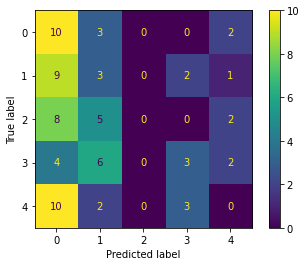

Confusion Matrix for Logistic Regression


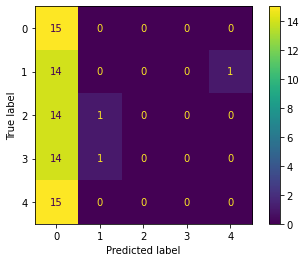

*********Basic Machine Learning Model Analysis for  French_noise_-5dB_hf_channel_fourier+instant *********
Models initialized


C:\Users\ridhi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Models Trained
Models Predicted
Accuracy Defined
Confusion Matrix for KNN


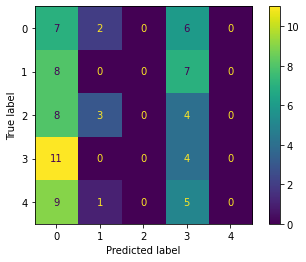

Confusion Matrix for Guassian Naive Bayes


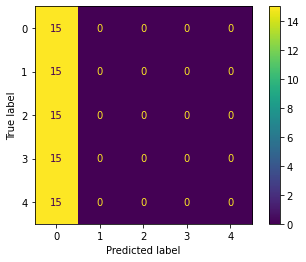

Confusion Matrix for SVM


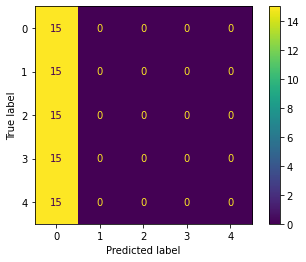

Confusion Matrix for Decision Tree


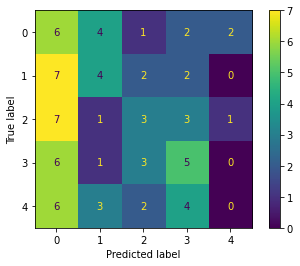

Confusion Matrix for Random Forest Classifier


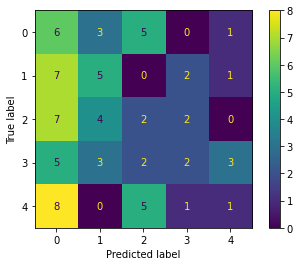

Confusion Matrix for Logistic Regression


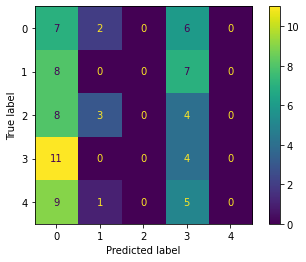

*********Basic Machine Learning Model Analysis for  French_noise_-5dB_hf_channel_hilbert *********
Models initialized


C:\Users\ridhi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Models Trained
Models Predicted
Accuracy Defined
Confusion Matrix for KNN


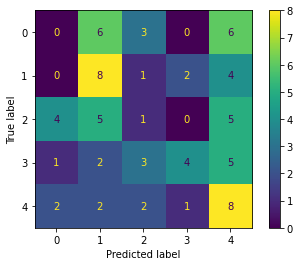

Confusion Matrix for Guassian Naive Bayes


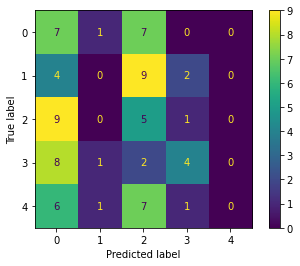

Confusion Matrix for SVM


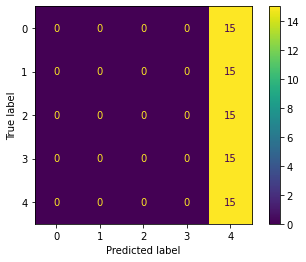

Confusion Matrix for Decision Tree


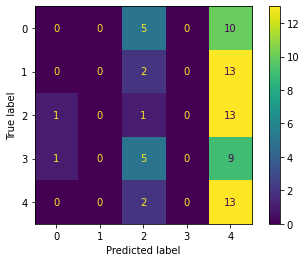

Confusion Matrix for Random Forest Classifier


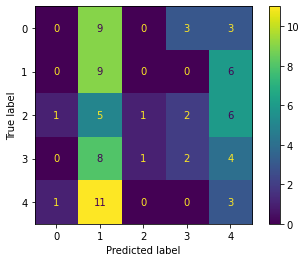

Confusion Matrix for Logistic Regression


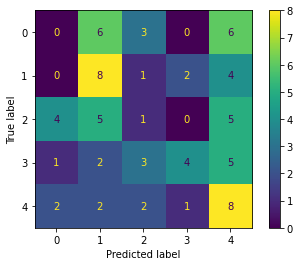

*********Basic Machine Learning Model Analysis for  French_noise_-5dB_hf_channel_mfcc *********
Models initialized


C:\Users\ridhi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Models Trained
Models Predicted
Accuracy Defined
Confusion Matrix for KNN


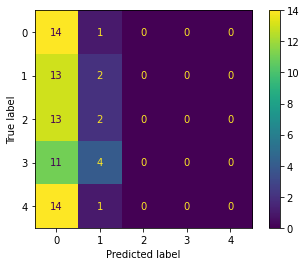

Confusion Matrix for Guassian Naive Bayes


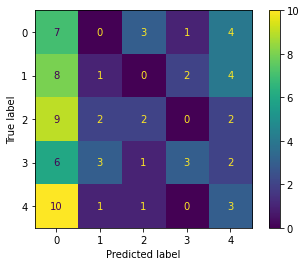

Confusion Matrix for SVM


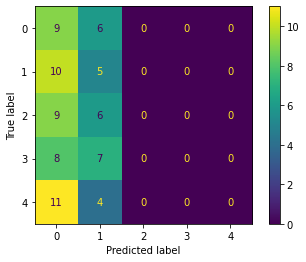

Confusion Matrix for Decision Tree


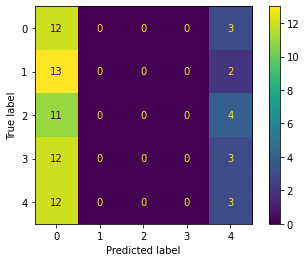

Confusion Matrix for Random Forest Classifier


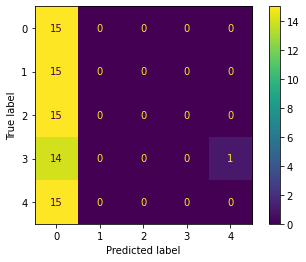

Confusion Matrix for Logistic Regression


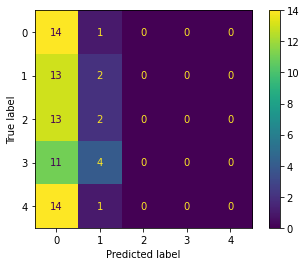

*********Basic Machine Learning Model Analysis for  French_noise_-5dB_hf_channel_mfcc+fourier *********
Models initialized


C:\Users\ridhi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Models Trained
Models Predicted
Accuracy Defined
Confusion Matrix for KNN


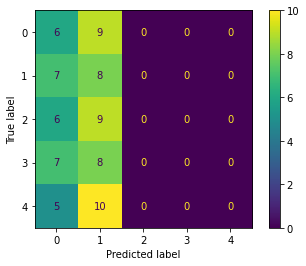

Confusion Matrix for Guassian Naive Bayes


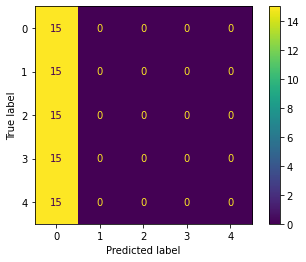

Confusion Matrix for SVM


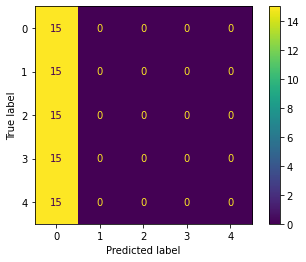

Confusion Matrix for Decision Tree


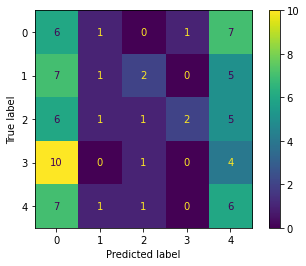

Confusion Matrix for Random Forest Classifier


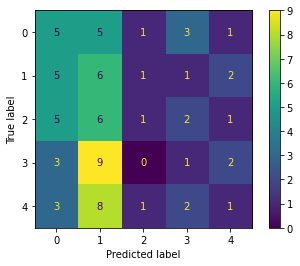

Confusion Matrix for Logistic Regression


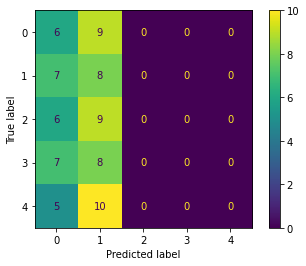

*********Basic Machine Learning Model Analysis for  French_noise_-5dB_hf_channel_mfcc+fourier+instant *********
Models initialized


C:\Users\ridhi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Models Trained
Models Predicted
Accuracy Defined
Confusion Matrix for KNN


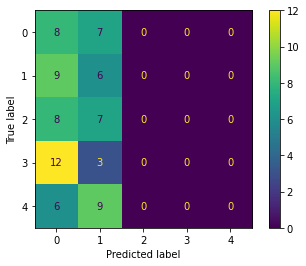

Confusion Matrix for Guassian Naive Bayes


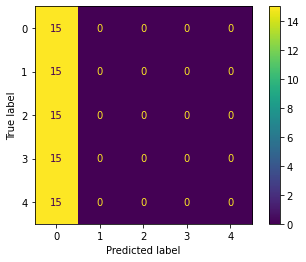

Confusion Matrix for SVM


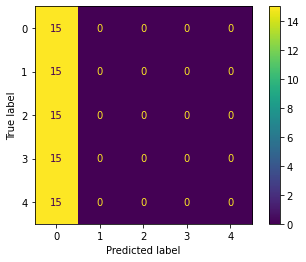

Confusion Matrix for Decision Tree


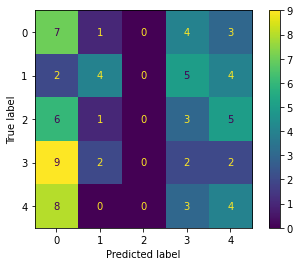

Confusion Matrix for Random Forest Classifier


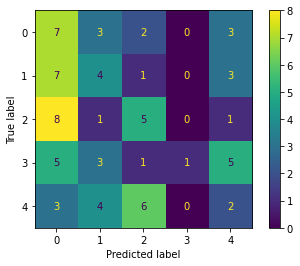

Confusion Matrix for Logistic Regression


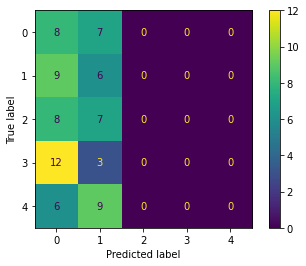

*********Basic Machine Learning Model Analysis for  French_noise_-5dB_hf_channel_mfcc+instant *********
Models initialized


C:\Users\ridhi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Models Trained
Models Predicted
Accuracy Defined
Confusion Matrix for KNN


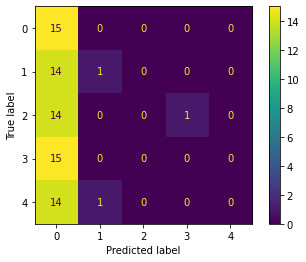

Confusion Matrix for Guassian Naive Bayes


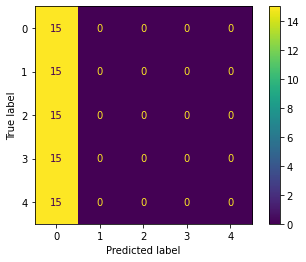

Confusion Matrix for SVM


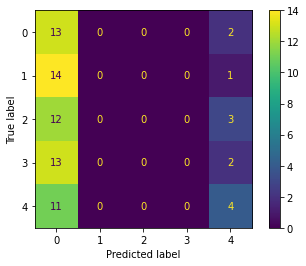

Confusion Matrix for Decision Tree


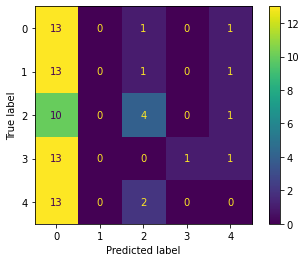

Confusion Matrix for Random Forest Classifier


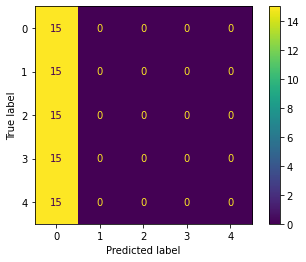

Confusion Matrix for Logistic Regression


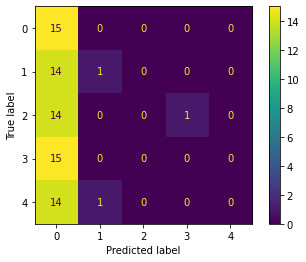

*********Basic Machine Learning Model Analysis for  French_noise_-5dB_hf_channel_spectrograms *********
Models initialized


C:\Users\ridhi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Models Trained
Models Predicted
Accuracy Defined
Confusion Matrix for KNN


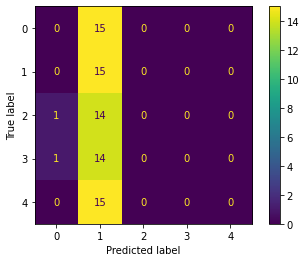

Confusion Matrix for Guassian Naive Bayes


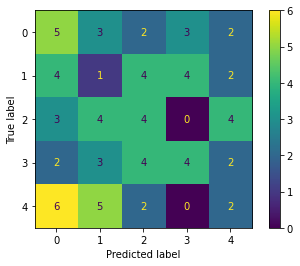

Confusion Matrix for SVM


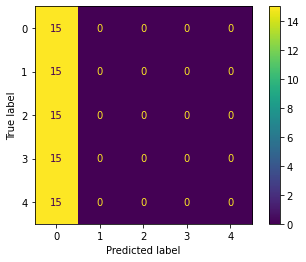

Confusion Matrix for Decision Tree


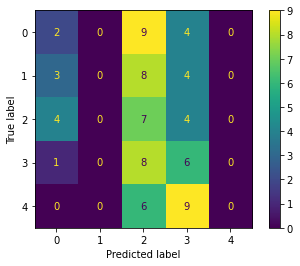

Confusion Matrix for Random Forest Classifier


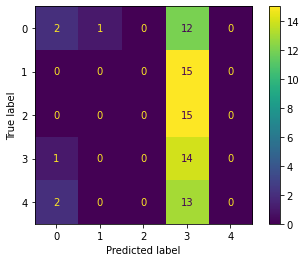

Confusion Matrix for Logistic Regression


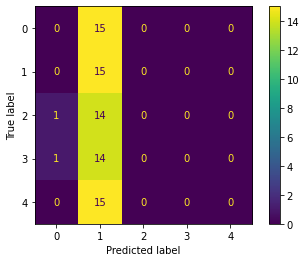

*********Basic Machine Learning Model Analysis for  French_noise_-5dB_white_noise_fourier+instant *********
Models initialized


C:\Users\ridhi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Models Trained
Models Predicted
Accuracy Defined
Confusion Matrix for KNN


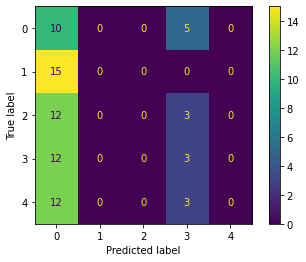

Confusion Matrix for Guassian Naive Bayes


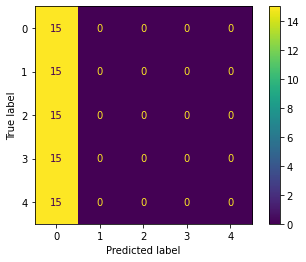

Confusion Matrix for SVM


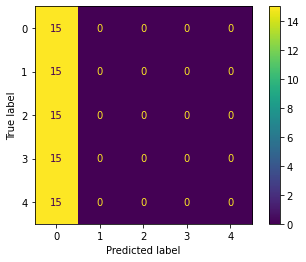

Confusion Matrix for Decision Tree


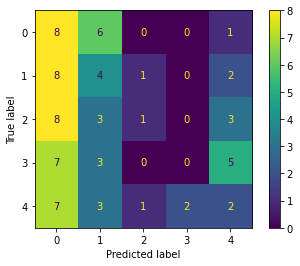

Confusion Matrix for Random Forest Classifier


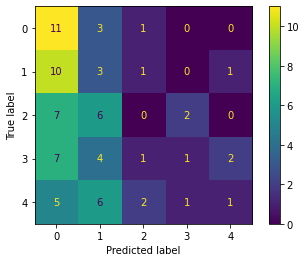

Confusion Matrix for Logistic Regression


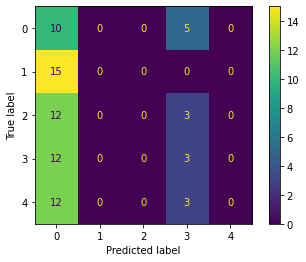

*********Basic Machine Learning Model Analysis for  French_noise_-5dB_white_noise_hilbert *********
Models initialized


C:\Users\ridhi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Models Trained
Models Predicted
Accuracy Defined
Confusion Matrix for KNN


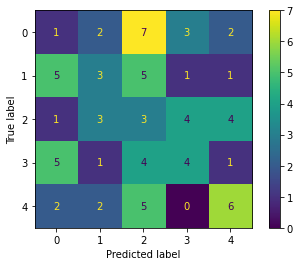

Confusion Matrix for Guassian Naive Bayes


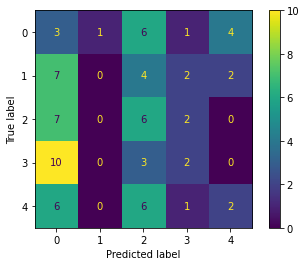

Confusion Matrix for SVM


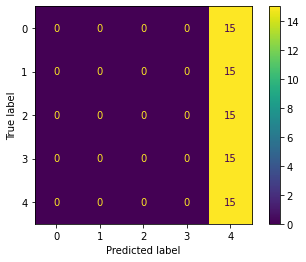

Confusion Matrix for Decision Tree


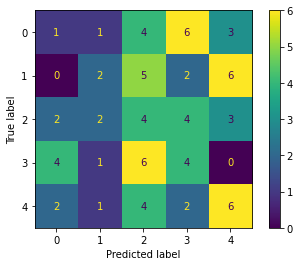

Confusion Matrix for Random Forest Classifier


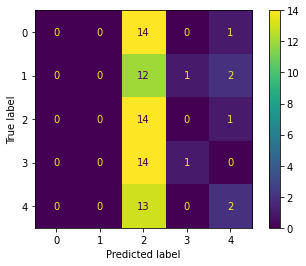

Confusion Matrix for Logistic Regression


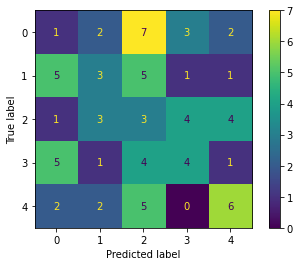

*********Basic Machine Learning Model Analysis for  French_noise_-5dB_white_noise_mfcc *********
Models initialized


C:\Users\ridhi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Models Trained
Models Predicted
Accuracy Defined
Confusion Matrix for KNN


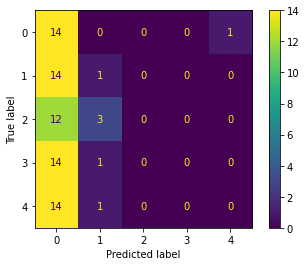

Confusion Matrix for Guassian Naive Bayes


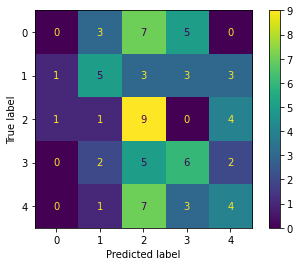

Confusion Matrix for SVM


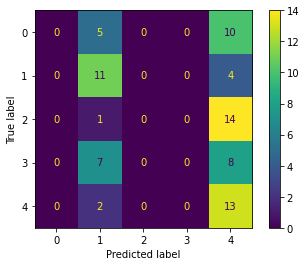

Confusion Matrix for Decision Tree


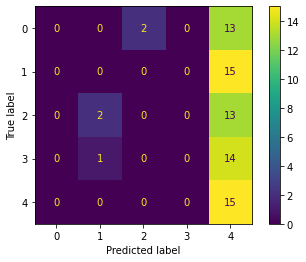

Confusion Matrix for Random Forest Classifier


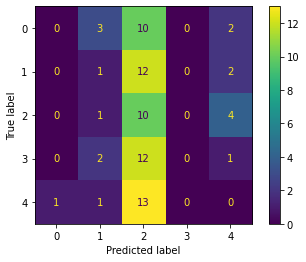

Confusion Matrix for Logistic Regression


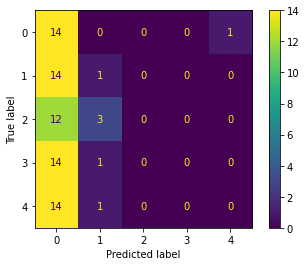

*********Basic Machine Learning Model Analysis for  French_noise_-5dB_white_noise_mfcc+fourier *********
Models initialized


C:\Users\ridhi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Models Trained
Models Predicted
Accuracy Defined
Confusion Matrix for KNN


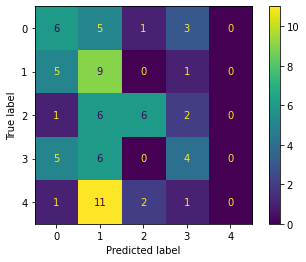

Confusion Matrix for Guassian Naive Bayes


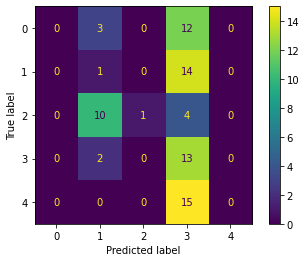

Confusion Matrix for SVM


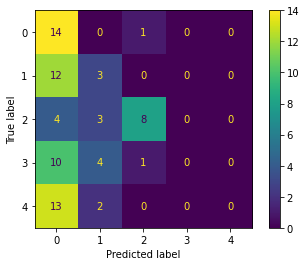

Confusion Matrix for Decision Tree


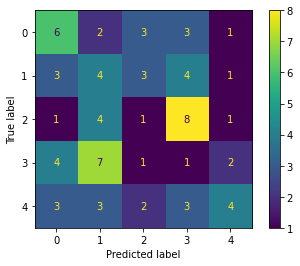

Confusion Matrix for Random Forest Classifier


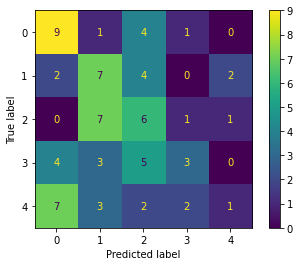

Confusion Matrix for Logistic Regression


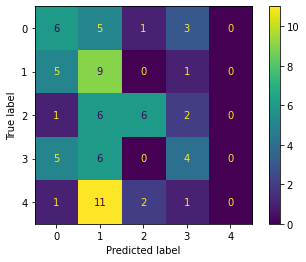

*********Basic Machine Learning Model Analysis for  French_noise_-5dB_white_noise_mfcc+fourier+instant *********
Models initialized


C:\Users\ridhi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Models Trained
Models Predicted
Accuracy Defined
Confusion Matrix for KNN


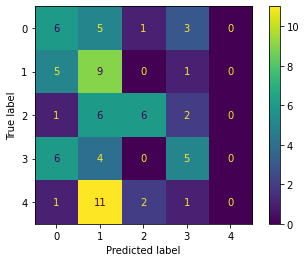

Confusion Matrix for Guassian Naive Bayes


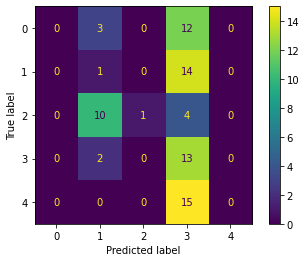

Confusion Matrix for SVM


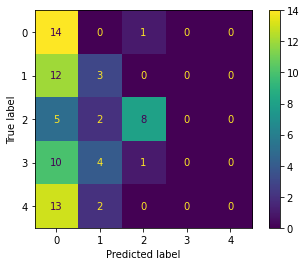

Confusion Matrix for Decision Tree


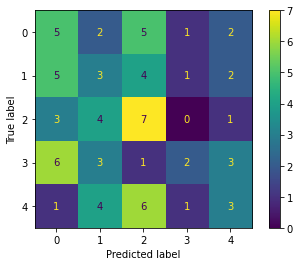

Confusion Matrix for Random Forest Classifier


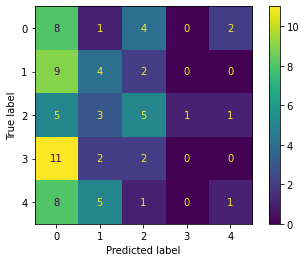

Confusion Matrix for Logistic Regression


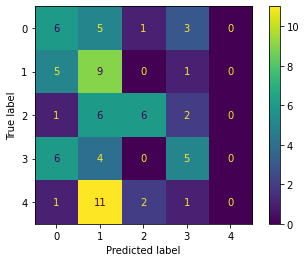

*********Basic Machine Learning Model Analysis for  French_noise_-5dB_white_noise_mfcc+instant *********
Models initialized


C:\Users\ridhi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Models Trained
Models Predicted
Accuracy Defined
Confusion Matrix for KNN


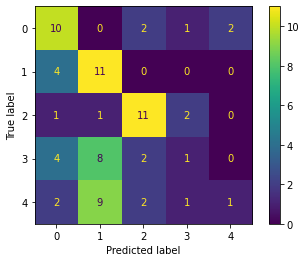

Confusion Matrix for Guassian Naive Bayes


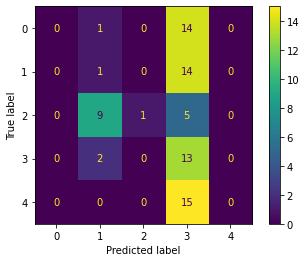

Confusion Matrix for SVM


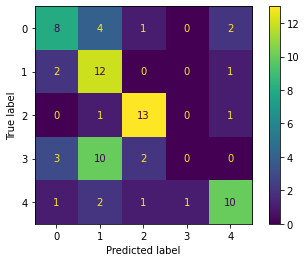

Confusion Matrix for Decision Tree


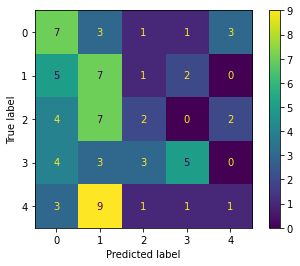

Confusion Matrix for Random Forest Classifier


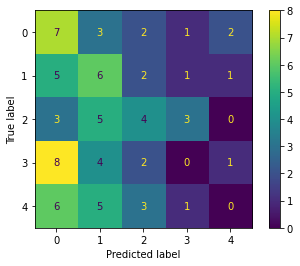

Confusion Matrix for Logistic Regression


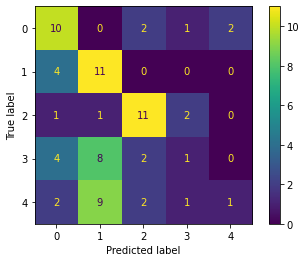

*********Basic Machine Learning Model Analysis for  French_noise_-5dB_white_noise_spectrograms *********
Models initialized


C:\Users\ridhi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Models Trained
Models Predicted
Accuracy Defined
Confusion Matrix for KNN


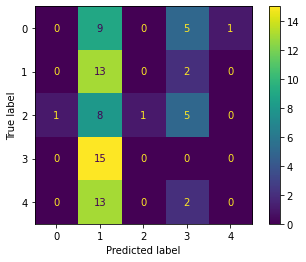

Confusion Matrix for Guassian Naive Bayes


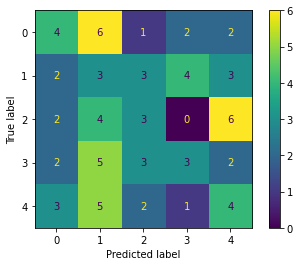

Confusion Matrix for SVM


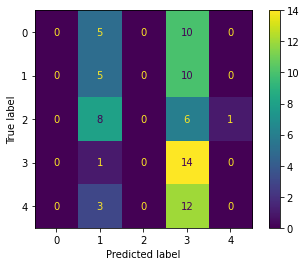

Confusion Matrix for Decision Tree


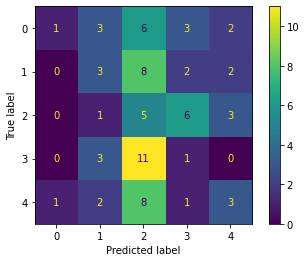

Confusion Matrix for Random Forest Classifier


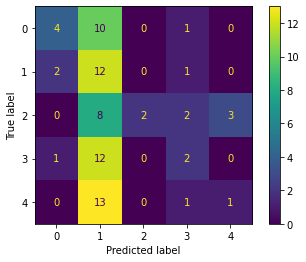

Confusion Matrix for Logistic Regression


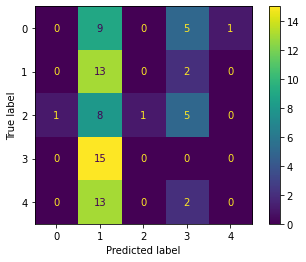

*********Basic Machine Learning Model Analysis for  French_noise_0dB_babble_fourier+instant *********
Models initialized


C:\Users\ridhi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Models Trained
Models Predicted
Accuracy Defined
Confusion Matrix for KNN


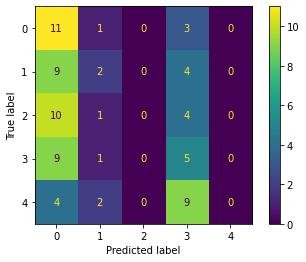

Confusion Matrix for Guassian Naive Bayes


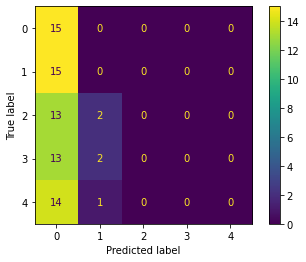

Confusion Matrix for SVM


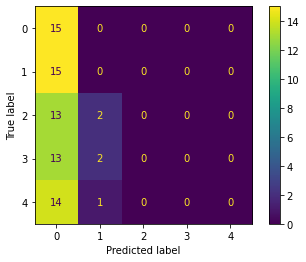

Confusion Matrix for Decision Tree


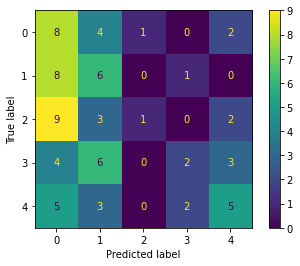

Confusion Matrix for Random Forest Classifier


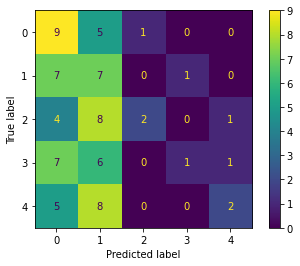

Confusion Matrix for Logistic Regression


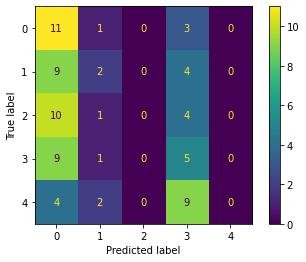

*********Basic Machine Learning Model Analysis for  French_noise_0dB_babble_hilbert *********
Models initialized


C:\Users\ridhi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Models Trained
Models Predicted
Accuracy Defined
Confusion Matrix for KNN


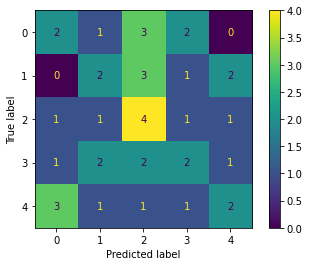

Confusion Matrix for Guassian Naive Bayes


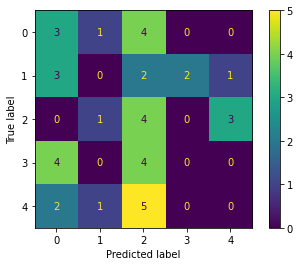

Confusion Matrix for SVM


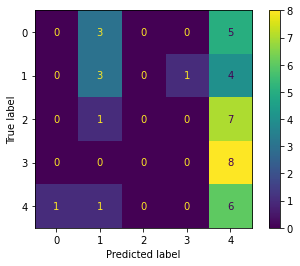

Confusion Matrix for Decision Tree


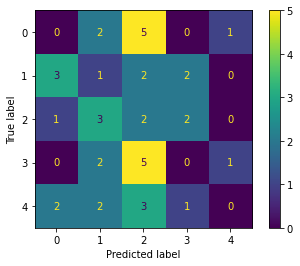

Confusion Matrix for Random Forest Classifier


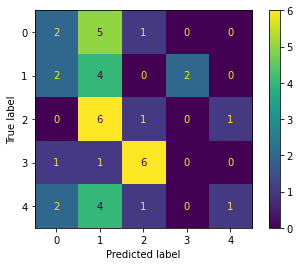

Confusion Matrix for Logistic Regression


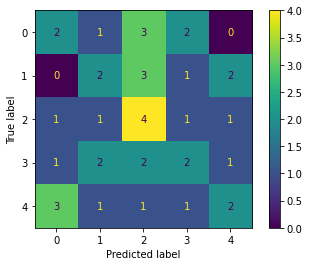

*********Basic Machine Learning Model Analysis for  French_noise_0dB_babble_mfcc *********
Models initialized


C:\Users\ridhi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Models Trained
Models Predicted
Accuracy Defined
Confusion Matrix for KNN


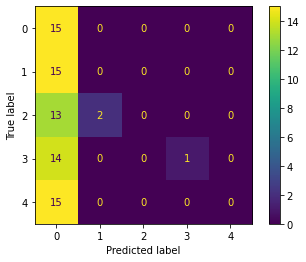

Confusion Matrix for Guassian Naive Bayes


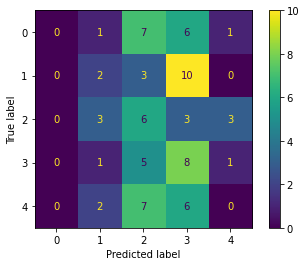

Confusion Matrix for SVM


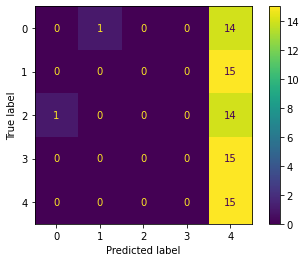

Confusion Matrix for Decision Tree


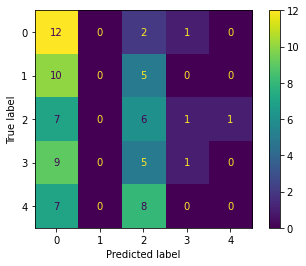

Confusion Matrix for Random Forest Classifier


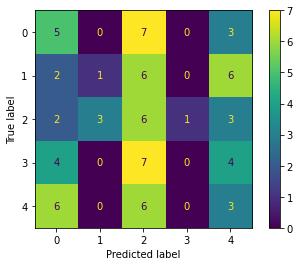

Confusion Matrix for Logistic Regression


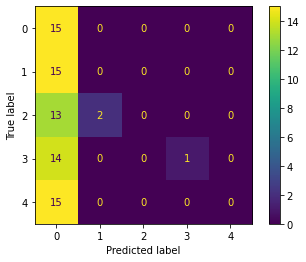

*********Basic Machine Learning Model Analysis for  French_noise_0dB_babble_mfcc+fourier *********
Models initialized


C:\Users\ridhi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Models Trained
Models Predicted
Accuracy Defined
Confusion Matrix for KNN


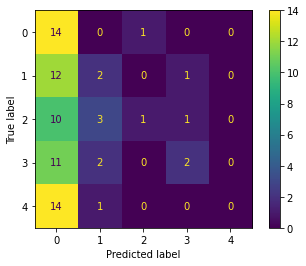

Confusion Matrix for Guassian Naive Bayes


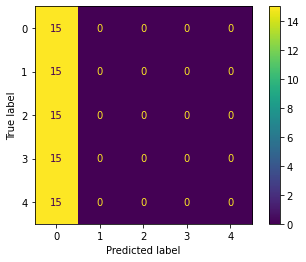

Confusion Matrix for SVM


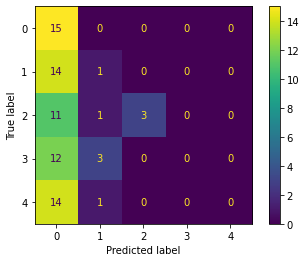

Confusion Matrix for Decision Tree


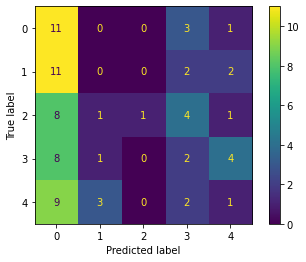

Confusion Matrix for Random Forest Classifier


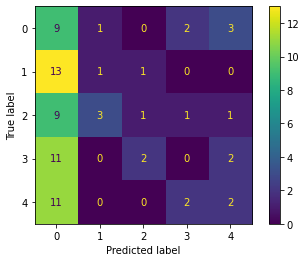

Confusion Matrix for Logistic Regression


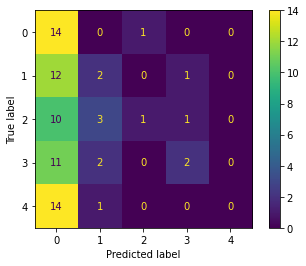

*********Basic Machine Learning Model Analysis for  French_noise_0dB_babble_mfcc+fourier+instant *********
Models initialized


C:\Users\ridhi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Models Trained
Models Predicted
Accuracy Defined
Confusion Matrix for KNN


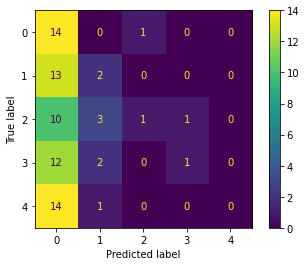

Confusion Matrix for Guassian Naive Bayes


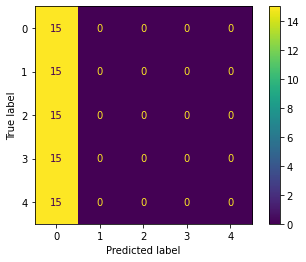

Confusion Matrix for SVM


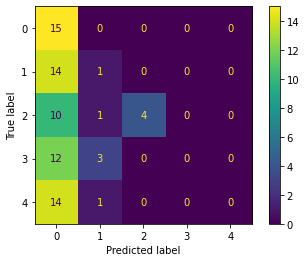

Confusion Matrix for Decision Tree


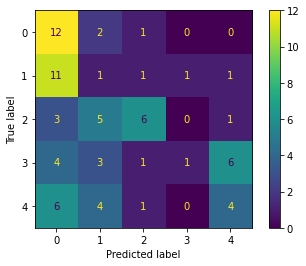

Confusion Matrix for Random Forest Classifier


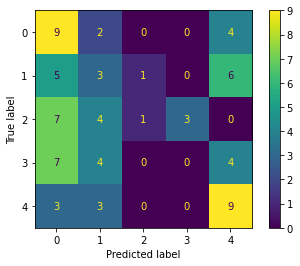

Confusion Matrix for Logistic Regression


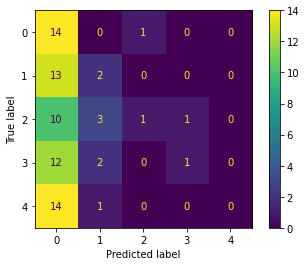

*********Basic Machine Learning Model Analysis for  French_noise_0dB_babble_mfcc+instant *********
Models initialized


C:\Users\ridhi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Models Trained
Models Predicted
Accuracy Defined
Confusion Matrix for KNN


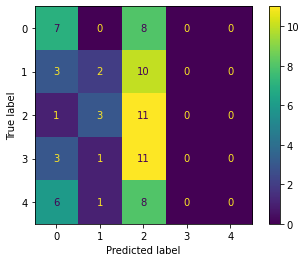

Confusion Matrix for Guassian Naive Bayes


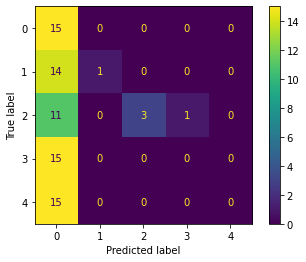

Confusion Matrix for SVM


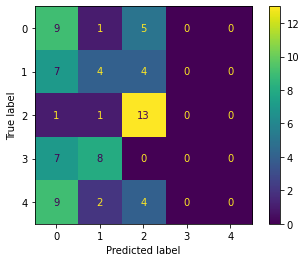

Confusion Matrix for Decision Tree


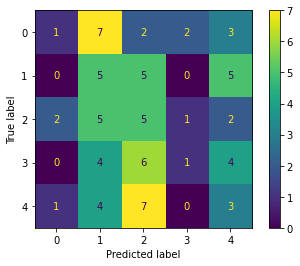

Confusion Matrix for Random Forest Classifier


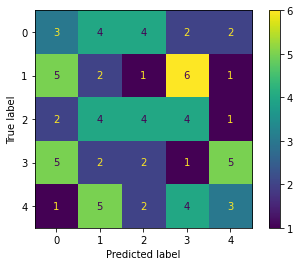

Confusion Matrix for Logistic Regression


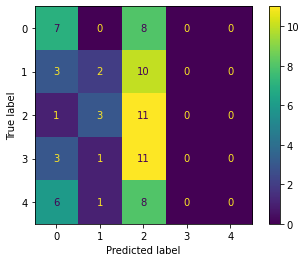

*********Basic Machine Learning Model Analysis for  French_noise_0dB_babble_spectrograms *********
Models initialized


C:\Users\ridhi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Models Trained
Models Predicted
Accuracy Defined
Confusion Matrix for KNN


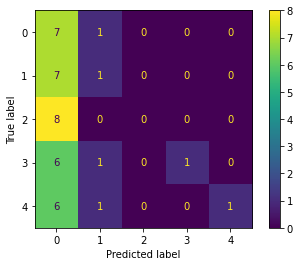

Confusion Matrix for Guassian Naive Bayes


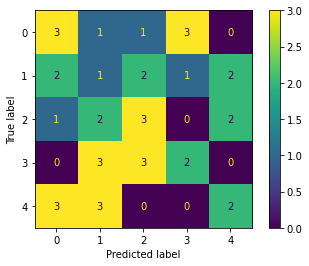

Confusion Matrix for SVM


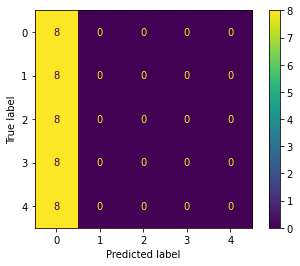

Confusion Matrix for Decision Tree


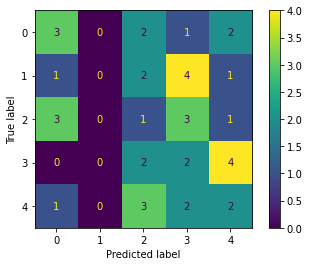

Confusion Matrix for Random Forest Classifier


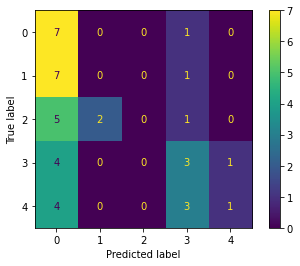

Confusion Matrix for Logistic Regression


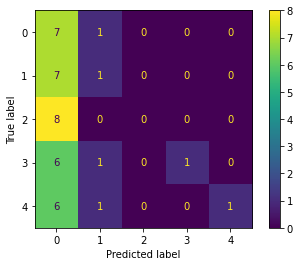

*********Basic Machine Learning Model Analysis for  French_noise_0dB_hf_channel_fourier+instant *********
Models initialized


C:\Users\ridhi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Models Trained
Models Predicted
Accuracy Defined
Confusion Matrix for KNN


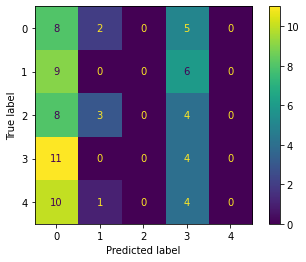

Confusion Matrix for Guassian Naive Bayes


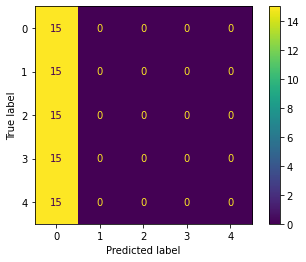

Confusion Matrix for SVM


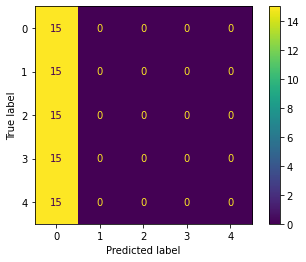

Confusion Matrix for Decision Tree


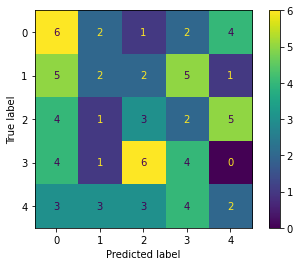

Confusion Matrix for Random Forest Classifier


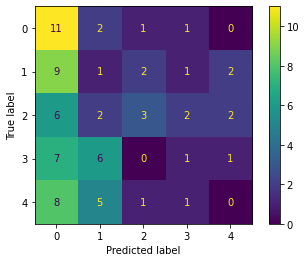

Confusion Matrix for Logistic Regression


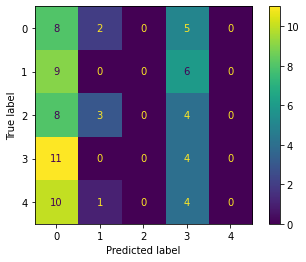

*********Basic Machine Learning Model Analysis for  French_noise_0dB_hf_channel_hilbert *********
Models initialized


C:\Users\ridhi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Models Trained
Models Predicted
Accuracy Defined
Confusion Matrix for KNN


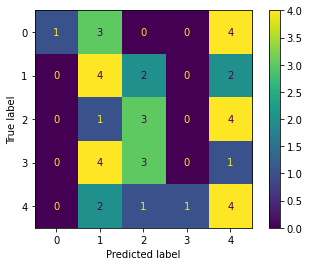

Confusion Matrix for Guassian Naive Bayes


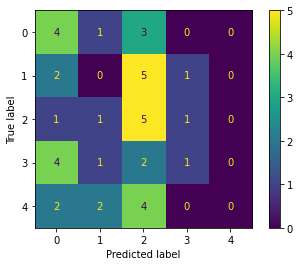

Confusion Matrix for SVM


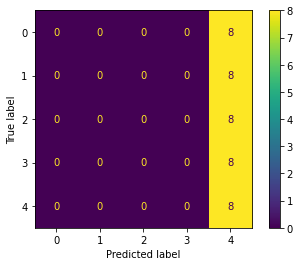

Confusion Matrix for Decision Tree


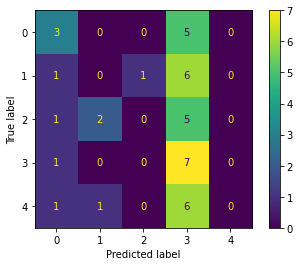

Confusion Matrix for Random Forest Classifier


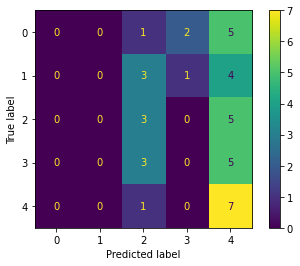

Confusion Matrix for Logistic Regression


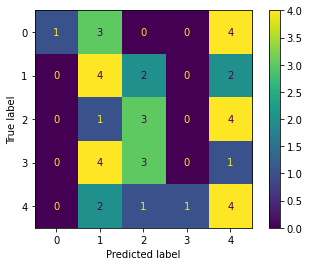

*********Basic Machine Learning Model Analysis for  French_noise_0dB_hf_channel_mfcc *********
Models initialized


C:\Users\ridhi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Models Trained
Models Predicted
Accuracy Defined
Confusion Matrix for KNN


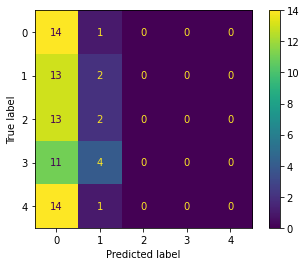

Confusion Matrix for Guassian Naive Bayes


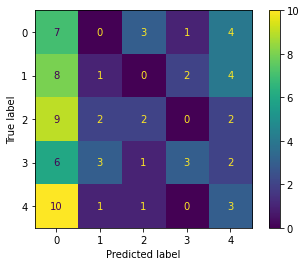

Confusion Matrix for SVM


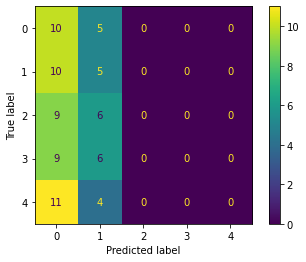

Confusion Matrix for Decision Tree


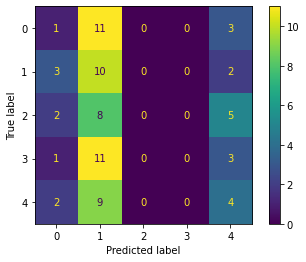

Confusion Matrix for Random Forest Classifier


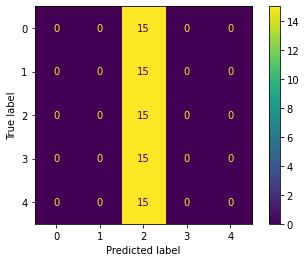

Confusion Matrix for Logistic Regression


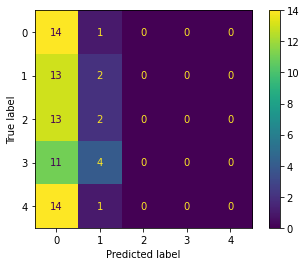

*********Basic Machine Learning Model Analysis for  French_noise_0dB_hf_channel_mfcc+fourier *********
Models initialized


C:\Users\ridhi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Models Trained
Models Predicted
Accuracy Defined
Confusion Matrix for KNN


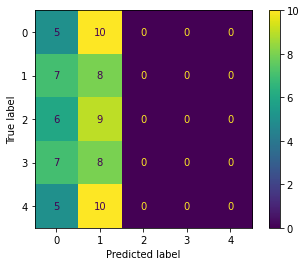

Confusion Matrix for Guassian Naive Bayes


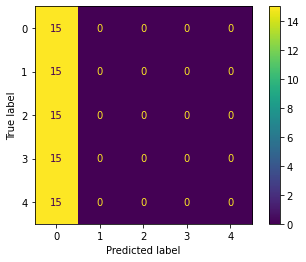

Confusion Matrix for SVM


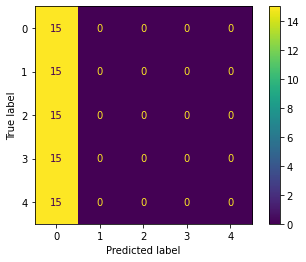

Confusion Matrix for Decision Tree


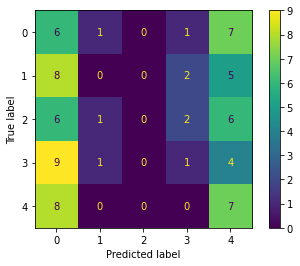

Confusion Matrix for Random Forest Classifier


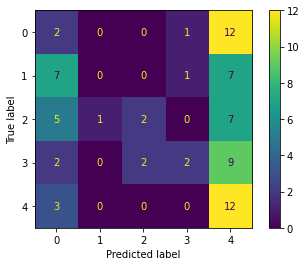

Confusion Matrix for Logistic Regression


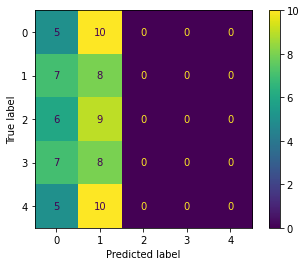

*********Basic Machine Learning Model Analysis for  French_noise_0dB_hf_channel_mfcc+fourier+instant *********
Models initialized


C:\Users\ridhi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Models Trained
Models Predicted
Accuracy Defined
Confusion Matrix for KNN


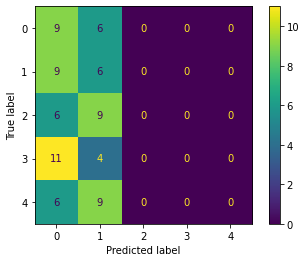

Confusion Matrix for Guassian Naive Bayes


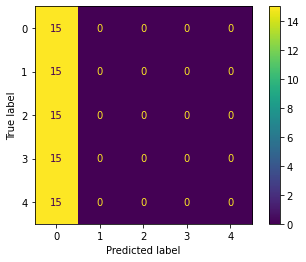

Confusion Matrix for SVM


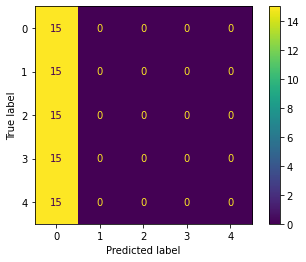

Confusion Matrix for Decision Tree


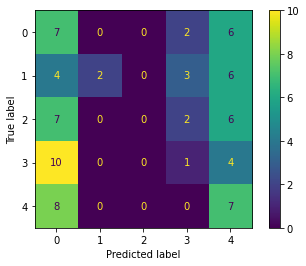

Confusion Matrix for Random Forest Classifier


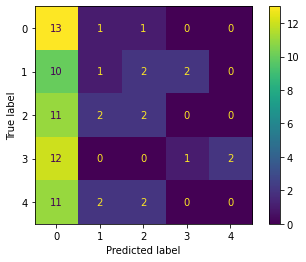

Confusion Matrix for Logistic Regression


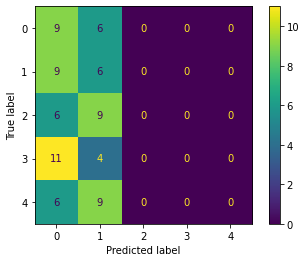

*********Basic Machine Learning Model Analysis for  French_noise_0dB_hf_channel_mfcc+instant *********
Models initialized


C:\Users\ridhi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Models Trained
Models Predicted
Accuracy Defined
Confusion Matrix for KNN


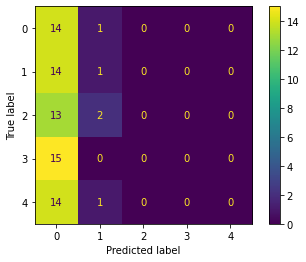

Confusion Matrix for Guassian Naive Bayes


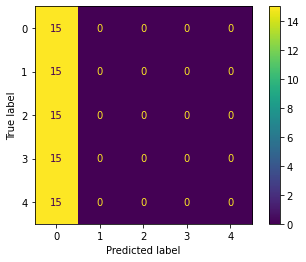

Confusion Matrix for SVM


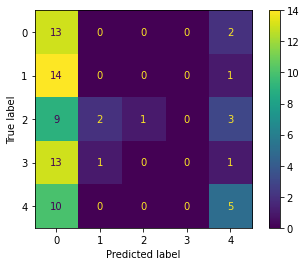

Confusion Matrix for Decision Tree


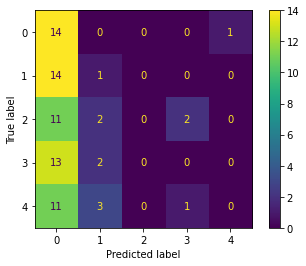

Confusion Matrix for Random Forest Classifier


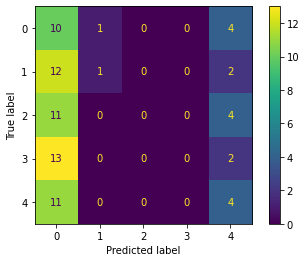

Confusion Matrix for Logistic Regression


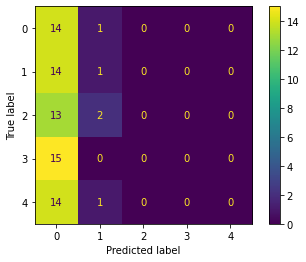

*********Basic Machine Learning Model Analysis for  French_noise_0dB_hf_channel_spectrograms *********
Models initialized


C:\Users\ridhi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Models Trained
Models Predicted
Accuracy Defined
Confusion Matrix for KNN


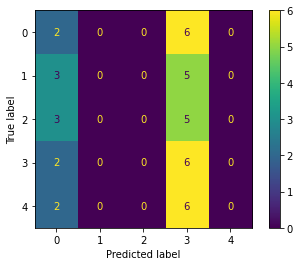

Confusion Matrix for Guassian Naive Bayes


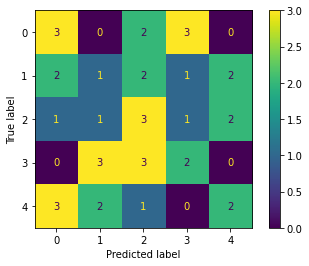

Confusion Matrix for SVM


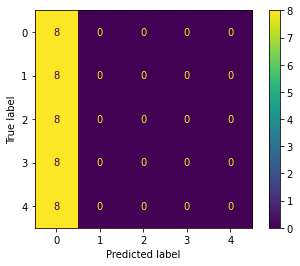

Confusion Matrix for Decision Tree


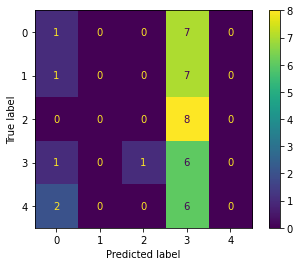

Confusion Matrix for Random Forest Classifier


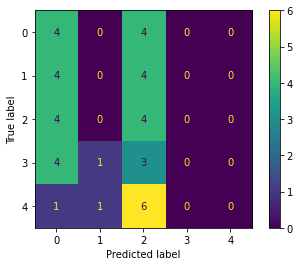

Confusion Matrix for Logistic Regression


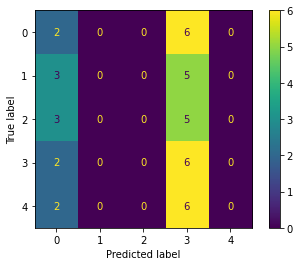

*********Basic Machine Learning Model Analysis for  French_noise_0dB_white_noise_fourier+instant *********
Models initialized


C:\Users\ridhi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Models Trained
Models Predicted
Accuracy Defined
Confusion Matrix for KNN


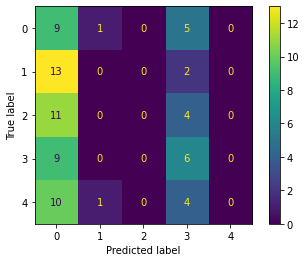

Confusion Matrix for Guassian Naive Bayes


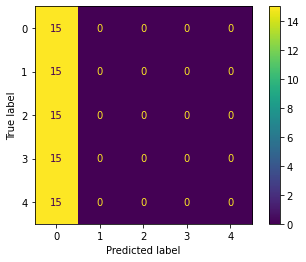

Confusion Matrix for SVM


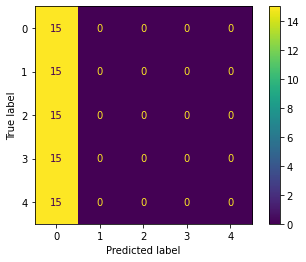

Confusion Matrix for Decision Tree


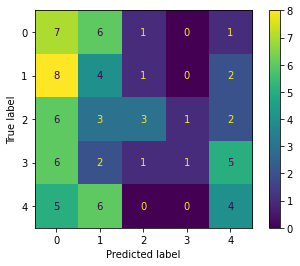

Confusion Matrix for Random Forest Classifier


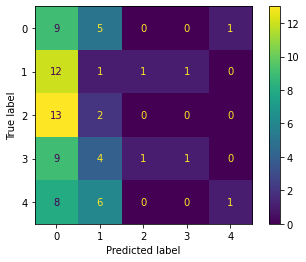

Confusion Matrix for Logistic Regression


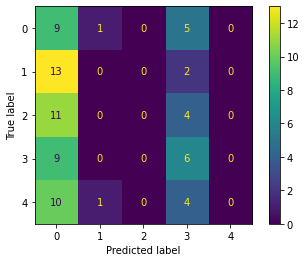

*********Basic Machine Learning Model Analysis for  French_noise_0dB_white_noise_hilbert *********
Models initialized


C:\Users\ridhi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Models Trained
Models Predicted
Accuracy Defined
Confusion Matrix for KNN


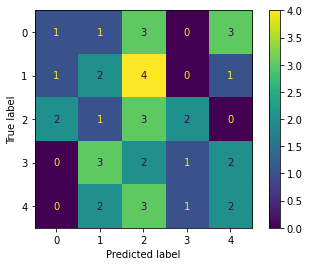

Confusion Matrix for Guassian Naive Bayes


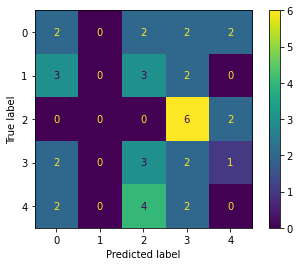

Confusion Matrix for SVM


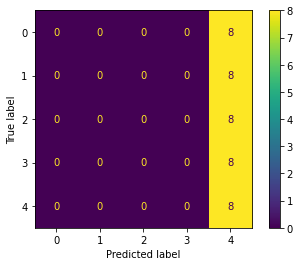

Confusion Matrix for Decision Tree


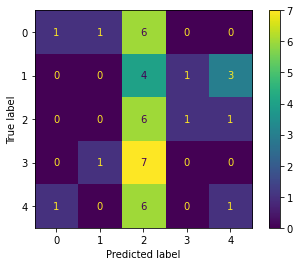

Confusion Matrix for Random Forest Classifier


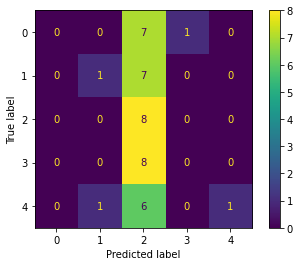

Confusion Matrix for Logistic Regression


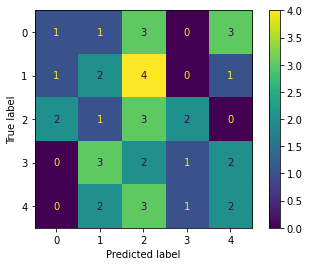

*********Basic Machine Learning Model Analysis for  French_noise_0dB_white_noise_mfcc *********
Models initialized


C:\Users\ridhi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Models Trained
Models Predicted
Accuracy Defined
Confusion Matrix for KNN


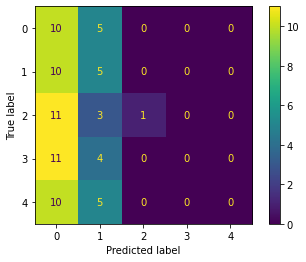

Confusion Matrix for Guassian Naive Bayes


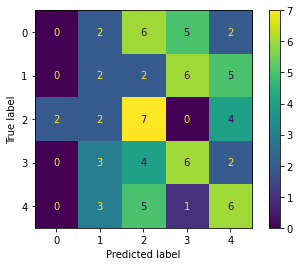

Confusion Matrix for SVM


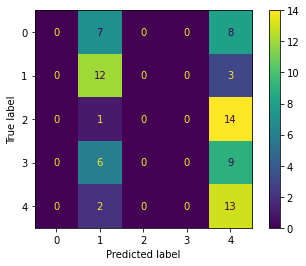

Confusion Matrix for Decision Tree


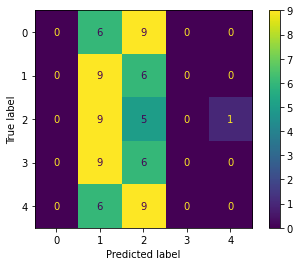

Confusion Matrix for Random Forest Classifier


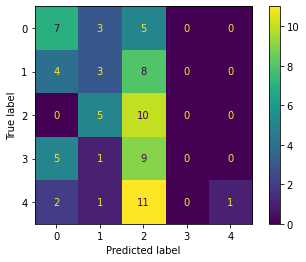

Confusion Matrix for Logistic Regression


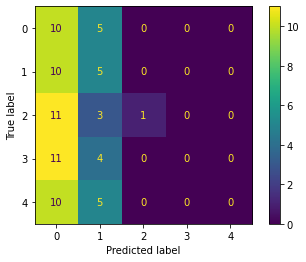

*********Basic Machine Learning Model Analysis for  French_noise_0dB_white_noise_mfcc+fourier *********
Models initialized


C:\Users\ridhi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Models Trained
Models Predicted
Accuracy Defined
Confusion Matrix for KNN


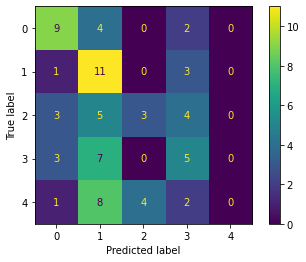

Confusion Matrix for Guassian Naive Bayes


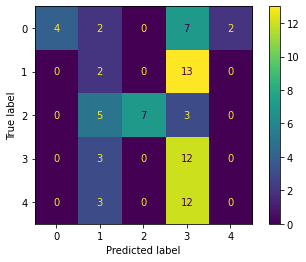

Confusion Matrix for SVM


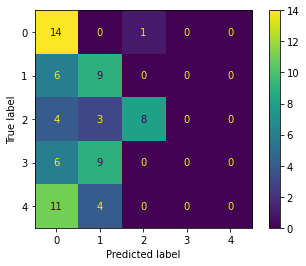

Confusion Matrix for Decision Tree


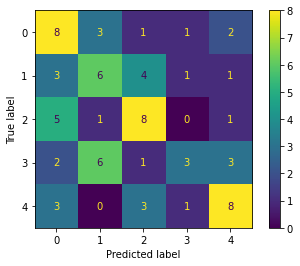

Confusion Matrix for Random Forest Classifier


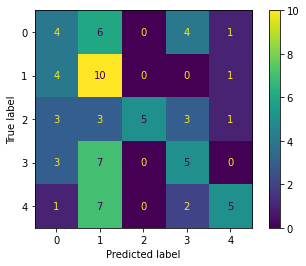

Confusion Matrix for Logistic Regression


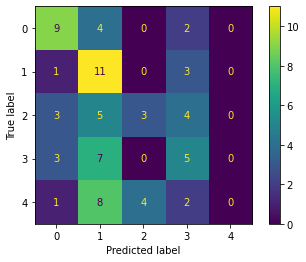

*********Basic Machine Learning Model Analysis for  French_noise_0dB_white_noise_mfcc+fourier+instant *********
Models initialized


C:\Users\ridhi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Models Trained
Models Predicted
Accuracy Defined
Confusion Matrix for KNN


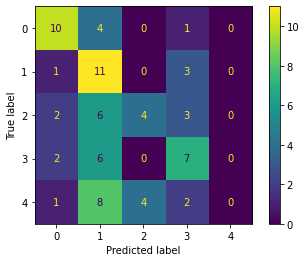

Confusion Matrix for Guassian Naive Bayes


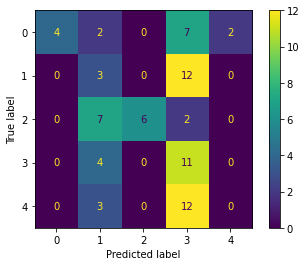

Confusion Matrix for SVM


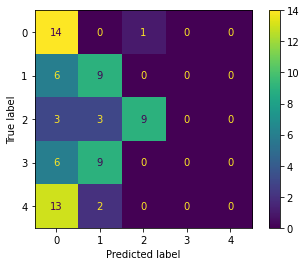

Confusion Matrix for Decision Tree


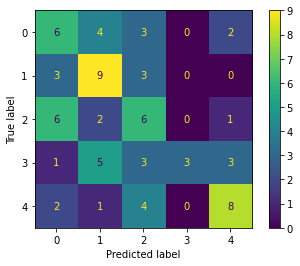

Confusion Matrix for Random Forest Classifier


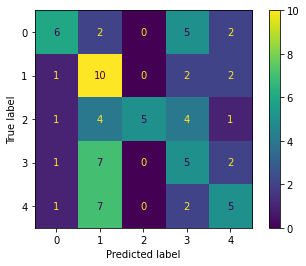

Confusion Matrix for Logistic Regression


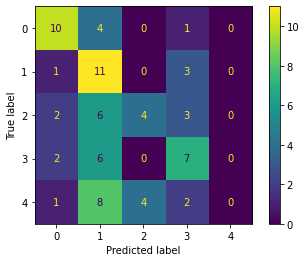

*********Basic Machine Learning Model Analysis for  French_noise_0dB_white_noise_mfcc+instant *********
Models initialized


C:\Users\ridhi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Models Trained
Models Predicted
Accuracy Defined
Confusion Matrix for KNN


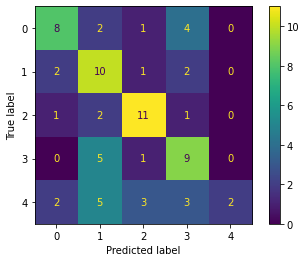

Confusion Matrix for Guassian Naive Bayes


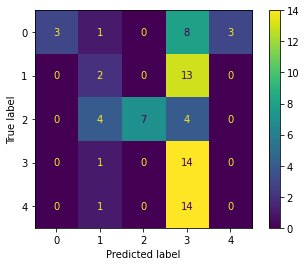

Confusion Matrix for SVM


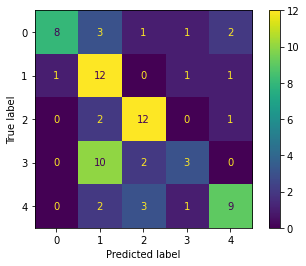

Confusion Matrix for Decision Tree


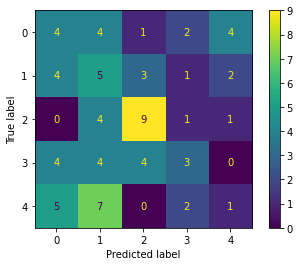

Confusion Matrix for Random Forest Classifier


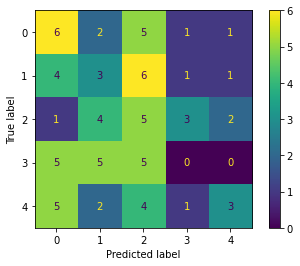

Confusion Matrix for Logistic Regression


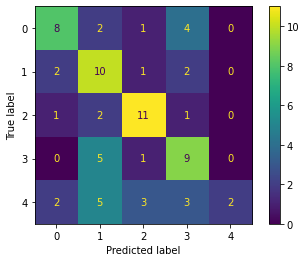

*********Basic Machine Learning Model Analysis for  French_noise_0dB_white_noise_spectrograms *********
Models initialized


C:\Users\ridhi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Models Trained
Models Predicted
Accuracy Defined
Confusion Matrix for KNN


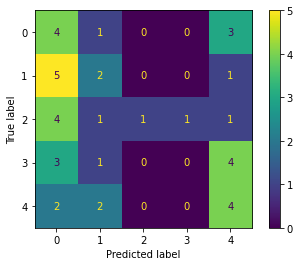

Confusion Matrix for Guassian Naive Bayes


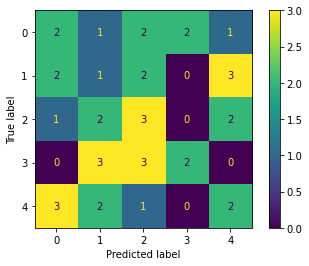

Confusion Matrix for SVM


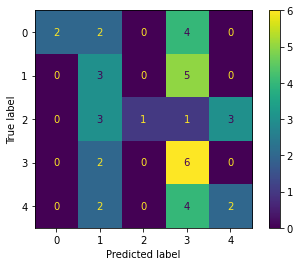

Confusion Matrix for Decision Tree


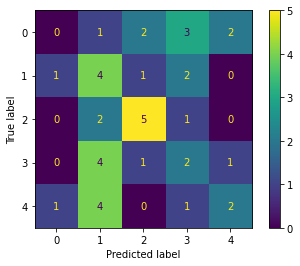

Confusion Matrix for Random Forest Classifier


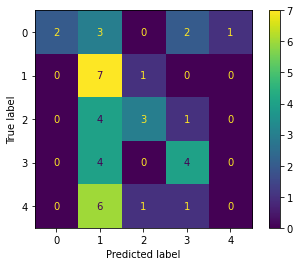

Confusion Matrix for Logistic Regression


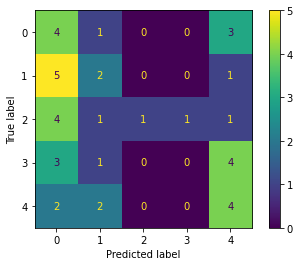

*********Basic Machine Learning Model Analysis for  French_noise_10dB_babble_fourier+instant *********
Models initialized


C:\Users\ridhi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Models Trained
Models Predicted
Accuracy Defined
Confusion Matrix for KNN


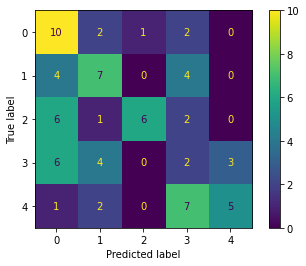

Confusion Matrix for Guassian Naive Bayes


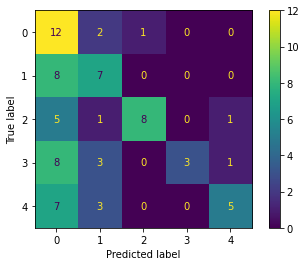

Confusion Matrix for SVM


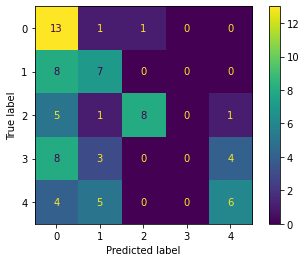

Confusion Matrix for Decision Tree


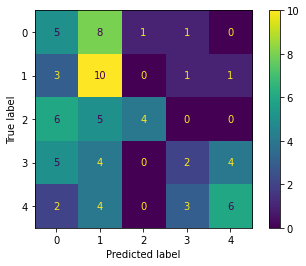

Confusion Matrix for Random Forest Classifier


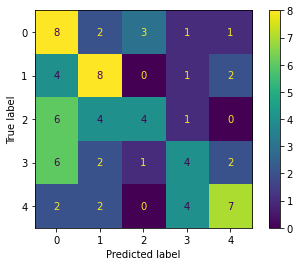

Confusion Matrix for Logistic Regression


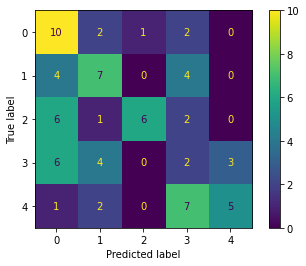

*********Basic Machine Learning Model Analysis for  French_noise_10dB_babble_hilbert *********
Models initialized


C:\Users\ridhi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Models Trained
Models Predicted
Accuracy Defined
Confusion Matrix for KNN


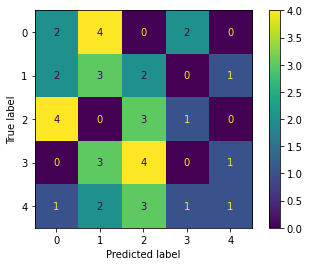

Confusion Matrix for Guassian Naive Bayes


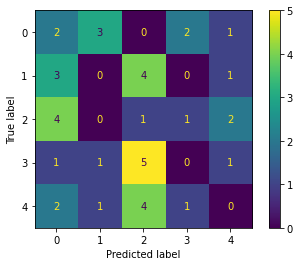

Confusion Matrix for SVM


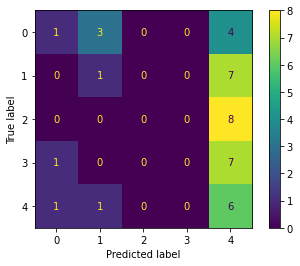

Confusion Matrix for Decision Tree


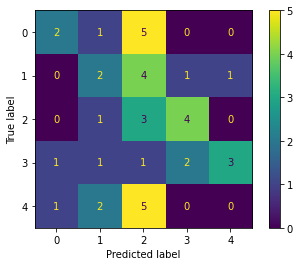

Confusion Matrix for Random Forest Classifier


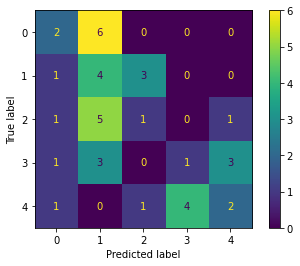

Confusion Matrix for Logistic Regression


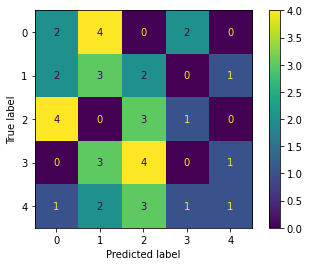

*********Basic Machine Learning Model Analysis for  French_noise_10dB_babble_mfcc *********
Models initialized


C:\Users\ridhi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Models Trained
Models Predicted
Accuracy Defined
Confusion Matrix for KNN


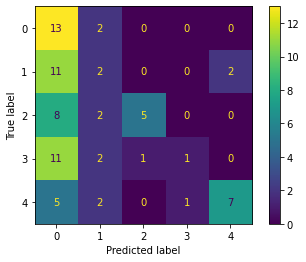

Confusion Matrix for Guassian Naive Bayes


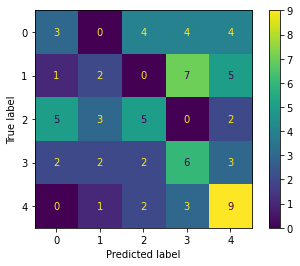

Confusion Matrix for SVM


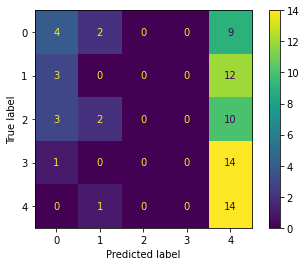

Confusion Matrix for Decision Tree


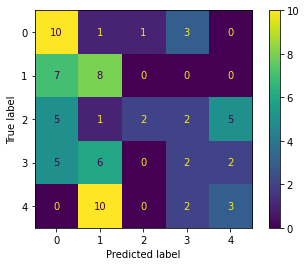

Confusion Matrix for Random Forest Classifier


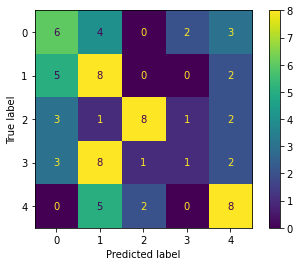

Confusion Matrix for Logistic Regression


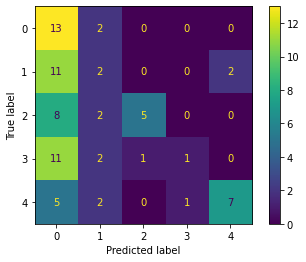

*********Basic Machine Learning Model Analysis for  French_noise_10dB_babble_mfcc+fourier *********
Models initialized


C:\Users\ridhi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Models Trained
Models Predicted
Accuracy Defined
Confusion Matrix for KNN


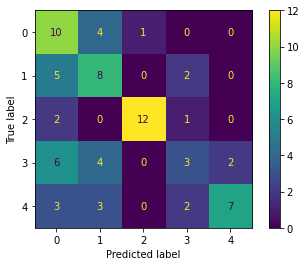

Confusion Matrix for Guassian Naive Bayes


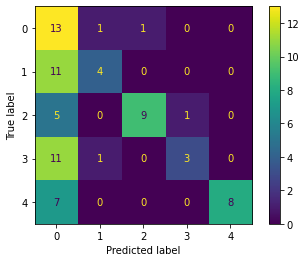

Confusion Matrix for SVM


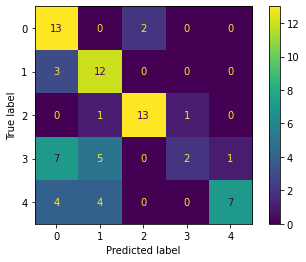

Confusion Matrix for Decision Tree


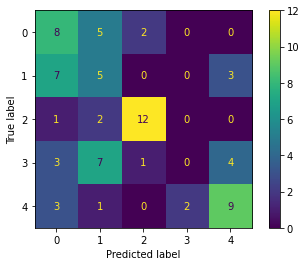

Confusion Matrix for Random Forest Classifier


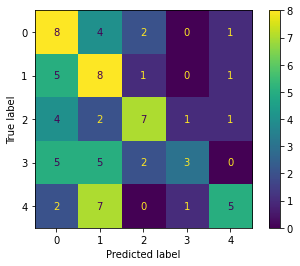

Confusion Matrix for Logistic Regression


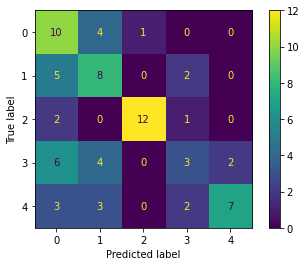

*********Basic Machine Learning Model Analysis for  French_noise_10dB_babble_mfcc+fourier+instant *********
Models initialized


C:\Users\ridhi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Models Trained
Models Predicted
Accuracy Defined
Confusion Matrix for KNN


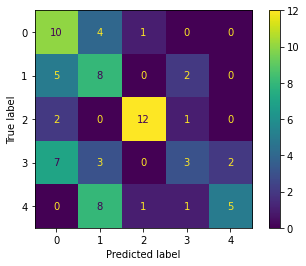

Confusion Matrix for Guassian Naive Bayes


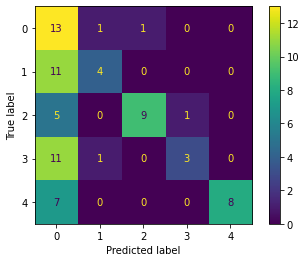

Confusion Matrix for SVM


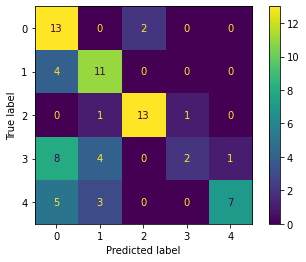

Confusion Matrix for Decision Tree


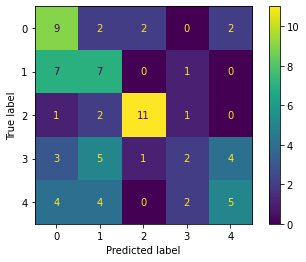

Confusion Matrix for Random Forest Classifier


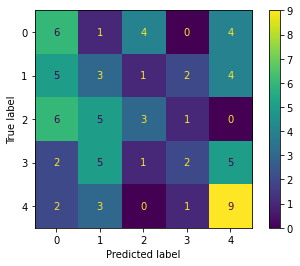

Confusion Matrix for Logistic Regression


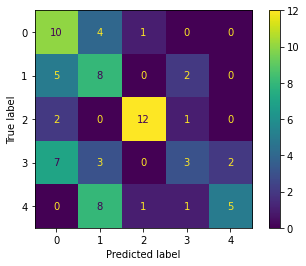

*********Basic Machine Learning Model Analysis for  French_noise_10dB_babble_mfcc+instant *********
Models initialized


C:\Users\ridhi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Models Trained
Models Predicted
Accuracy Defined
Confusion Matrix for KNN


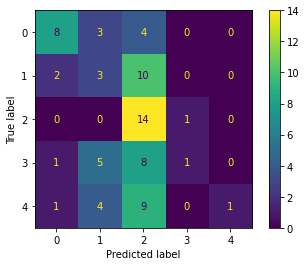

Confusion Matrix for Guassian Naive Bayes


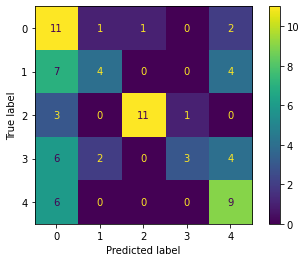

Confusion Matrix for SVM


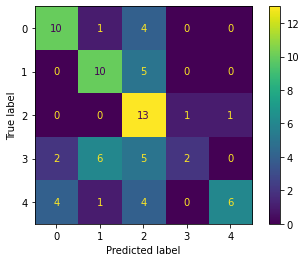

Confusion Matrix for Decision Tree


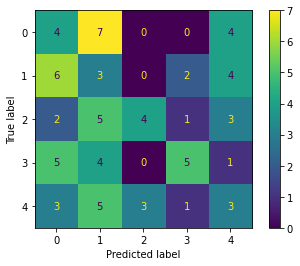

Confusion Matrix for Random Forest Classifier


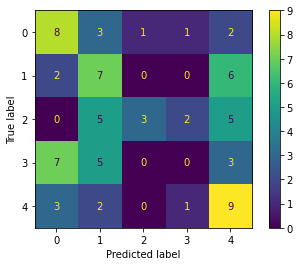

Confusion Matrix for Logistic Regression


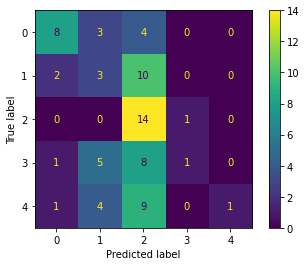

*********Basic Machine Learning Model Analysis for  French_noise_10dB_babble_spectrograms *********
Models initialized


C:\Users\ridhi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Models Trained
Models Predicted
Accuracy Defined
Confusion Matrix for KNN


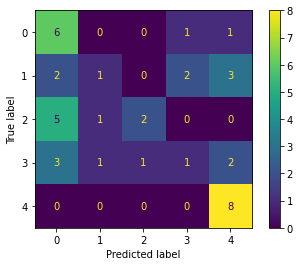

Confusion Matrix for Guassian Naive Bayes


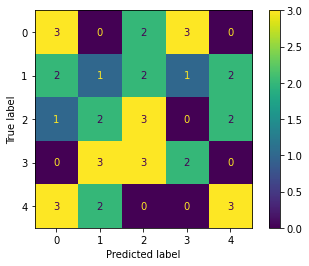

Confusion Matrix for SVM


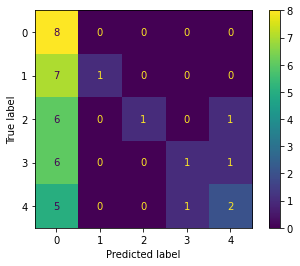

Confusion Matrix for Decision Tree


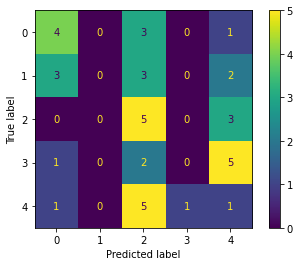

Confusion Matrix for Random Forest Classifier


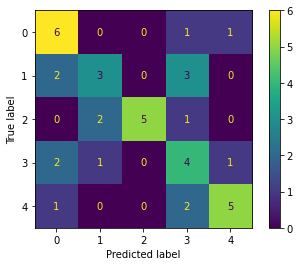

Confusion Matrix for Logistic Regression


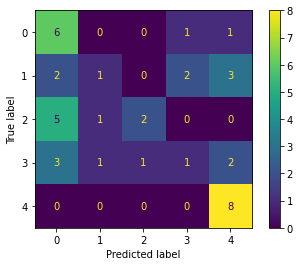

*********Basic Machine Learning Model Analysis for  French_noise_10dB_hf_channel_fourier+instant *********
Models initialized


C:\Users\ridhi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Models Trained
Models Predicted
Accuracy Defined
Confusion Matrix for KNN


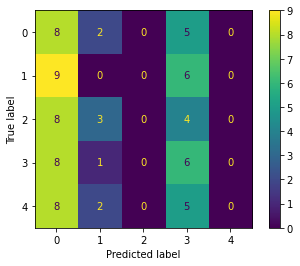

Confusion Matrix for Guassian Naive Bayes


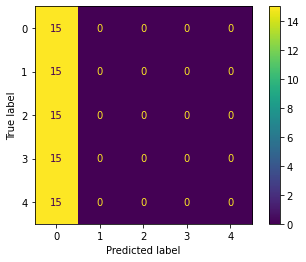

Confusion Matrix for SVM


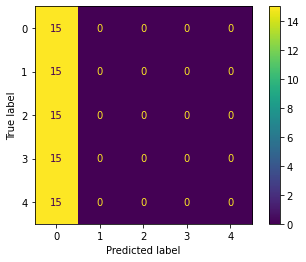

Confusion Matrix for Decision Tree


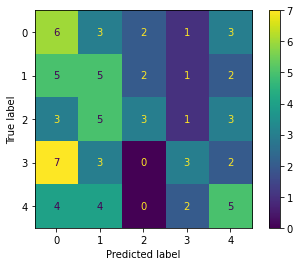

Confusion Matrix for Random Forest Classifier


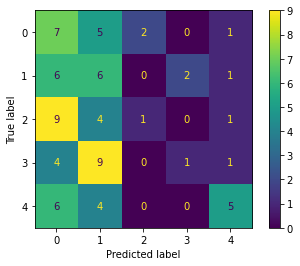

Confusion Matrix for Logistic Regression


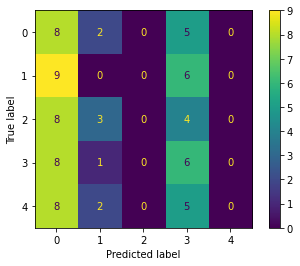

*********Basic Machine Learning Model Analysis for  French_noise_10dB_hf_channel_hilbert *********
Models initialized


C:\Users\ridhi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Models Trained
Models Predicted
Accuracy Defined
Confusion Matrix for KNN


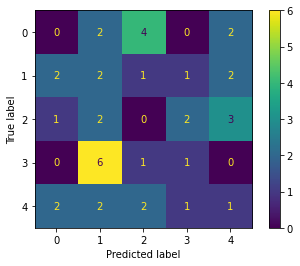

Confusion Matrix for Guassian Naive Bayes


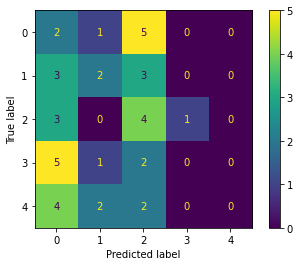

Confusion Matrix for SVM


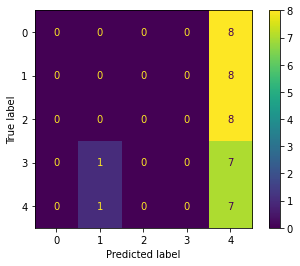

Confusion Matrix for Decision Tree


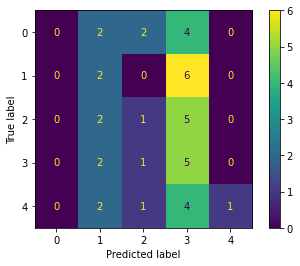

Confusion Matrix for Random Forest Classifier


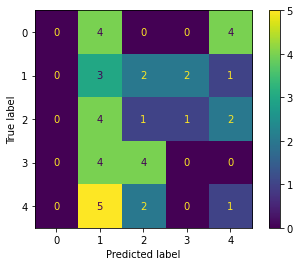

Confusion Matrix for Logistic Regression


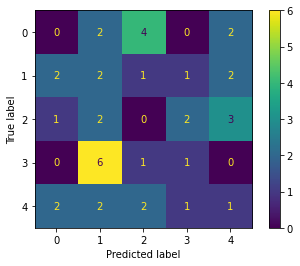

*********Basic Machine Learning Model Analysis for  French_noise_10dB_hf_channel_mfcc *********
Models initialized


C:\Users\ridhi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Models Trained
Models Predicted
Accuracy Defined
Confusion Matrix for KNN


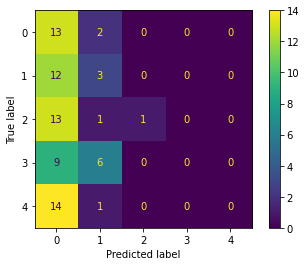

Confusion Matrix for Guassian Naive Bayes


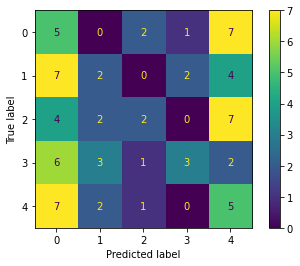

Confusion Matrix for SVM


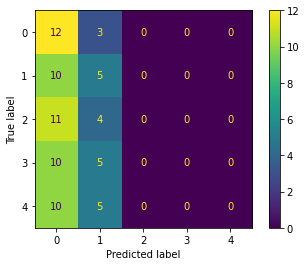

Confusion Matrix for Decision Tree


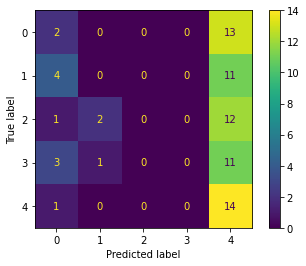

Confusion Matrix for Random Forest Classifier


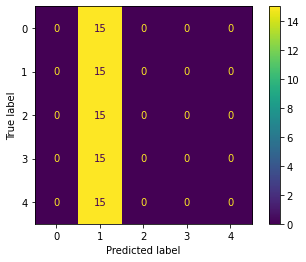

Confusion Matrix for Logistic Regression


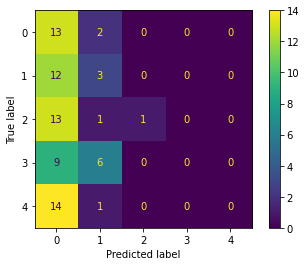

*********Basic Machine Learning Model Analysis for  French_noise_10dB_hf_channel_mfcc+fourier *********
Models initialized


C:\Users\ridhi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Models Trained
Models Predicted
Accuracy Defined
Confusion Matrix for KNN


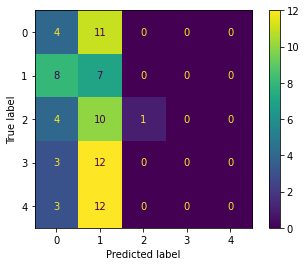

Confusion Matrix for Guassian Naive Bayes


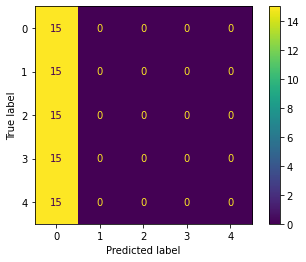

Confusion Matrix for SVM


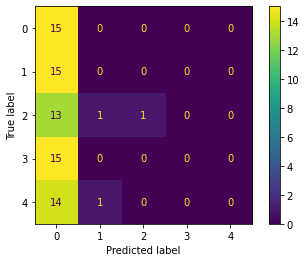

Confusion Matrix for Decision Tree


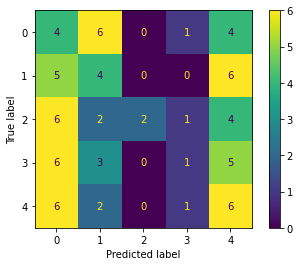

Confusion Matrix for Random Forest Classifier


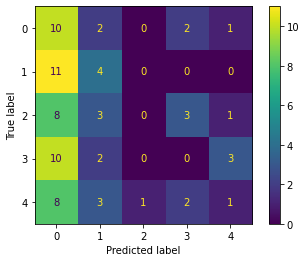

Confusion Matrix for Logistic Regression


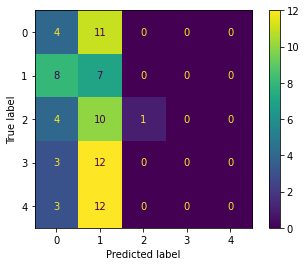

*********Basic Machine Learning Model Analysis for  French_noise_10dB_hf_channel_mfcc+fourier+instant *********
Models initialized


C:\Users\ridhi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Models Trained
Models Predicted
Accuracy Defined
Confusion Matrix for KNN


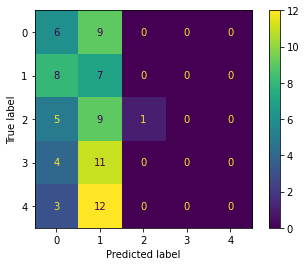

Confusion Matrix for Guassian Naive Bayes


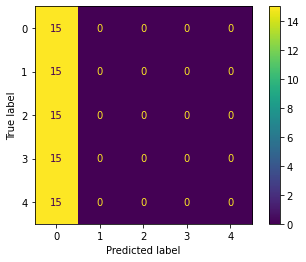

Confusion Matrix for SVM


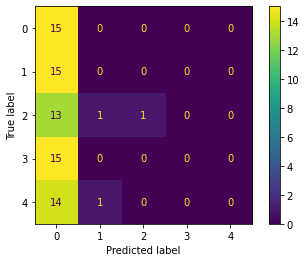

Confusion Matrix for Decision Tree


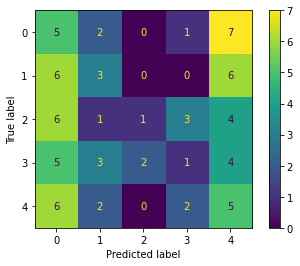

Confusion Matrix for Random Forest Classifier


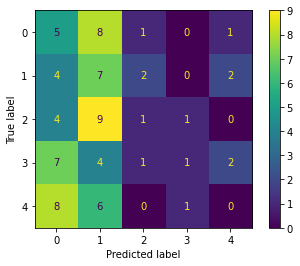

Confusion Matrix for Logistic Regression


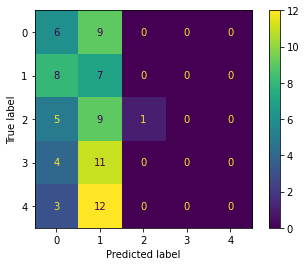

*********Basic Machine Learning Model Analysis for  French_noise_10dB_hf_channel_mfcc+instant *********
Models initialized


C:\Users\ridhi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Models Trained
Models Predicted
Accuracy Defined
Confusion Matrix for KNN


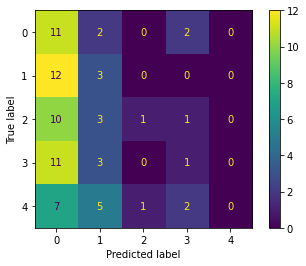

Confusion Matrix for Guassian Naive Bayes


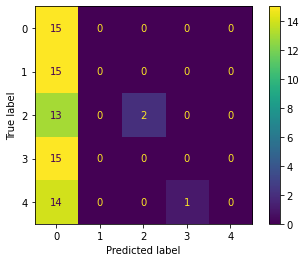

Confusion Matrix for SVM


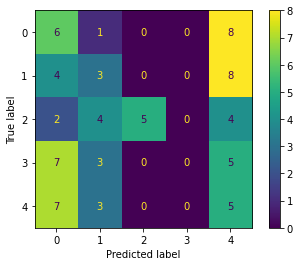

Confusion Matrix for Decision Tree


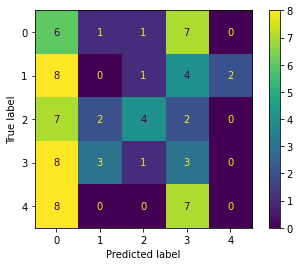

Confusion Matrix for Random Forest Classifier


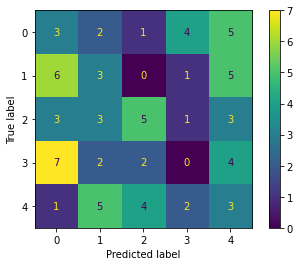

Confusion Matrix for Logistic Regression


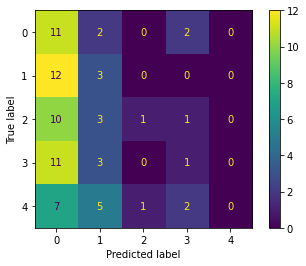

*********Basic Machine Learning Model Analysis for  French_noise_10dB_hf_channel_spectrograms *********
Models initialized


C:\Users\ridhi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Models Trained
Models Predicted
Accuracy Defined
Confusion Matrix for KNN


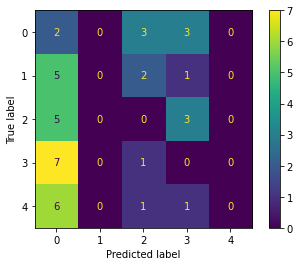

Confusion Matrix for Guassian Naive Bayes


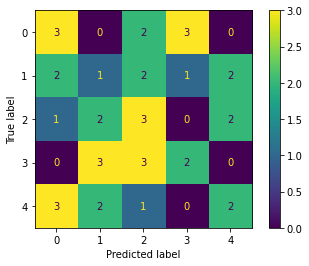

Confusion Matrix for SVM


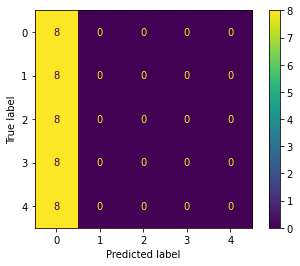

Confusion Matrix for Decision Tree


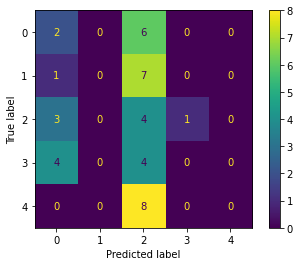

Confusion Matrix for Random Forest Classifier


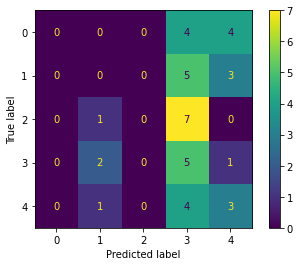

Confusion Matrix for Logistic Regression


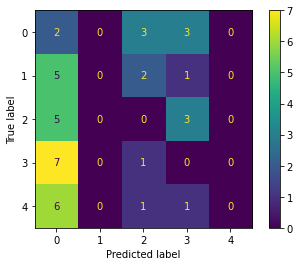

*********Basic Machine Learning Model Analysis for  French_noise_10dB_white_noise_fourier+instant *********
Models initialized


C:\Users\ridhi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Models Trained
Models Predicted
Accuracy Defined
Confusion Matrix for KNN


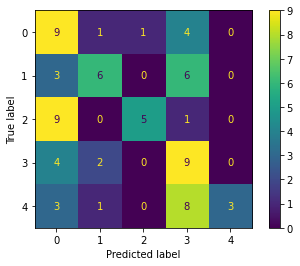

Confusion Matrix for Guassian Naive Bayes


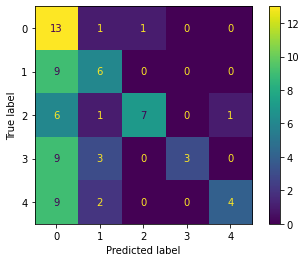

Confusion Matrix for SVM


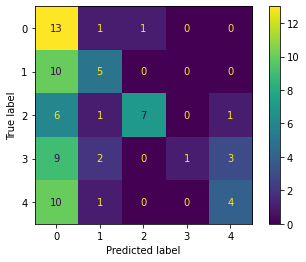

Confusion Matrix for Decision Tree


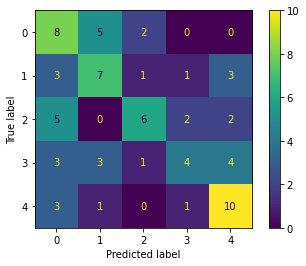

Confusion Matrix for Random Forest Classifier


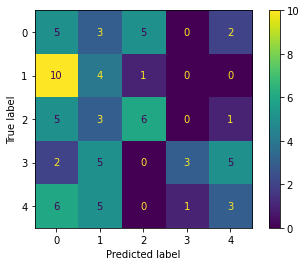

Confusion Matrix for Logistic Regression


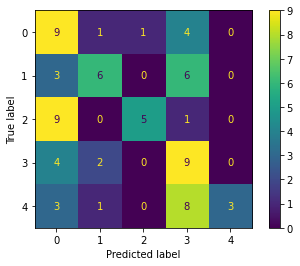

*********Basic Machine Learning Model Analysis for  French_noise_10dB_white_noise_hilbert *********
Models initialized


C:\Users\ridhi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Models Trained
Models Predicted
Accuracy Defined
Confusion Matrix for KNN


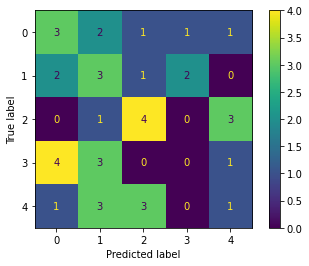

Confusion Matrix for Guassian Naive Bayes


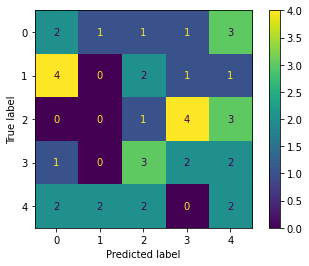

Confusion Matrix for SVM


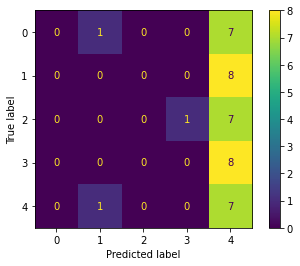

Confusion Matrix for Decision Tree


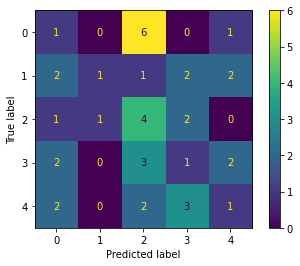

Confusion Matrix for Random Forest Classifier


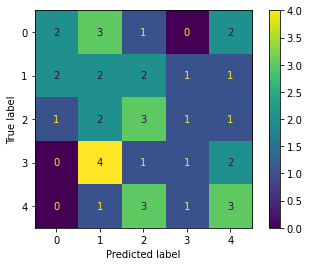

Confusion Matrix for Logistic Regression


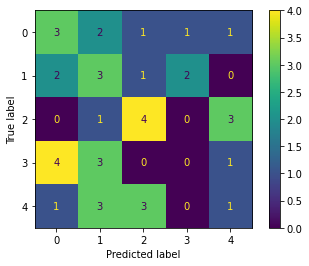

*********Basic Machine Learning Model Analysis for  French_noise_10dB_white_noise_mfcc *********
Models initialized


C:\Users\ridhi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Models Trained
Models Predicted
Accuracy Defined
Confusion Matrix for KNN


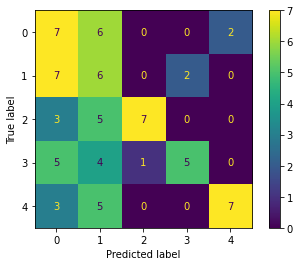

Confusion Matrix for Guassian Naive Bayes


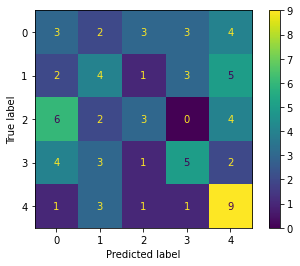

Confusion Matrix for SVM


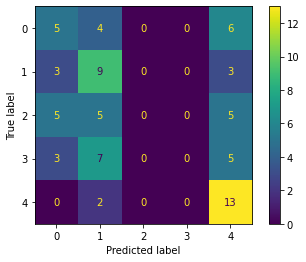

Confusion Matrix for Decision Tree


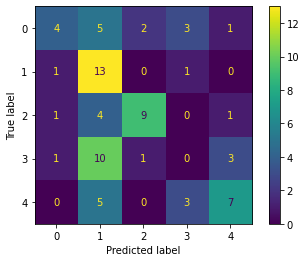

Confusion Matrix for Random Forest Classifier


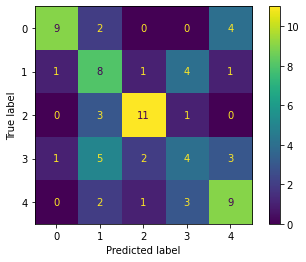

Confusion Matrix for Logistic Regression


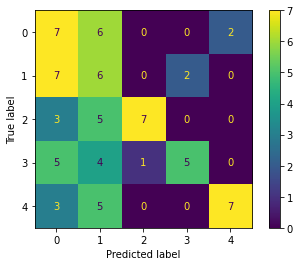

*********Basic Machine Learning Model Analysis for  French_noise_10dB_white_noise_mfcc+fourier *********
Models initialized


C:\Users\ridhi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Models Trained
Models Predicted
Accuracy Defined
Confusion Matrix for KNN


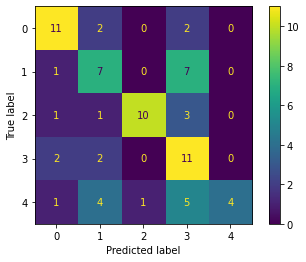

Confusion Matrix for Guassian Naive Bayes


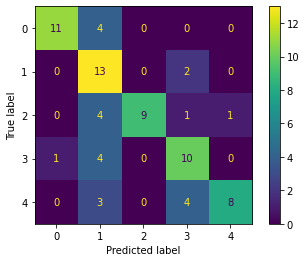

Confusion Matrix for SVM


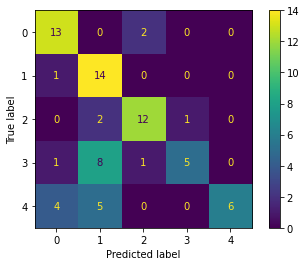

Confusion Matrix for Decision Tree


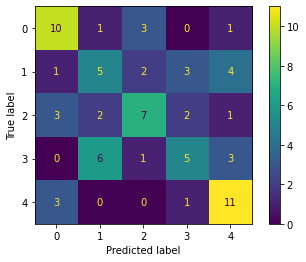

Confusion Matrix for Random Forest Classifier


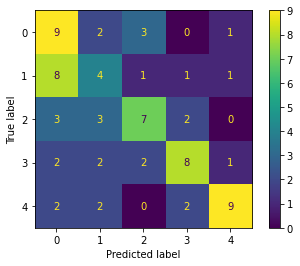

Confusion Matrix for Logistic Regression


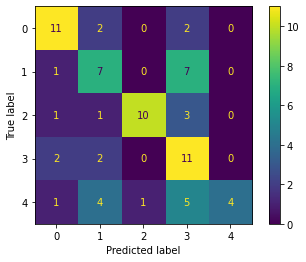

*********Basic Machine Learning Model Analysis for  French_noise_10dB_white_noise_mfcc+fourier+instant *********
Models initialized


C:\Users\ridhi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Models Trained
Models Predicted
Accuracy Defined
Confusion Matrix for KNN


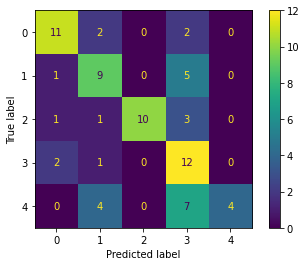

Confusion Matrix for Guassian Naive Bayes


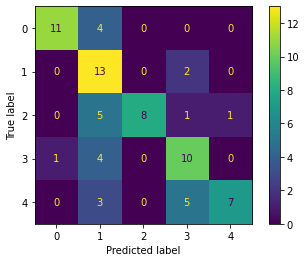

Confusion Matrix for SVM


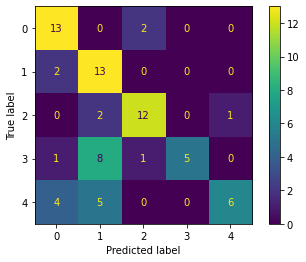

Confusion Matrix for Decision Tree


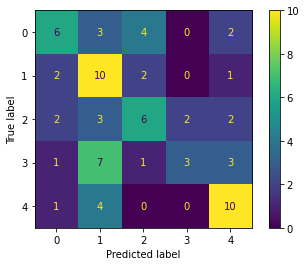

Confusion Matrix for Random Forest Classifier


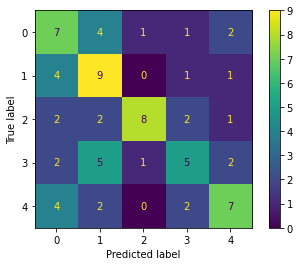

Confusion Matrix for Logistic Regression


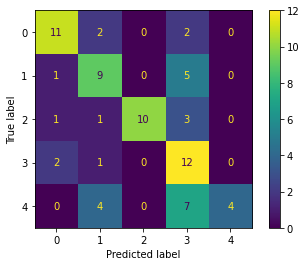

*********Basic Machine Learning Model Analysis for  French_noise_10dB_white_noise_mfcc+instant *********
Models initialized


C:\Users\ridhi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Models Trained
Models Predicted
Accuracy Defined
Confusion Matrix for KNN


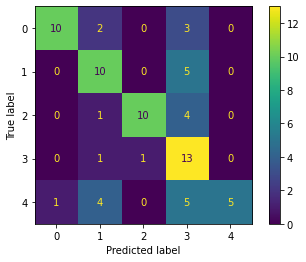

Confusion Matrix for Guassian Naive Bayes


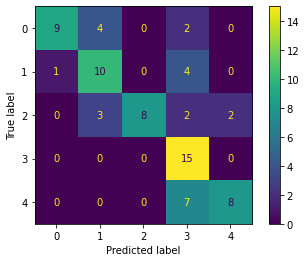

Confusion Matrix for SVM


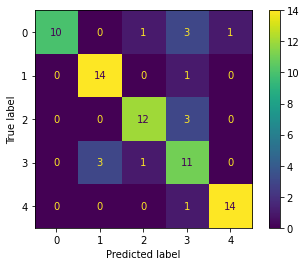

Confusion Matrix for Decision Tree


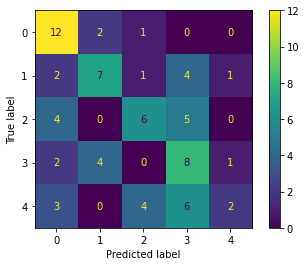

Confusion Matrix for Random Forest Classifier


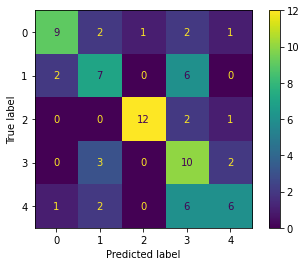

Confusion Matrix for Logistic Regression


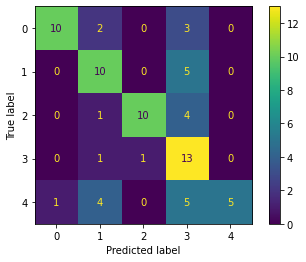

*********Basic Machine Learning Model Analysis for  French_noise_10dB_white_noise_spectrograms *********
Models initialized


C:\Users\ridhi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Models Trained
Models Predicted
Accuracy Defined
Confusion Matrix for KNN


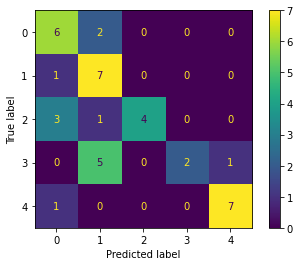

Confusion Matrix for Guassian Naive Bayes


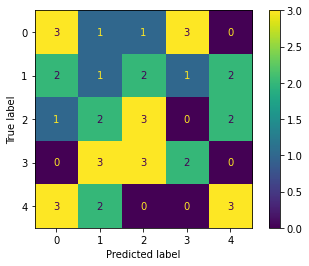

Confusion Matrix for SVM


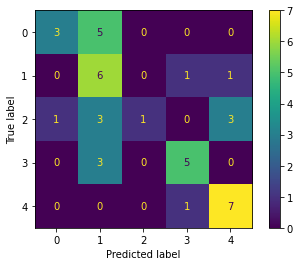

Confusion Matrix for Decision Tree


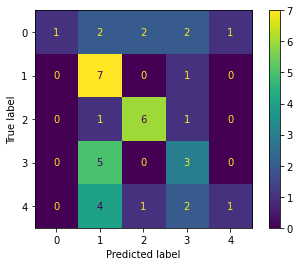

Confusion Matrix for Random Forest Classifier


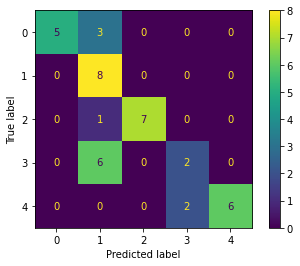

Confusion Matrix for Logistic Regression


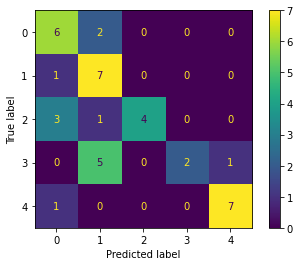

*********Basic Machine Learning Model Analysis for  French_noise_5dB_babble_fourier+instant *********
Models initialized


C:\Users\ridhi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Models Trained
Models Predicted
Accuracy Defined
Confusion Matrix for KNN


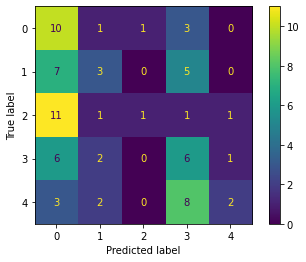

Confusion Matrix for Guassian Naive Bayes


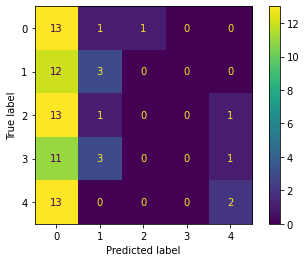

Confusion Matrix for SVM


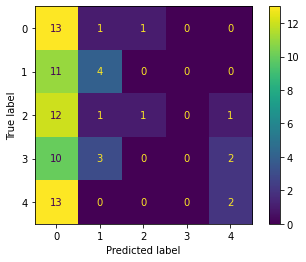

Confusion Matrix for Decision Tree


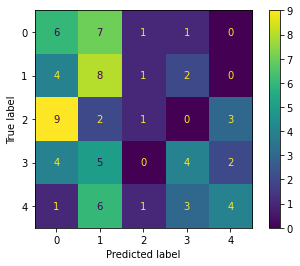

Confusion Matrix for Random Forest Classifier


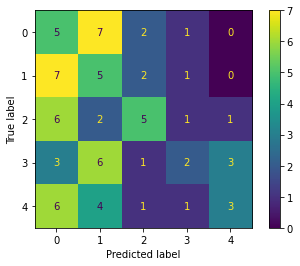

Confusion Matrix for Logistic Regression


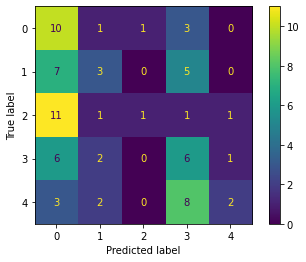

*********Basic Machine Learning Model Analysis for  French_noise_5dB_babble_hilbert *********
Models initialized


C:\Users\ridhi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Models Trained
Models Predicted
Accuracy Defined
Confusion Matrix for KNN


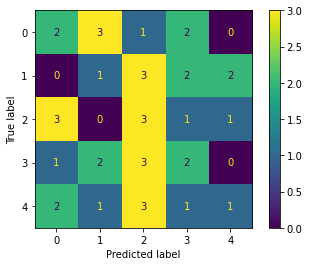

Confusion Matrix for Guassian Naive Bayes


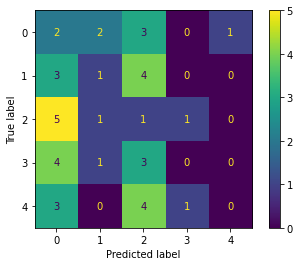

Confusion Matrix for SVM


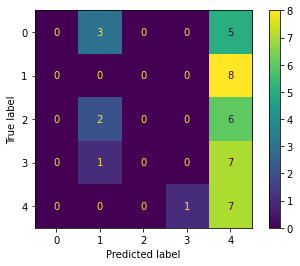

Confusion Matrix for Decision Tree


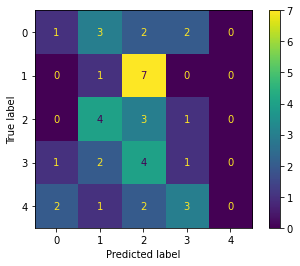

Confusion Matrix for Random Forest Classifier


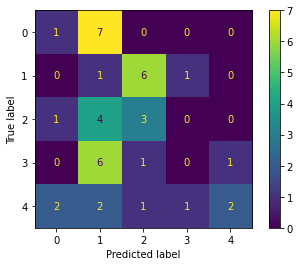

Confusion Matrix for Logistic Regression


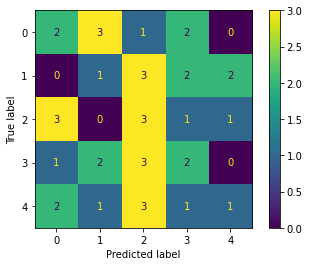

*********Basic Machine Learning Model Analysis for  French_noise_5dB_babble_mfcc *********
Models initialized


C:\Users\ridhi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Models Trained
Models Predicted
Accuracy Defined
Confusion Matrix for KNN


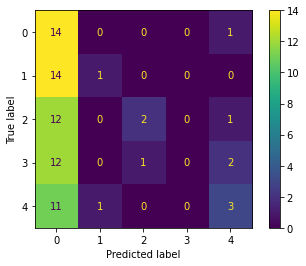

Confusion Matrix for Guassian Naive Bayes


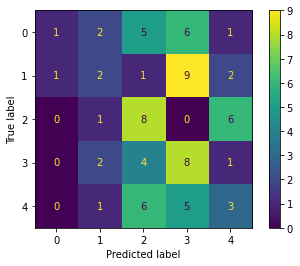

Confusion Matrix for SVM


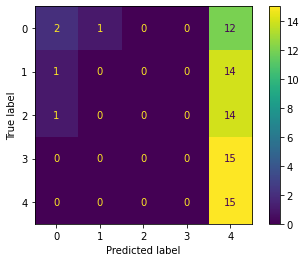

Confusion Matrix for Decision Tree


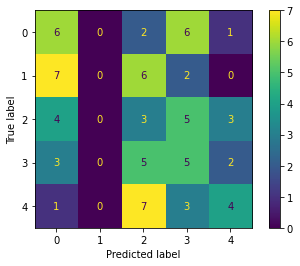

Confusion Matrix for Random Forest Classifier


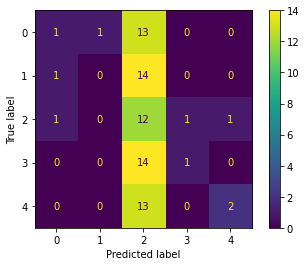

Confusion Matrix for Logistic Regression


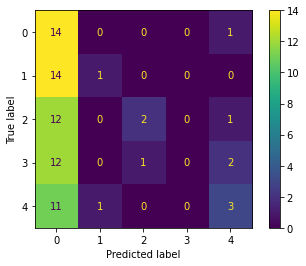

*********Basic Machine Learning Model Analysis for  French_noise_5dB_babble_mfcc+fourier *********
Models initialized


C:\Users\ridhi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Models Trained
Models Predicted
Accuracy Defined
Confusion Matrix for KNN


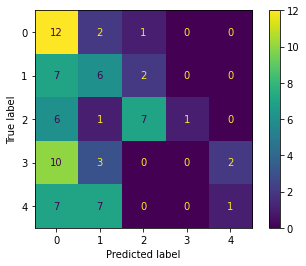

Confusion Matrix for Guassian Naive Bayes


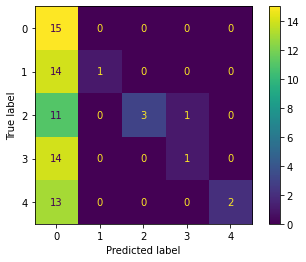

Confusion Matrix for SVM


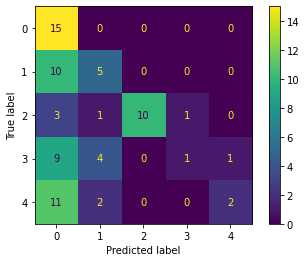

Confusion Matrix for Decision Tree


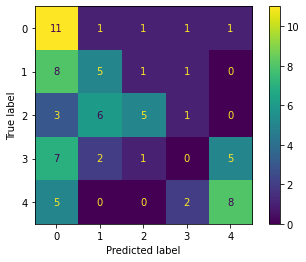

Confusion Matrix for Random Forest Classifier


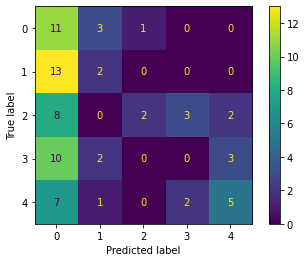

Confusion Matrix for Logistic Regression


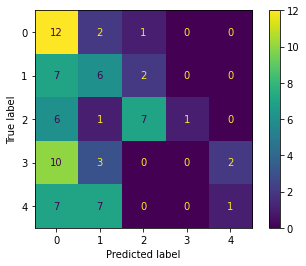

*********Basic Machine Learning Model Analysis for  French_noise_5dB_babble_mfcc+fourier+instant *********
Models initialized


C:\Users\ridhi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Models Trained
Models Predicted
Accuracy Defined
Confusion Matrix for KNN


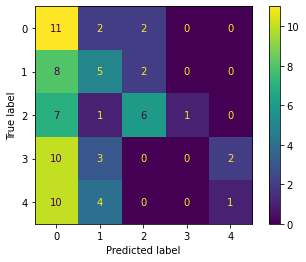

Confusion Matrix for Guassian Naive Bayes


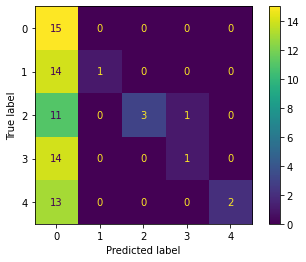

Confusion Matrix for SVM


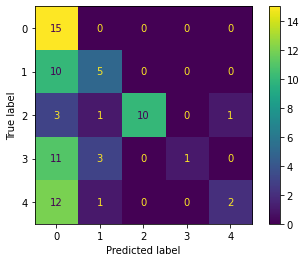

Confusion Matrix for Decision Tree


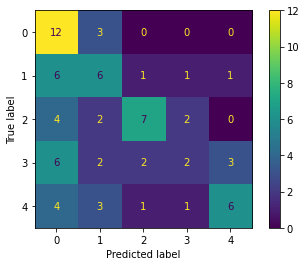

Confusion Matrix for Random Forest Classifier


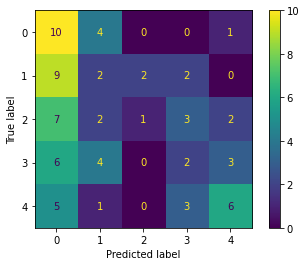

Confusion Matrix for Logistic Regression


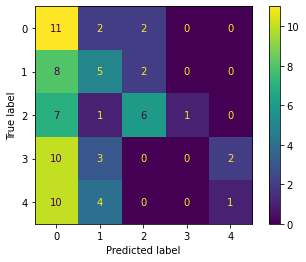

*********Basic Machine Learning Model Analysis for  French_noise_5dB_babble_mfcc+instant *********
Models initialized


C:\Users\ridhi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Models Trained
Models Predicted
Accuracy Defined
Confusion Matrix for KNN


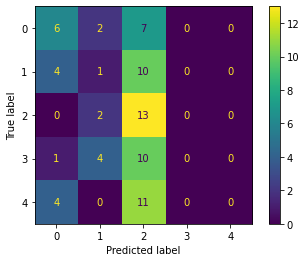

Confusion Matrix for Guassian Naive Bayes


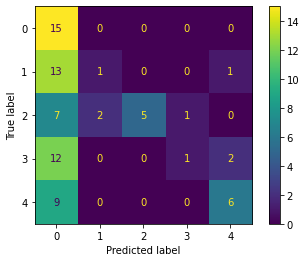

Confusion Matrix for SVM


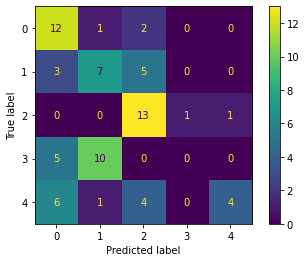

Confusion Matrix for Decision Tree


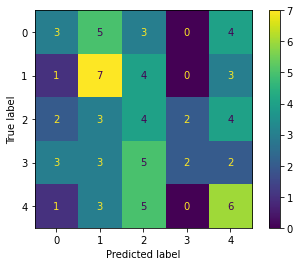

Confusion Matrix for Random Forest Classifier


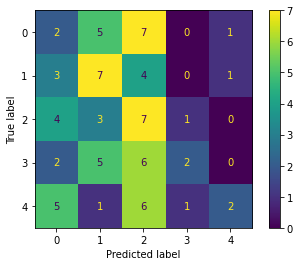

Confusion Matrix for Logistic Regression


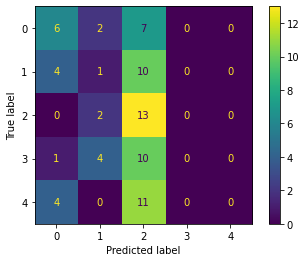

*********Basic Machine Learning Model Analysis for  French_noise_5dB_babble_spectrograms *********
Models initialized


C:\Users\ridhi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Models Trained
Models Predicted
Accuracy Defined
Confusion Matrix for KNN


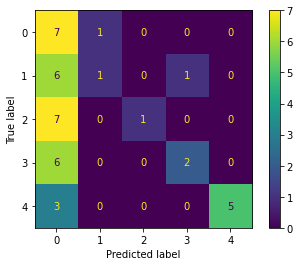

Confusion Matrix for Guassian Naive Bayes


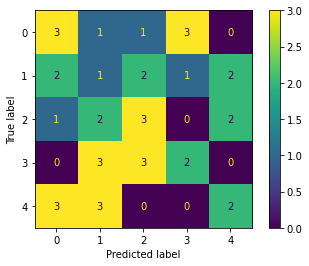

Confusion Matrix for SVM


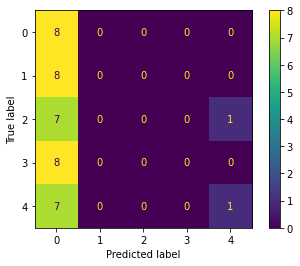

Confusion Matrix for Decision Tree


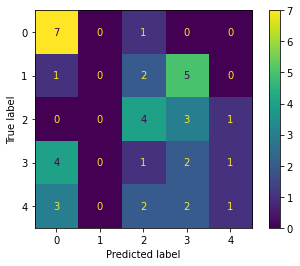

Confusion Matrix for Random Forest Classifier


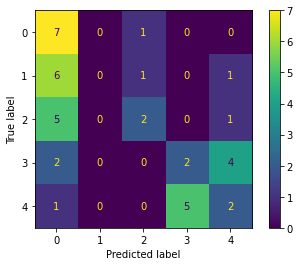

Confusion Matrix for Logistic Regression


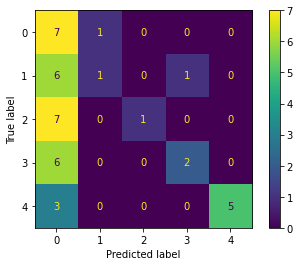

*********Basic Machine Learning Model Analysis for  French_noise_5dB_hf_channel_fourier+instant *********
Models initialized


C:\Users\ridhi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Models Trained
Models Predicted
Accuracy Defined
Confusion Matrix for KNN


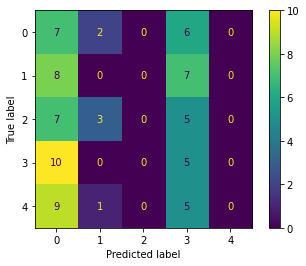

Confusion Matrix for Guassian Naive Bayes


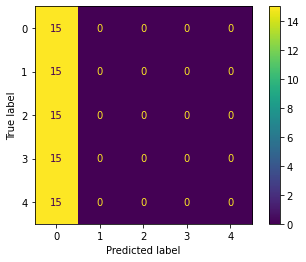

Confusion Matrix for SVM


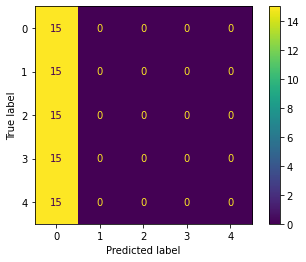

Confusion Matrix for Decision Tree


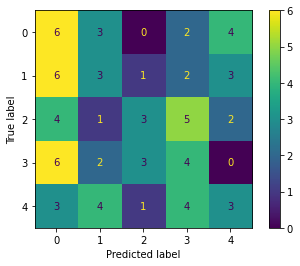

Confusion Matrix for Random Forest Classifier


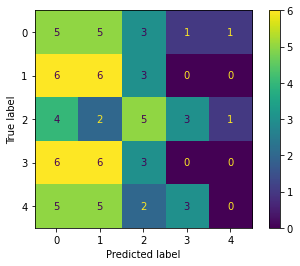

Confusion Matrix for Logistic Regression


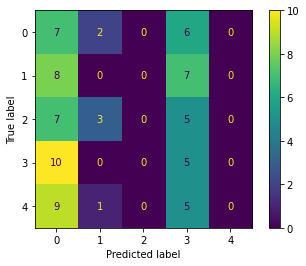

*********Basic Machine Learning Model Analysis for  French_noise_5dB_hf_channel_hilbert *********
Models initialized


C:\Users\ridhi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Models Trained
Models Predicted
Accuracy Defined
Confusion Matrix for KNN


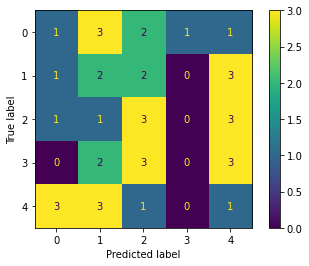

Confusion Matrix for Guassian Naive Bayes


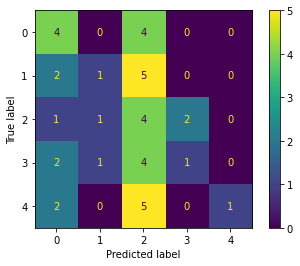

Confusion Matrix for SVM


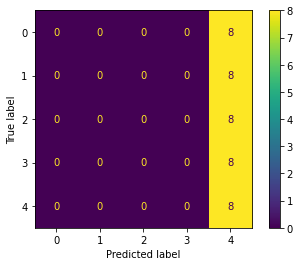

Confusion Matrix for Decision Tree


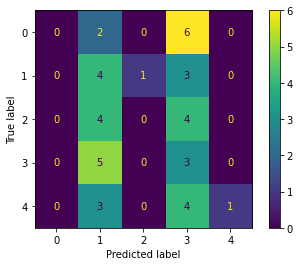

Confusion Matrix for Random Forest Classifier


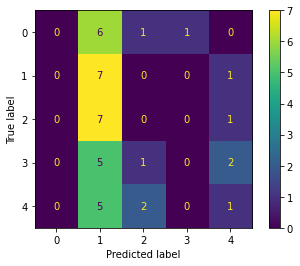

Confusion Matrix for Logistic Regression


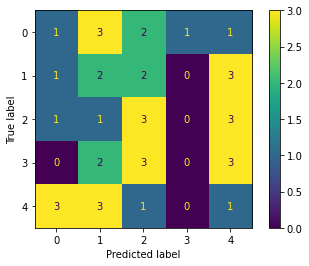

*********Basic Machine Learning Model Analysis for  French_noise_5dB_hf_channel_mfcc *********
Models initialized


C:\Users\ridhi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Models Trained
Models Predicted
Accuracy Defined
Confusion Matrix for KNN


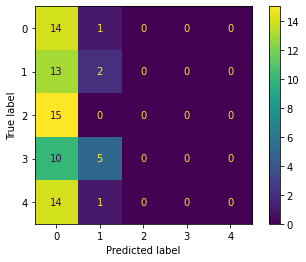

Confusion Matrix for Guassian Naive Bayes


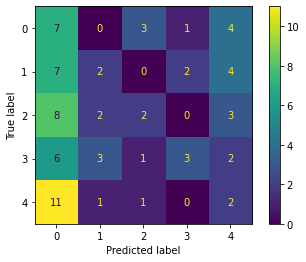

Confusion Matrix for SVM


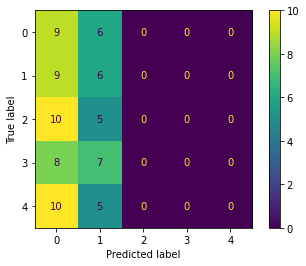

Confusion Matrix for Decision Tree


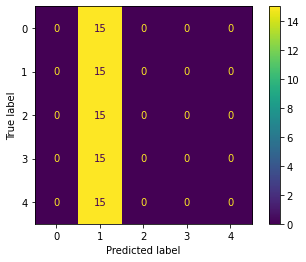

Confusion Matrix for Random Forest Classifier


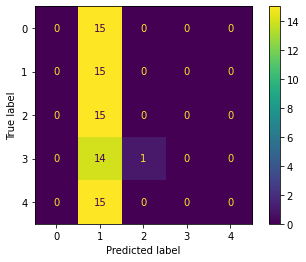

Confusion Matrix for Logistic Regression


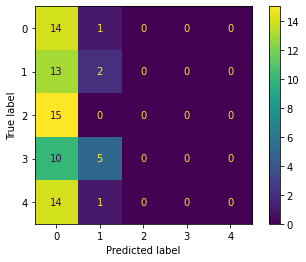

*********Basic Machine Learning Model Analysis for  French_noise_5dB_hf_channel_mfcc+fourier *********
Models initialized


C:\Users\ridhi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Models Trained
Models Predicted
Accuracy Defined
Confusion Matrix for KNN


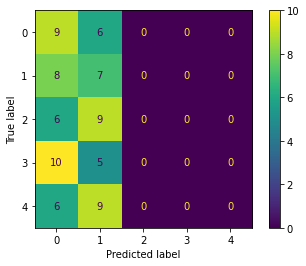

Confusion Matrix for Guassian Naive Bayes


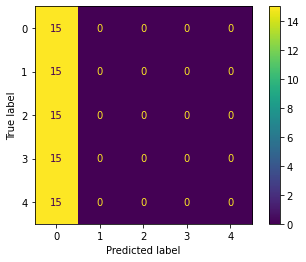

Confusion Matrix for SVM


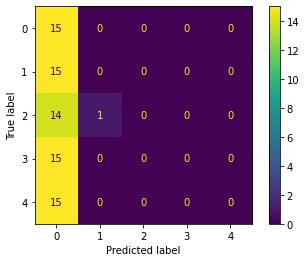

Confusion Matrix for Decision Tree


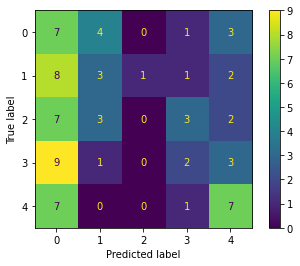

Confusion Matrix for Random Forest Classifier


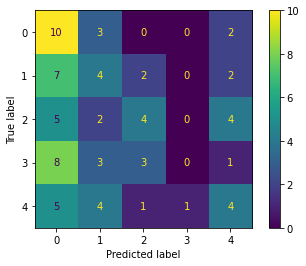

Confusion Matrix for Logistic Regression


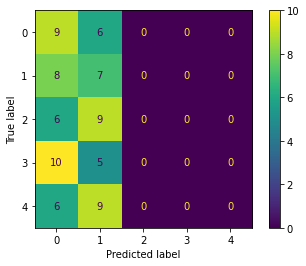

*********Basic Machine Learning Model Analysis for  French_noise_5dB_hf_channel_mfcc+fourier+instant *********
Models initialized


C:\Users\ridhi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Models Trained
Models Predicted
Accuracy Defined
Confusion Matrix for KNN


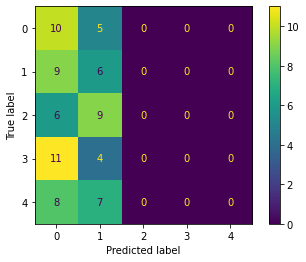

Confusion Matrix for Guassian Naive Bayes


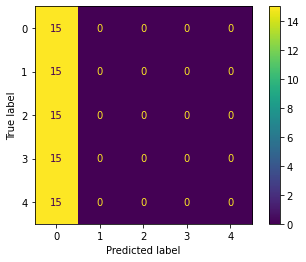

Confusion Matrix for SVM


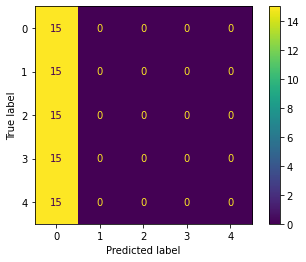

Confusion Matrix for Decision Tree


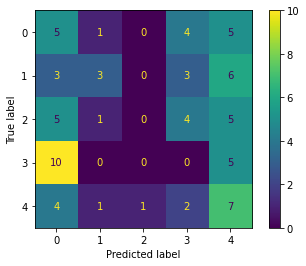

Confusion Matrix for Random Forest Classifier


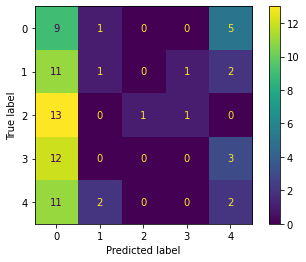

Confusion Matrix for Logistic Regression


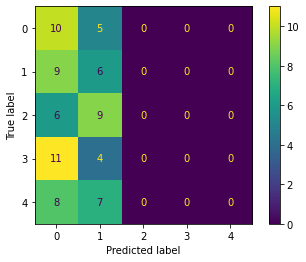

*********Basic Machine Learning Model Analysis for  French_noise_5dB_hf_channel_mfcc+instant *********
Models initialized


C:\Users\ridhi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Models Trained
Models Predicted
Accuracy Defined
Confusion Matrix for KNN


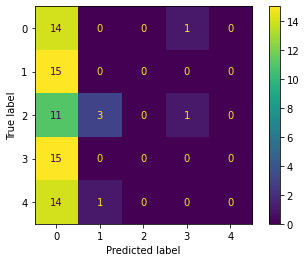

Confusion Matrix for Guassian Naive Bayes


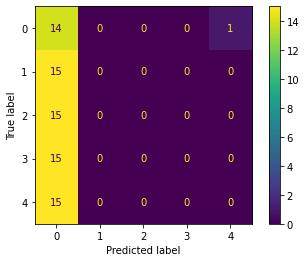

Confusion Matrix for SVM


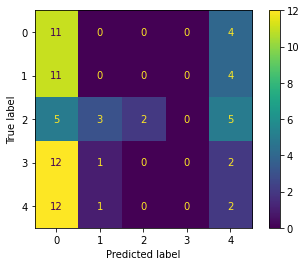

Confusion Matrix for Decision Tree


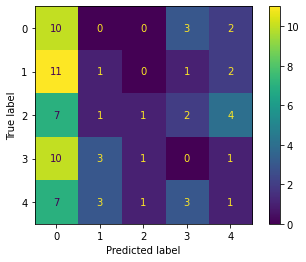

Confusion Matrix for Random Forest Classifier


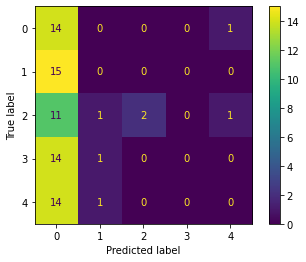

Confusion Matrix for Logistic Regression


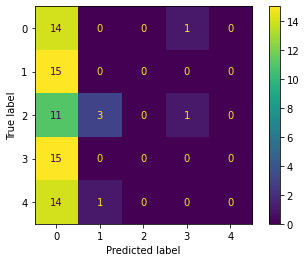

*********Basic Machine Learning Model Analysis for  French_noise_5dB_hf_channel_spectrograms *********
Models initialized


C:\Users\ridhi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Models Trained
Models Predicted
Accuracy Defined
Confusion Matrix for KNN


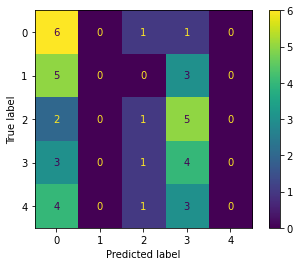

Confusion Matrix for Guassian Naive Bayes


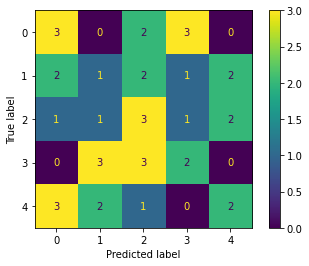

Confusion Matrix for SVM


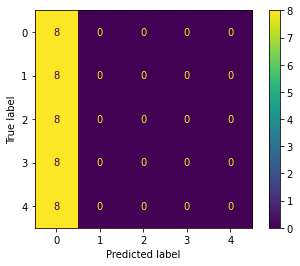

Confusion Matrix for Decision Tree


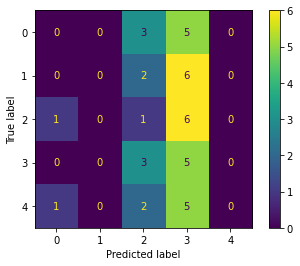

Confusion Matrix for Random Forest Classifier


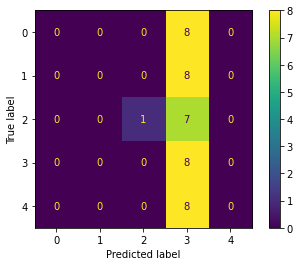

Confusion Matrix for Logistic Regression


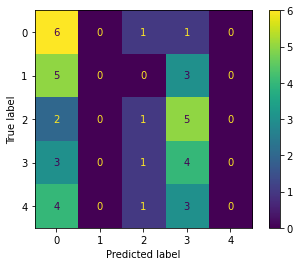

*********Basic Machine Learning Model Analysis for  French_noise_5dB_white_noise_fourier+instant *********
Models initialized


C:\Users\ridhi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Models Trained
Models Predicted
Accuracy Defined
Confusion Matrix for KNN


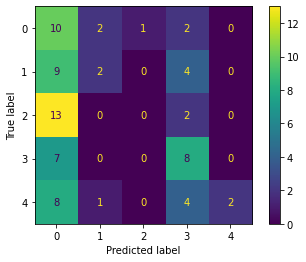

Confusion Matrix for Guassian Naive Bayes


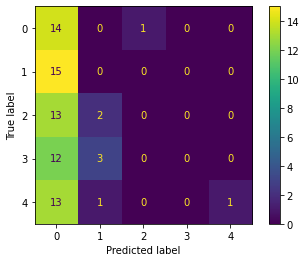

Confusion Matrix for SVM


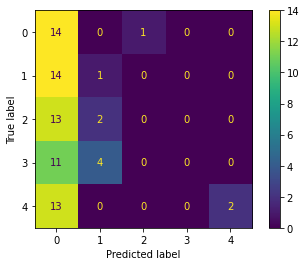

Confusion Matrix for Decision Tree


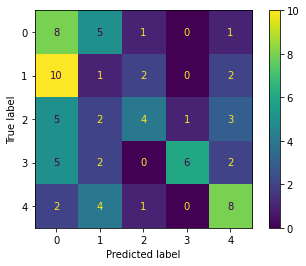

Confusion Matrix for Random Forest Classifier


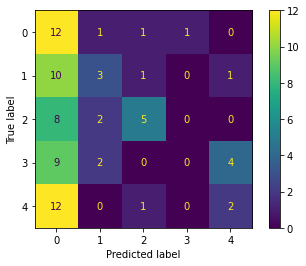

Confusion Matrix for Logistic Regression


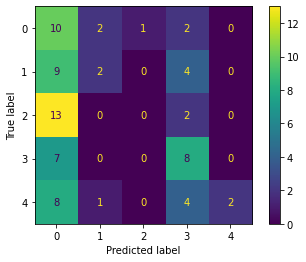

*********Basic Machine Learning Model Analysis for  French_noise_5dB_white_noise_hilbert *********
Models initialized


C:\Users\ridhi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Models Trained
Models Predicted
Accuracy Defined
Confusion Matrix for KNN


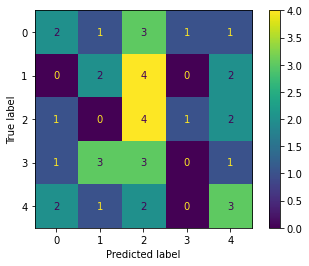

Confusion Matrix for Guassian Naive Bayes


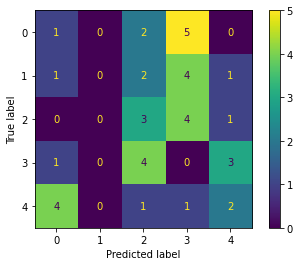

Confusion Matrix for SVM


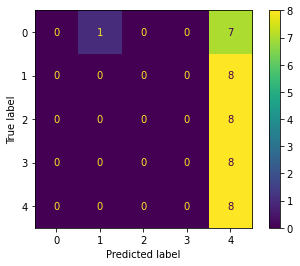

Confusion Matrix for Decision Tree


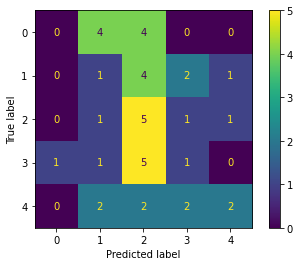

Confusion Matrix for Random Forest Classifier


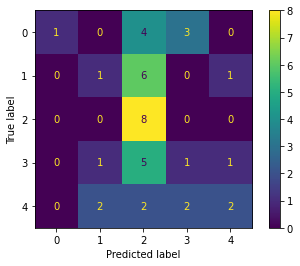

Confusion Matrix for Logistic Regression


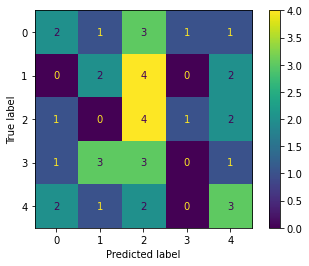

*********Basic Machine Learning Model Analysis for  French_noise_5dB_white_noise_mfcc *********
Models initialized


C:\Users\ridhi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Models Trained
Models Predicted
Accuracy Defined
Confusion Matrix for KNN


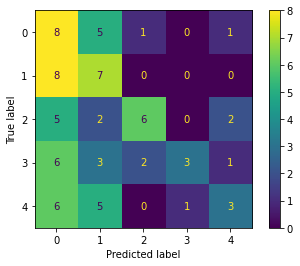

Confusion Matrix for Guassian Naive Bayes


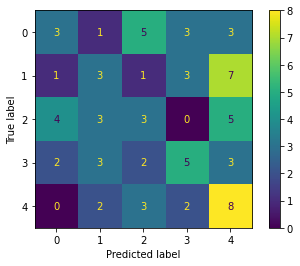

Confusion Matrix for SVM


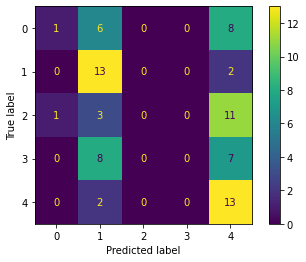

Confusion Matrix for Decision Tree


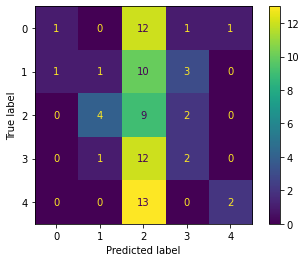

Confusion Matrix for Random Forest Classifier


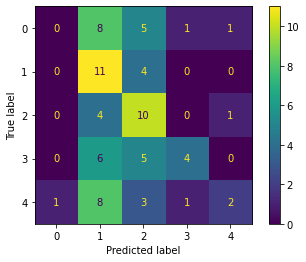

Confusion Matrix for Logistic Regression


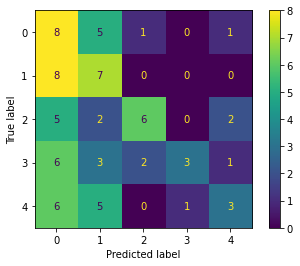

*********Basic Machine Learning Model Analysis for  French_noise_5dB_white_noise_mfcc+fourier *********
Models initialized


C:\Users\ridhi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Models Trained
Models Predicted
Accuracy Defined
Confusion Matrix for KNN


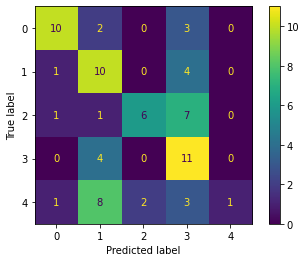

Confusion Matrix for Guassian Naive Bayes


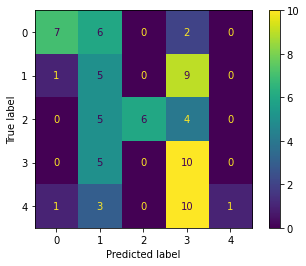

Confusion Matrix for SVM


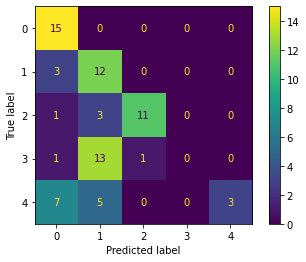

Confusion Matrix for Decision Tree


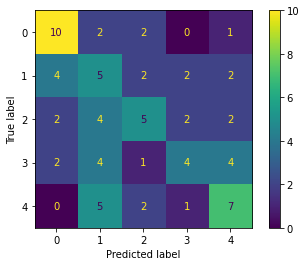

Confusion Matrix for Random Forest Classifier


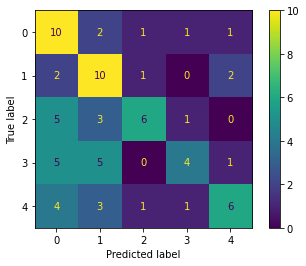

Confusion Matrix for Logistic Regression


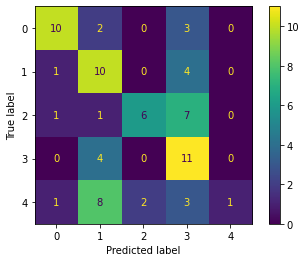

*********Basic Machine Learning Model Analysis for  French_noise_5dB_white_noise_mfcc+fourier+instant *********
Models initialized


C:\Users\ridhi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Models Trained
Models Predicted
Accuracy Defined
Confusion Matrix for KNN


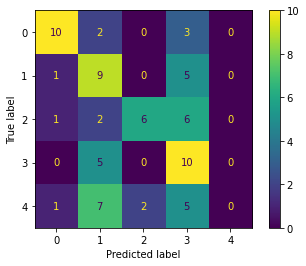

Confusion Matrix for Guassian Naive Bayes


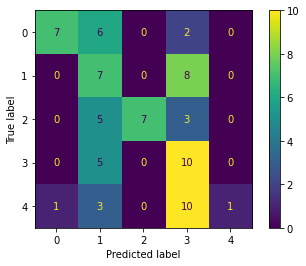

Confusion Matrix for SVM


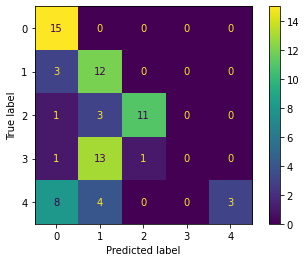

Confusion Matrix for Decision Tree


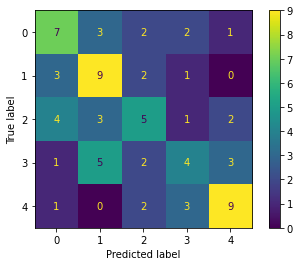

Confusion Matrix for Random Forest Classifier


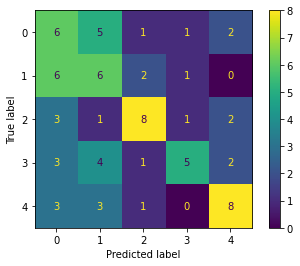

Confusion Matrix for Logistic Regression


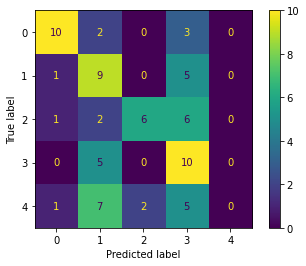

*********Basic Machine Learning Model Analysis for  French_noise_5dB_white_noise_mfcc+instant *********
Models initialized


C:\Users\ridhi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Models Trained
Models Predicted
Accuracy Defined
Confusion Matrix for KNN


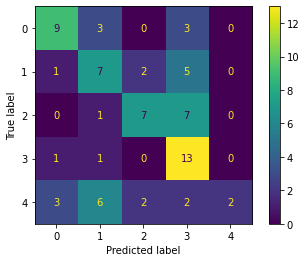

Confusion Matrix for Guassian Naive Bayes


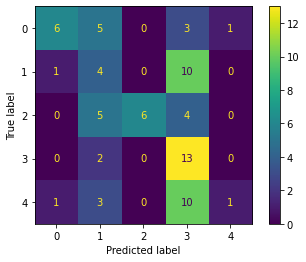

Confusion Matrix for SVM


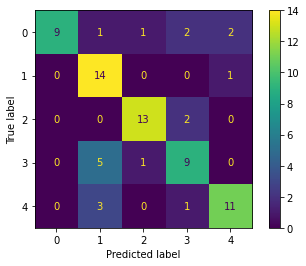

Confusion Matrix for Decision Tree


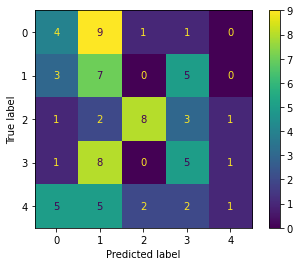

Confusion Matrix for Random Forest Classifier


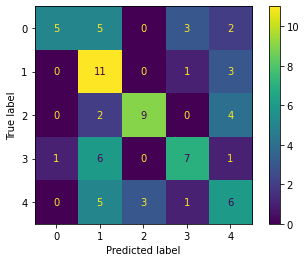

Confusion Matrix for Logistic Regression


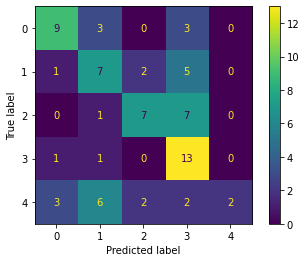

*********Basic Machine Learning Model Analysis for  French_noise_5dB_white_noise_spectrograms *********
Models initialized


C:\Users\ridhi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Models Trained
Models Predicted
Accuracy Defined
Confusion Matrix for KNN


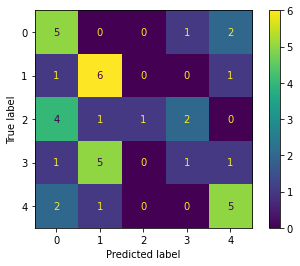

Confusion Matrix for Guassian Naive Bayes


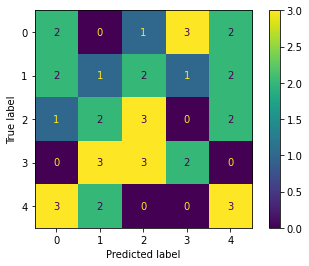

Confusion Matrix for SVM


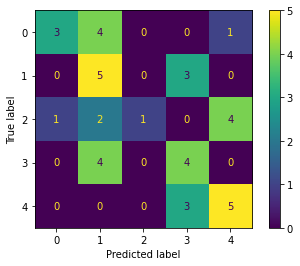

Confusion Matrix for Decision Tree


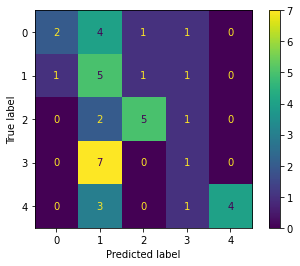

Confusion Matrix for Random Forest Classifier


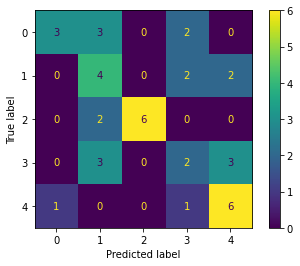

Confusion Matrix for Logistic Regression


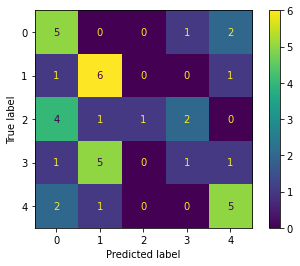

*********Basic Machine Learning Model Analysis for  French_spectrograms *********
Models initialized


C:\Users\ridhi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Models Trained
Models Predicted
Accuracy Defined
Confusion Matrix for KNN


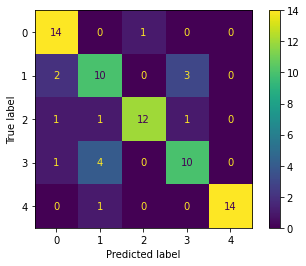

Confusion Matrix for Guassian Naive Bayes


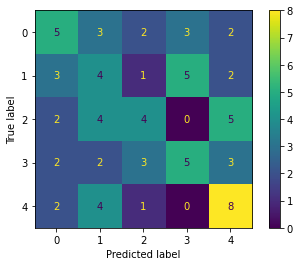

Confusion Matrix for SVM


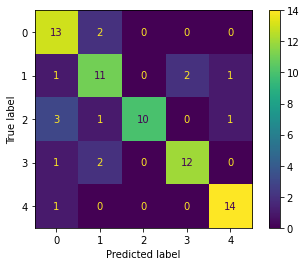

Confusion Matrix for Decision Tree


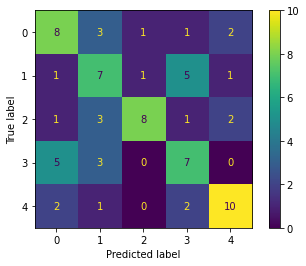

Confusion Matrix for Random Forest Classifier


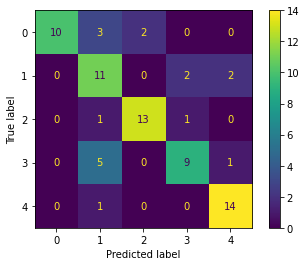

Confusion Matrix for Logistic Regression


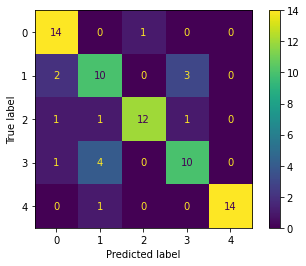

In [8]:
accuracy_basic_model=pd.DataFrame()
mse_basic_model=pd.DataFrame()
mae_basic_model=pd.DataFrame()
#iterating through folders in the given folder
for name in foldernames:
    #checks for checkpoints
    if name != "Speech_Data\.ipynb_checkpoints":
        path = Path(name)
        #itterate through files in each folder
        for file in path.iterdir():
            if str(file).endswith('TrainingData.npz'):
                train_data=load(file)
                x_train=train_data["arr_0"]
            elif str(file).endswith('TestingData.npz'):
                test_data=load(file)
                x_test=test_data["arr_0"]
            elif str(file).endswith('TrainingLabel.txt'):
                y_train = convert_txt_List(file)
            elif str(file).endswith('TestingLabel.txt'):
                y_test = convert_txt_List(file)
                
        accuracy, mse, mae = model_analysis(name,x_train,x_test,y_train,y_test)
        
        #creating accuarcy data frame
        df_acc= pd.DataFrame([accuracy])
        accuracy_basic_model= pd.concat([accuracy_basic_model, df_acc], ignore_index=True)
        
        #creating mse data frame
        df_mse= pd.DataFrame([mse])
        mse_basic_model= pd.concat([mse_basic_model, df_mse], ignore_index=True)
        
        #creating mae data frame
        df_mae= pd.DataFrame([mae])
        mae_basic_model= pd.concat([mae_basic_model, df_mae], ignore_index=True)

The derived dataframe for each metric was not in format that can be filter for correct analysis, hence below function modifies the dataframe for each analysis

In [9]:
def framing_df(df):
    for index in range(len(df)):
        if len(df["Data"][index].split("\\")[1].split("_")[1:])==1:
            
            df.loc[index,"Feature"]=df.loc[index,"Data"].split("\\")[1].split("_")[1]
            df.loc[index,"SNR"]="Clean"
            df.loc[index,"Noise Type"]="NA"
            
        elif len(df["Data"][index].split("\\")[1].split("_")[1:])==4:
            
            df.loc[index,"Feature"]=df.loc[index,"Data"].split("\\")[1].split("_")[4]
            
            df.loc[index,"SNR"]=df.loc[index,"Data"].split("\\")[1].split("_")[2]
            
            df.loc[index,"Noise Type"]=df.loc[index,"Data"].split("\\")[1].split("_")[3]
            
        elif len(df["Data"][index].split("\\")[1].split("_")[1:])==5:
            
            df.loc[index,"Feature"]=df.loc[index,"Data"].split("\\")[1].split("_")[5]
            df.loc[index,"SNR"]=df.loc[index,"Data"].split("\\")[1].split("_")[2]
            df.loc[index,"Noise Type"]=df.loc[index,"Data"].split("\\")[1].split("_")[3]
            
        if df["SNR"][index] == "-5dB":
            df.loc[index,"SNR"] = -5
        elif df["SNR"][index] == "5dB":
            df.loc[index,"SNR"] = 5
        elif df["SNR"][index] == "10dB":
            df.loc[index,"SNR"] = 10
        elif df["SNR"][index] == "0dB":
            df.loc[index,"SNR"] = 0

    #df.drop("Data", axis=1)
    df=df[["Feature","SNR","Noise Type","KNN","Gaussian Naive Bayes","Support Vector Machine",
                                         "Decesion Tree","Random Forest Classifier","Logistic Regression"]]
    return df

Now we pass different dataframes through this function

In [10]:
accuracy_basic_model=framing_df(accuracy_basic_model)
mse_basic_model=framing_df(mse_basic_model)
mae_basic_model=framing_df(mae_basic_model)

In [11]:
accuracy_basic_model.head()

Feature    SNR Noise Type       KNN  Gaussian Naive Bayes  \
0       fourier+instant  Clean         NA  0.560000              0.680000   
1               hilbert  Clean         NA  0.266667              0.346667   
2                  mfcc  Clean         NA  0.600000              0.346667   
3          mfcc+fourier  Clean         NA  0.680000              0.786667   
4  mfcc+fourier+instant  Clean         NA  0.693333              0.786667   

   Support Vector Machine  Decesion Tree  Random Forest Classifier  \
0                0.693333       0.426667                  0.426667   
1                0.293333       0.293333                  0.373333   
2                0.466667       0.546667                  0.653333   
3                0.813333       0.386667                  0.560000   
4                0.813333       0.440000                  0.680000   

   Logistic Regression  
0             0.653333  
1             0.320000  
2             0.786667  
3             0.813333  
4             0.800000

We can save this dataframe as csv format, for better analysis in excel or other tools

In [12]:
accuracy_basic_model.to_csv('CSV//accuracy_basic_model.csv')
mse_basic_model.to_csv('CSV//mse_basic_model.csv')
mae_basic_model.to_csv('CSV//mae_basic_model.csv')

Below are different data frames based on noise, so that we can plot curves to evaluate how our models performed.

In [13]:
df_clean_acc=accuracy_basic_model.loc[accuracy_basic_model["Noise Type"]=="NA"]
df_babble_acc=accuracy_basic_model.loc[accuracy_basic_model["Noise Type"]=="babble"].sort_values("SNR")
df_hf_acc=accuracy_basic_model.loc[accuracy_basic_model["Noise Type"]=="hf"].sort_values("SNR")
df_WN_acc=accuracy_basic_model.loc[accuracy_basic_model["Noise Type"]=="white"].sort_values("SNR")

df_clean_mse=mse_basic_model.loc[mse_basic_model["Noise Type"]=="NA"]
df_babble_mse=mse_basic_model.loc[mse_basic_model["Noise Type"]=="babble"].sort_values("SNR")
df_hf_mse=mse_basic_model.loc[mse_basic_model["Noise Type"]=="hf"].sort_values("SNR")
df_WN_mse=mse_basic_model.loc[mse_basic_model["Noise Type"]=="white"].sort_values("SNR")

df_clean_mae=mae_basic_model.loc[mae_basic_model["Noise Type"]=="NA"]
df_babble_mae=mae_basic_model.loc[mae_basic_model["Noise Type"]=="babble"].sort_values("SNR")
df_hf_mae=mae_basic_model.loc[mae_basic_model["Noise Type"]=="hf"].sort_values("SNR")
df_WN_mae=mae_basic_model.loc[mae_basic_model["Noise Type"]=="white"].sort_values("SNR")

### Visualizing different metrics and model performance

**Plot for Accuracy of KNN with Babble Noise**

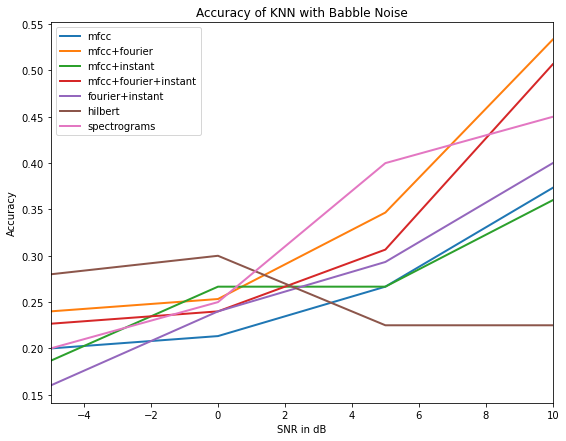

In [14]:
fig, ax = plt.subplots(figsize=[9, 7])

for feature in list_features:
    df=df_babble_acc.loc[df_babble_acc['Feature']==feature]
    ax.plot(df['SNR'],df['KNN'], linewidth=2, label=feature)
ax.set_xlabel('SNR in dB')
ax.set_ylabel('Accuracy')
plt.title("Accuracy of KNN with Babble Noise")
plt.xlim(-5, 10)
plt.legend()
plt.show()

**Plot for Accuracy of KNN with High Frequency Channel Noise**

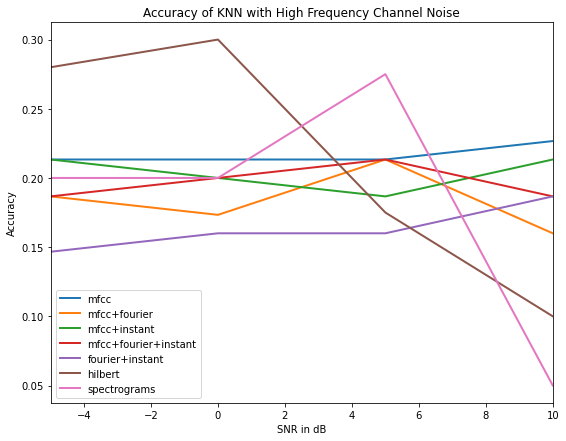

In [15]:
fig, ax = plt.subplots(figsize=[9, 7])

for feature in list_features:
    df=df_hf_acc.loc[df_hf_acc['Feature']==feature]
    ax.plot(df['SNR'],df['KNN'], linewidth=2, label=feature)
ax.set_xlabel('SNR in dB')
ax.set_ylabel('Accuracy')
plt.title("Accuracy of KNN with High Frequency Channel Noise")
plt.xlim(-5, 10)
plt.legend()
plt.show()

**Plot for Accuracy of KNN with White Noise**

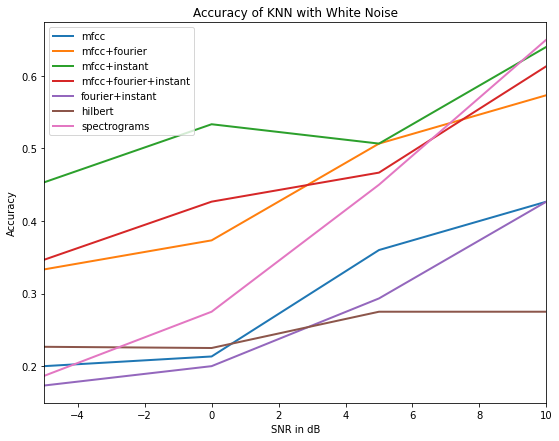

In [16]:
fig, ax = plt.subplots(figsize=[9, 7])

for feature in list_features:
        df=df_WN_acc.loc[df_WN_acc['Feature']==feature]
        ax.plot(df['SNR'],df['KNN'], linewidth=2, label=feature)
ax.set_xlabel('SNR in dB')
ax.set_ylabel('Accuracy')
plt.title("Accuracy of KNN with White Noise")
plt.xlim(-5, 10)
plt.legend()
plt.show()

**Plot for MAE of KNN with Babble Noise**

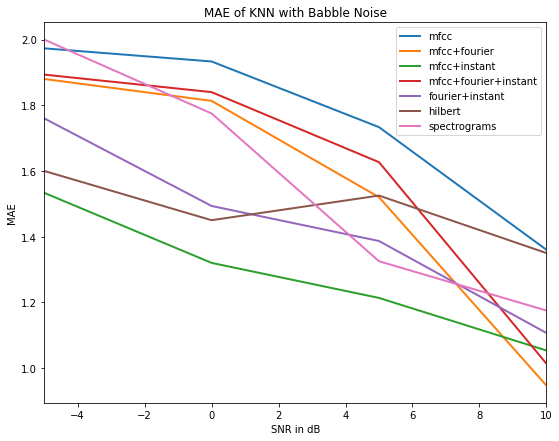

In [61]:
fig, ax = plt.subplots(figsize=[9, 7])

for feature in list_features:
        df=df_babble_mae.loc[df_babble_mae['Feature']==feature]
        ax.plot(df['SNR'],df['KNN'], linewidth=2, label=feature)
ax.set_xlabel('SNR in dB')
ax.set_ylabel('MAE')
plt.title("MAE of KNN with Babble Noise")
plt.xlim(-5, 10)
plt.legend()
plt.show()

**Plot for MAE of KNN with High Frequency Channel Noise**

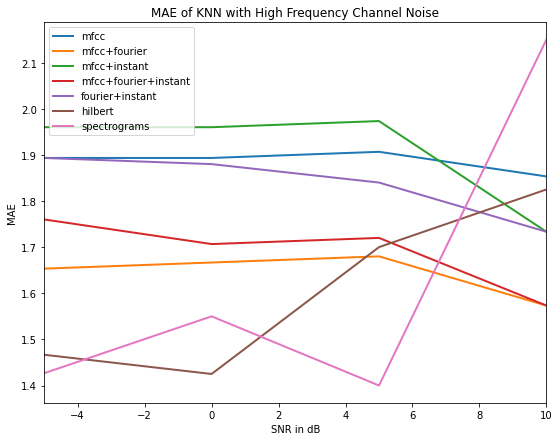

In [60]:
fig, ax = plt.subplots(figsize=[9, 7])

for feature in list_features:
        df=df_hf_mae.loc[df_hf_mae['Feature']==feature]
        ax.plot(df['SNR'],df['KNN'], linewidth=2, label=feature)
ax.set_xlabel('SNR in dB')
ax.set_ylabel('MAE')
plt.title("MAE of KNN with High Frequency Channel Noise")
plt.xlim(-5, 10)
plt.legend()
plt.show()

**Plot for MAE of KNN with White Noise**

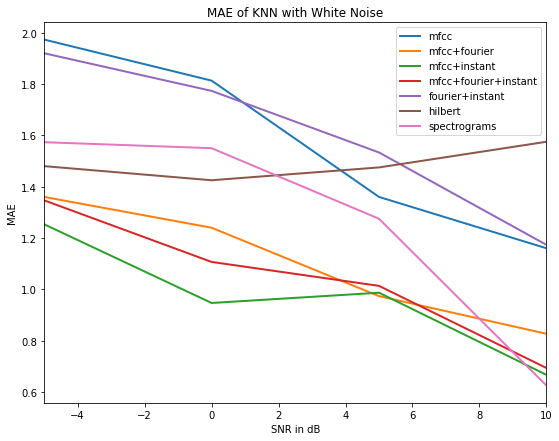

In [19]:
fig, ax = plt.subplots(figsize=[9, 7])

for feature in list_features:
        df=df_WN_mae.loc[df_WN_mae['Feature']==feature]
        ax.plot(df['SNR'],df['KNN'], linewidth=2, label=feature)
ax.set_xlabel('SNR in dB')
ax.set_ylabel('MAE')
plt.title("MAE of KNN with White Noise")
plt.xlim(-5, 10)
plt.legend()
plt.show()

**Plot for Accuracy of Gaussian Naive Bayes with Babble Noise**

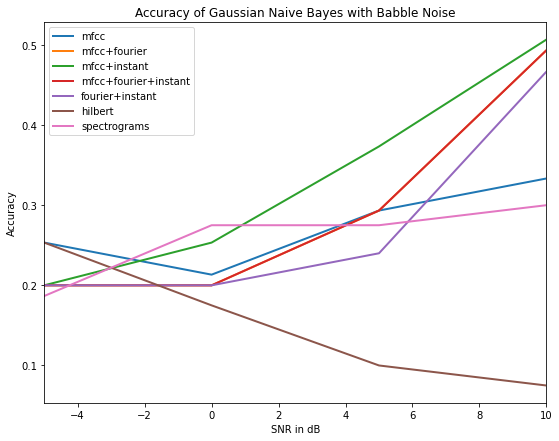

In [20]:
fig, ax = plt.subplots(figsize=[9, 7])

for feature in list_features:
    df=df_babble_acc.loc[df_babble_acc['Feature']==feature]
    ax.plot(df['SNR'],df['Gaussian Naive Bayes'], linewidth=2, label=feature)
ax.set_xlabel('SNR in dB')
ax.set_ylabel('Accuracy')
plt.title("Accuracy of Gaussian Naive Bayes with Babble Noise")
plt.xlim(-5, 10)
plt.legend()
plt.show()

**Plot for Accuracy of Gaussian Naive Bayes with High Frequency Channel Noise**

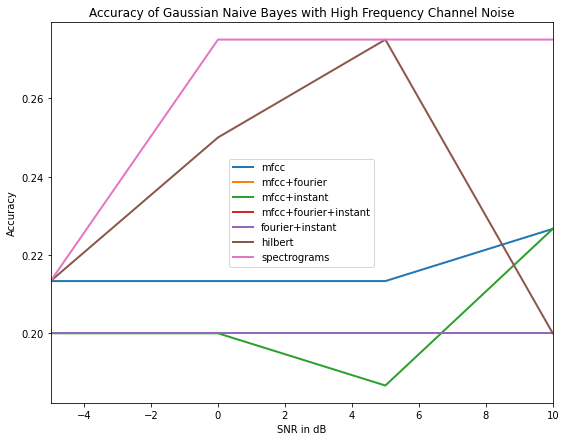

In [21]:
fig, ax = plt.subplots(figsize=[9, 7])

for feature in list_features:
    df=df_hf_acc.loc[df_hf_acc['Feature']==feature]
    ax.plot(df['SNR'],df['Gaussian Naive Bayes'], linewidth=2, label=feature)
ax.set_xlabel('SNR in dB')
ax.set_ylabel('Accuracy')
plt.title("Accuracy of Gaussian Naive Bayes with High Frequency Channel Noise")
plt.xlim(-5, 10)
plt.legend()
plt.show()

**Plot for Accuracy of Gaussian Naive Bayes with White Noise**

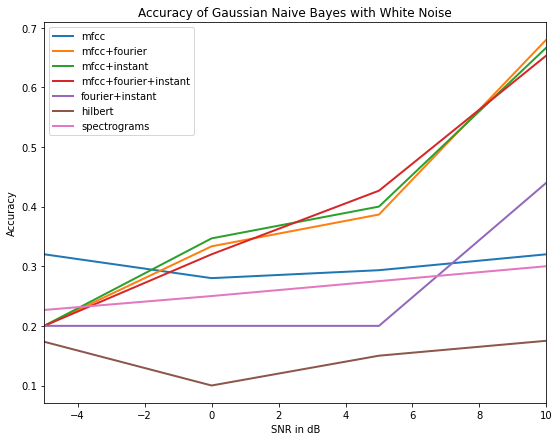

In [22]:
fig, ax = plt.subplots(figsize=[9, 7])

for feature in list_features:
        df=df_WN_acc.loc[df_WN_acc['Feature']==feature]
        ax.plot(df['SNR'],df['Gaussian Naive Bayes'], linewidth=2, label=feature)
ax.set_xlabel('SNR in dB')
ax.set_ylabel('Accuracy')
plt.title("Accuracy of Gaussian Naive Bayes with White Noise")
plt.xlim(-5, 10)
plt.legend()
plt.show()

**Plot for MAE of Gaussian Naive Bayes with Babble Noise**

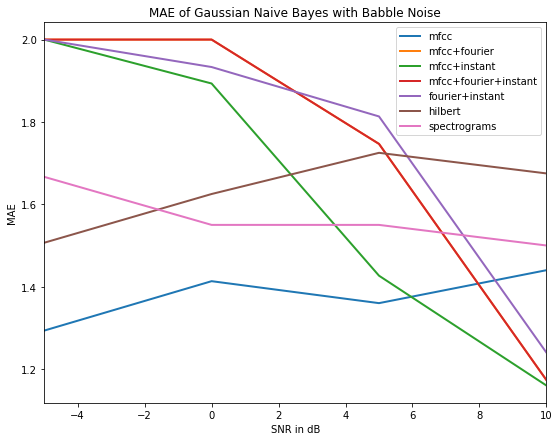

In [23]:
fig, ax = plt.subplots(figsize=[9, 7])

for feature in list_features:
        df=df_babble_mae.loc[df_babble_mae['Feature']==feature]
        ax.plot(df['SNR'],df['Gaussian Naive Bayes'], linewidth=2, label=feature)
ax.set_xlabel('SNR in dB')
ax.set_ylabel('MAE')
plt.title("MAE of Gaussian Naive Bayes with Babble Noise")
plt.xlim(-5, 10)
plt.legend()
plt.show()

**Plot for MAE of Gaussian Naive Bayes with High Frequency Channel Noise**

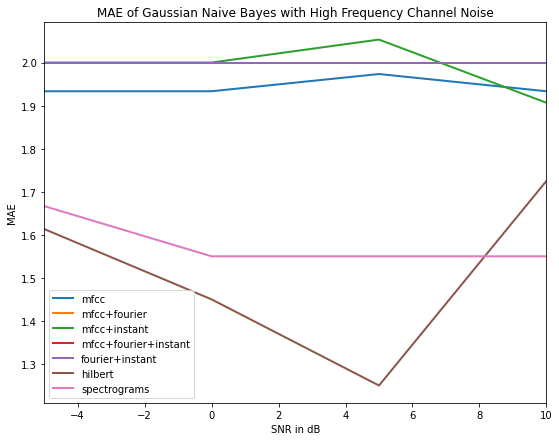

In [24]:
fig, ax = plt.subplots(figsize=[9, 7])

for feature in list_features:
        df=df_hf_mae.loc[df_hf_mae['Feature']==feature]
        ax.plot(df['SNR'],df['Gaussian Naive Bayes'], linewidth=2, label=feature)
ax.set_xlabel('SNR in dB')
ax.set_ylabel('MAE')
plt.title("MAE of Gaussian Naive Bayes with High Frequency Channel Noise")
plt.xlim(-5, 10)
plt.legend()
plt.show()

**Plot for MAE of Gaussian Naive Bayes with White Noise**

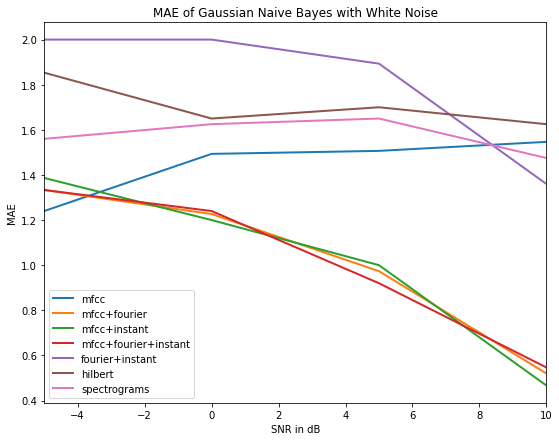

In [25]:
fig, ax = plt.subplots(figsize=[9, 7])

for feature in list_features:
        df=df_WN_mae.loc[df_WN_mae['Feature']==feature]
        ax.plot(df['SNR'],df['Gaussian Naive Bayes'], linewidth=2, label=feature)
ax.set_xlabel('SNR in dB')
ax.set_ylabel('MAE')
plt.title("MAE of Gaussian Naive Bayes with White Noise")
plt.xlim(-5, 10)
plt.legend()
plt.show()

**Plot for Accuracy of Support Vector Machine with Babble Noise**

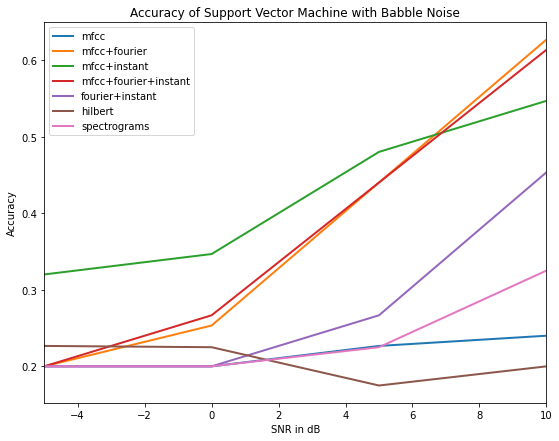

In [26]:
fig, ax = plt.subplots(figsize=[9, 7])

for feature in list_features:
    df=df_babble_acc.loc[df_babble_acc['Feature']==feature]
    ax.plot(df['SNR'],df['Support Vector Machine'], linewidth=2, label=feature)
ax.set_xlabel('SNR in dB')
ax.set_ylabel('Accuracy')
plt.title("Accuracy of Support Vector Machine with Babble Noise")
plt.xlim(-5, 10)
plt.legend()
plt.show()

**Plot for Accuracy of Support Vector Machine with High Frequency Channel Noise**

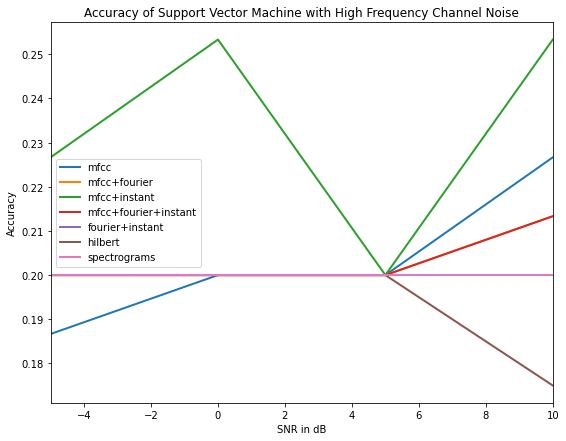

In [27]:
fig, ax = plt.subplots(figsize=[9, 7])

for feature in list_features:
    df=df_hf_acc.loc[df_hf_acc['Feature']==feature]
    ax.plot(df['SNR'],df['Support Vector Machine'], linewidth=2, label=feature)
ax.set_xlabel('SNR in dB')
ax.set_ylabel('Accuracy')
plt.title("Accuracy of Support Vector Machine with High Frequency Channel Noise")
plt.xlim(-5, 10)
plt.legend()
plt.show()

**Plot for Accuracy of Support Vector Machine with White Noise**

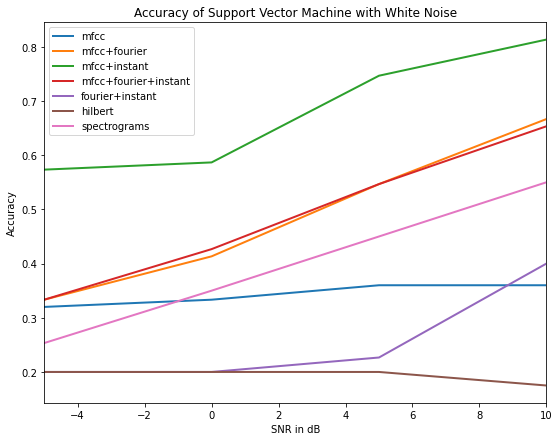

In [28]:
fig, ax = plt.subplots(figsize=[9, 7])

for feature in list_features:
        df=df_WN_acc.loc[df_WN_acc['Feature']==feature]
        ax.plot(df['SNR'],df['Support Vector Machine'], linewidth=2, label=feature)
ax.set_xlabel('SNR in dB')
ax.set_ylabel('Accuracy')
plt.title("Accuracy of Support Vector Machine with White Noise")
plt.xlim(-5, 10)
plt.legend()
plt.show()

**Plot for MAE of Support Vector Machine with Babble Noise**

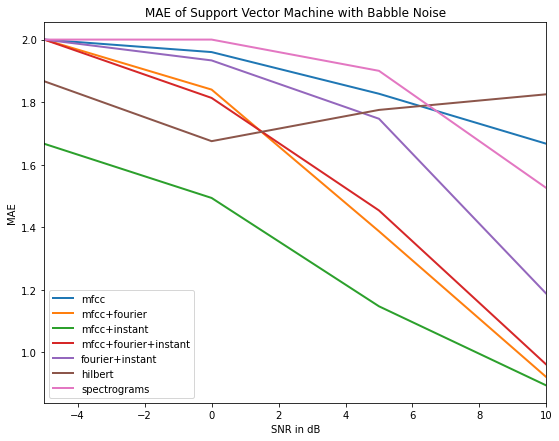

In [29]:
fig, ax = plt.subplots(figsize=[9, 7])

for feature in list_features:
        df=df_babble_mae.loc[df_babble_mae['Feature']==feature]
        ax.plot(df['SNR'],df['Support Vector Machine'], linewidth=2, label=feature)
ax.set_xlabel('SNR in dB')
ax.set_ylabel('MAE')
plt.title("MAE of Support Vector Machine with Babble Noise")
plt.xlim(-5, 10)
plt.legend()
plt.show()

**Plot for MAE of Support Vector Machine with High Frequency Channel Noise**

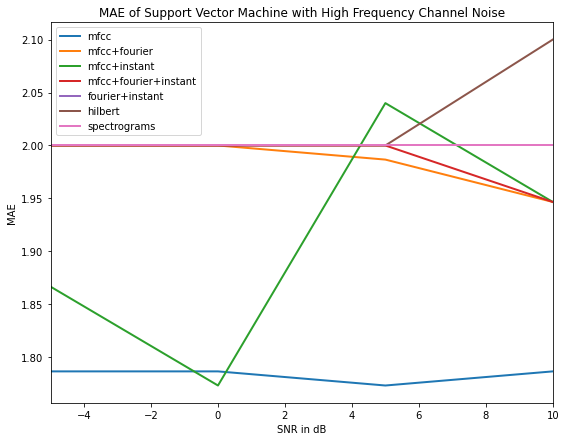

In [30]:
fig, ax = plt.subplots(figsize=[9, 7])

for feature in list_features:
        df=df_hf_mae.loc[df_hf_mae['Feature']==feature]
        ax.plot(df['SNR'],df['Support Vector Machine'], linewidth=2, label=feature)
ax.set_xlabel('SNR in dB')
ax.set_ylabel('MAE')
plt.title("MAE of Support Vector Machine with High Frequency Channel Noise")
plt.xlim(-5, 10)
plt.legend()
plt.show()

**Plot for MAE of Support Vector Machine with White Noise**

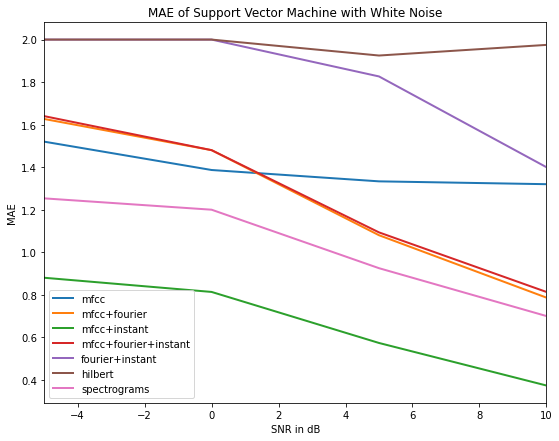

In [31]:
fig, ax = plt.subplots(figsize=[9, 7])

for feature in list_features:
        df=df_WN_mae.loc[df_WN_mae['Feature']==feature]
        ax.plot(df['SNR'],df['Support Vector Machine'], linewidth=2, label=feature)
ax.set_xlabel('SNR in dB')
ax.set_ylabel('MAE')
plt.title("MAE of Support Vector Machine with White Noise")
plt.xlim(-5, 10)
plt.legend()
plt.show()

**Plot for Accuracy of Decesion Tree with Babble Noise**

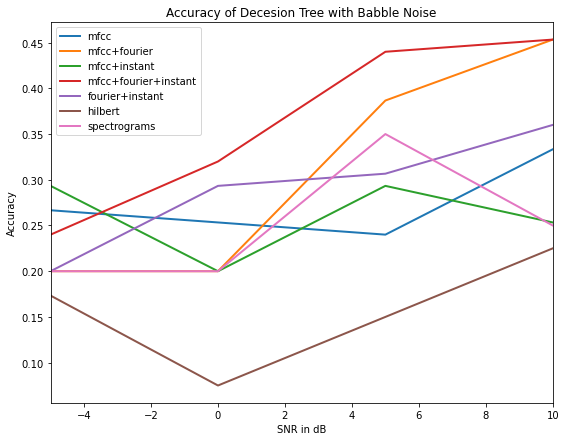

In [32]:
fig, ax = plt.subplots(figsize=[9, 7])

for feature in list_features:
    df=df_babble_acc.loc[df_babble_acc['Feature']==feature]
    ax.plot(df['SNR'],df['Decesion Tree'], linewidth=2, label=feature)
ax.set_xlabel('SNR in dB')
ax.set_ylabel('Accuracy')
plt.title("Accuracy of Decesion Tree with Babble Noise")
plt.xlim(-5, 10)
plt.legend()
plt.show()

**Plot for Accuracy of Decesion Tree with High Frequency Channel Noise**

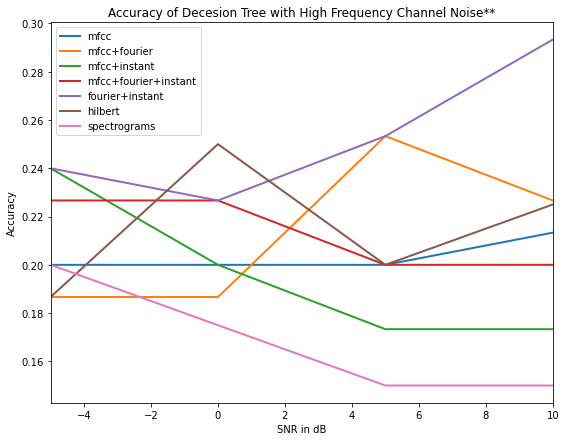

In [33]:
fig, ax = plt.subplots(figsize=[9, 7])

for feature in list_features:
    df=df_hf_acc.loc[df_hf_acc['Feature']==feature]
    ax.plot(df['SNR'],df['Decesion Tree'], linewidth=2, label=feature)
ax.set_xlabel('SNR in dB')
ax.set_ylabel('Accuracy')
plt.title("Accuracy of Decesion Tree with High Frequency Channel Noise**")
plt.xlim(-5, 10)
plt.legend()
plt.show()

**Plot for Accuracy of Decesion Tree with White Noise**

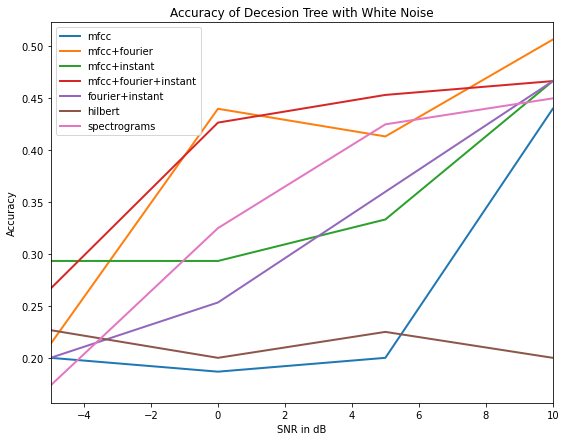

In [34]:
fig, ax = plt.subplots(figsize=[9, 7])

for feature in list_features:
        df=df_WN_acc.loc[df_WN_acc['Feature']==feature]
        ax.plot(df['SNR'],df['Decesion Tree'], linewidth=2, label=feature)
ax.set_xlabel('SNR in dB')
ax.set_ylabel('Accuracy')
plt.title("Accuracy of Decesion Tree with White Noise")
plt.xlim(-5, 10)
plt.legend()
plt.show()

**Plot for MAE of Decesion Tree with Babble Noise**

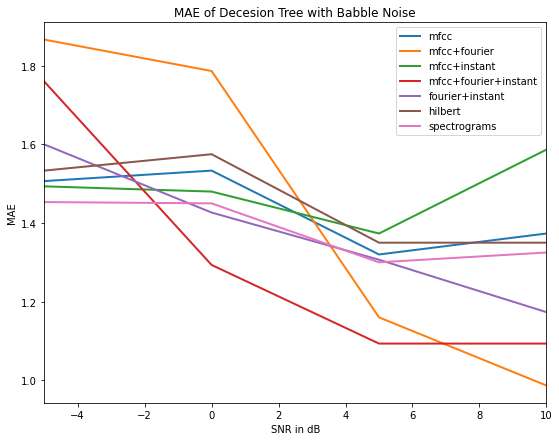

In [35]:
fig, ax = plt.subplots(figsize=[9, 7])

for feature in list_features:
        df=df_babble_mae.loc[df_babble_mae['Feature']==feature]
        ax.plot(df['SNR'],df['Decesion Tree'], linewidth=2, label=feature)
ax.set_xlabel('SNR in dB')
ax.set_ylabel('MAE')
plt.title("MAE of Decesion Tree with Babble Noise")
plt.xlim(-5, 10)
plt.legend()
plt.show()

**Plot for MAE of Decesion Tree with High Frequency Channel Noise**

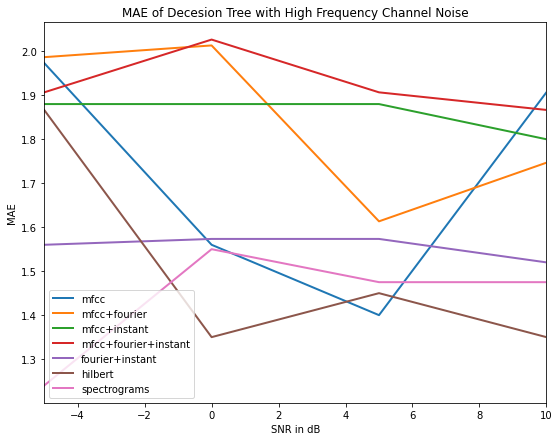

In [36]:
fig, ax = plt.subplots(figsize=[9, 7])

for feature in list_features:
        df=df_hf_mae.loc[df_hf_mae['Feature']==feature]
        ax.plot(df['SNR'],df['Decesion Tree'], linewidth=2, label=feature)
ax.set_xlabel('SNR in dB')
ax.set_ylabel('MAE')
plt.title("MAE of Decesion Tree with High Frequency Channel Noise")
plt.xlim(-5, 10)
plt.legend()
plt.show()

**Plot for MAE of Decesion Tree with White Noise**

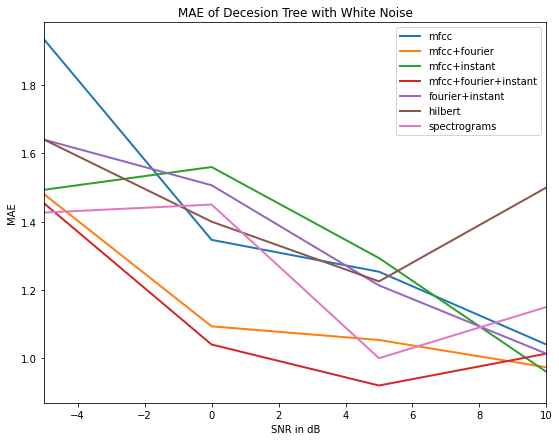

In [37]:
fig, ax = plt.subplots(figsize=[9, 7])

for feature in list_features:
        df=df_WN_mae.loc[df_WN_mae['Feature']==feature]
        ax.plot(df['SNR'],df['Decesion Tree'], linewidth=2, label=feature)
ax.set_xlabel('SNR in dB')
ax.set_ylabel('MAE')
plt.xlim(-5, 10)
plt.title("MAE of Decesion Tree with White Noise")
plt.legend()
plt.show()

**Plot for Accuracy of Random Forest Classifier with Babble Noise**

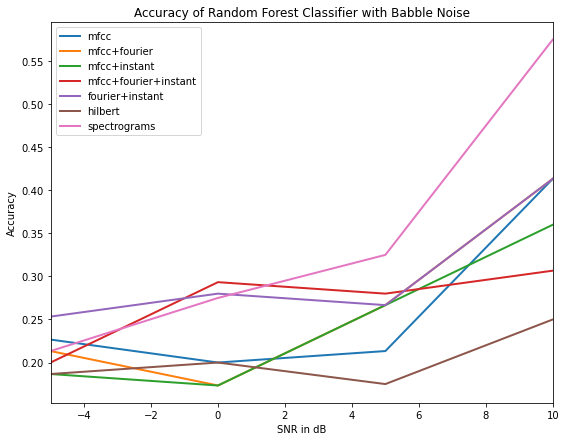

In [38]:
fig, ax = plt.subplots(figsize=[9, 7])

for feature in list_features:
    df=df_babble_acc.loc[df_babble_acc['Feature']==feature]
    ax.plot(df['SNR'],df['Random Forest Classifier'], linewidth=2, label=feature)
ax.set_xlabel('SNR in dB')
ax.set_ylabel('Accuracy')
plt.title("Accuracy of Random Forest Classifier with Babble Noise")
plt.xlim(-5, 10)
plt.legend()
plt.show()

**Plot for Accuracy of Random Forest Classifier with High Frequency Channel Noise**

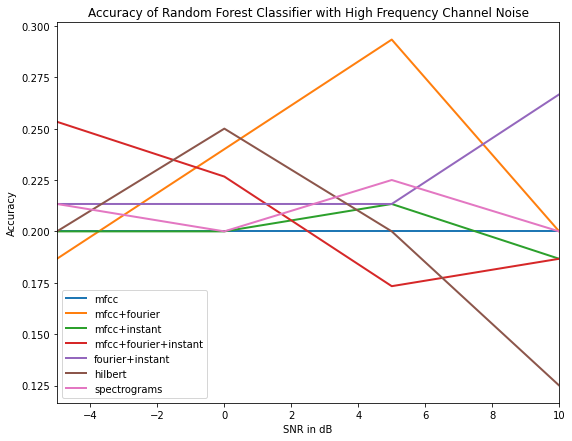

In [39]:
fig, ax = plt.subplots(figsize=[9, 7])

for feature in list_features:
    df=df_hf_acc.loc[df_hf_acc['Feature']==feature]
    ax.plot(df['SNR'],df['Random Forest Classifier'], linewidth=2, label=feature)
ax.set_xlabel('SNR in dB')
ax.set_ylabel('Accuracy')
plt.title("Accuracy of Random Forest Classifier with High Frequency Channel Noise")
plt.xlim(-5, 10)
plt.legend()
plt.show()

**Plot for Accuracy of Random Forest Classifier with White Noise**

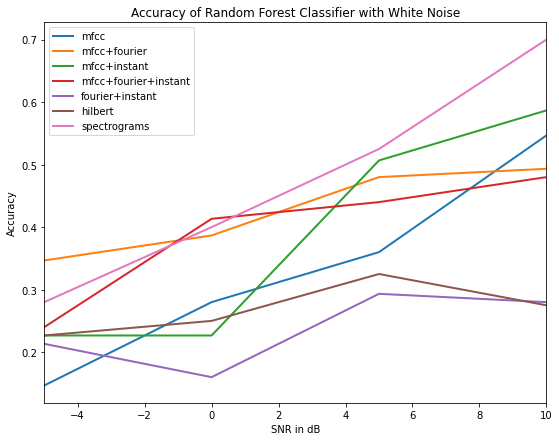

In [40]:
fig, ax = plt.subplots(figsize=[9, 7])

for feature in list_features:
        df=df_WN_acc.loc[df_WN_acc['Feature']==feature]
        ax.plot(df['SNR'],df['Random Forest Classifier'], linewidth=2, label=feature)
ax.set_xlabel('SNR in dB')
ax.set_ylabel('Accuracy')
plt.title("Accuracy of Random Forest Classifier with White Noise")
plt.xlim(-5, 10)
plt.legend()
plt.show()

**Plot for MAE of Random Forest Classifier with Babble Noise**

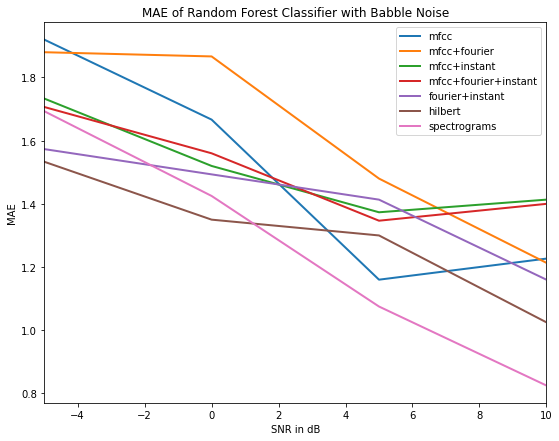

In [41]:
fig, ax = plt.subplots(figsize=[9, 7])

for feature in list_features:
        df=df_babble_mae.loc[df_babble_mae['Feature']==feature]
        ax.plot(df['SNR'],df['Random Forest Classifier'], linewidth=2, label=feature)
ax.set_xlabel('SNR in dB')
ax.set_ylabel('MAE')
plt.title("MAE of Random Forest Classifier with Babble Noise")
plt.xlim(-5, 10)
plt.legend()
plt.show()

**Plot for MAE of Random Forest Classifier with High Frequency Channel Noise**

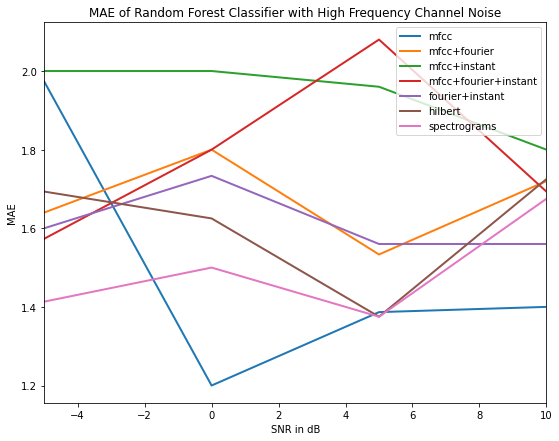

In [42]:
fig, ax = plt.subplots(figsize=[9, 7])

for feature in list_features:
        df=df_hf_mae.loc[df_hf_mae['Feature']==feature]
        ax.plot(df['SNR'],df['Random Forest Classifier'], linewidth=2, label=feature)
ax.set_xlabel('SNR in dB')
ax.set_ylabel('MAE')
plt.title("MAE of Random Forest Classifier with High Frequency Channel Noise")
plt.xlim(-5, 10)
plt.legend()
plt.show()

**Plot for MAE of Random Forest Classifier with White Noise**

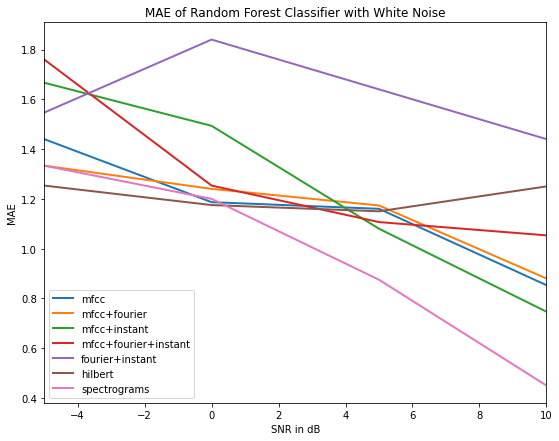

In [43]:
fig, ax = plt.subplots(figsize=[9, 7])

for feature in list_features:
        df=df_WN_mae.loc[df_WN_mae['Feature']==feature]
        ax.plot(df['SNR'],df['Random Forest Classifier'], linewidth=2, label=feature)
ax.set_xlabel('SNR in dB')
ax.set_ylabel('MAE')
plt.title("MAE of Random Forest Classifier with White Noise")
plt.xlim(-5, 10)
plt.legend()
plt.show()

**Plot for Accuracy of Logistic Regression with Babble Noise**

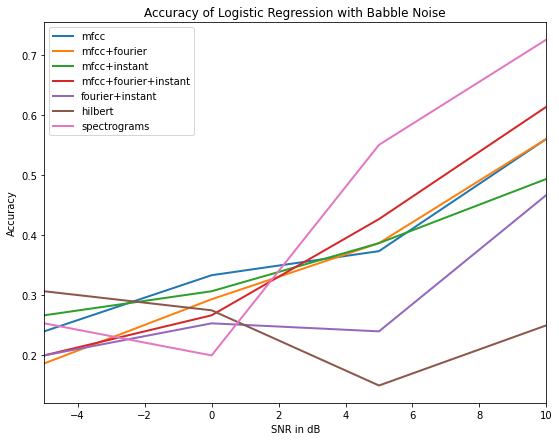

In [44]:
fig, ax = plt.subplots(figsize=[9, 7])

for feature in list_features:
    df=df_babble_acc.loc[df_babble_acc['Feature']==feature]
    ax.plot(df['SNR'],df['Logistic Regression'], linewidth=2, label=feature)
ax.set_xlabel('SNR in dB')
ax.set_ylabel('Accuracy')
plt.title("Accuracy of Logistic Regression with Babble Noise")
plt.xlim(-5, 10)
plt.legend()
plt.show()

**Plot for Accuracy of Logistic Regression with High Frequency Channel Noise**

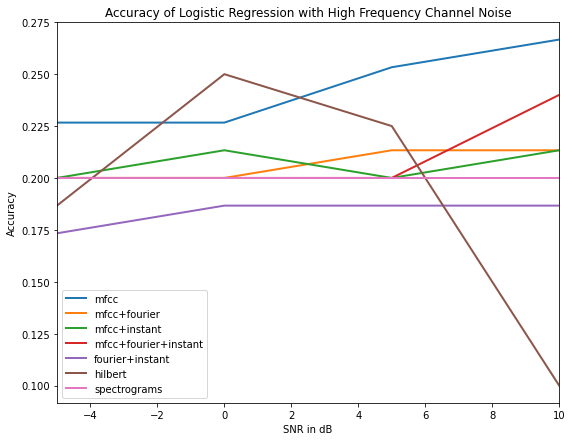

In [45]:
fig, ax = plt.subplots(figsize=[9, 7])

for feature in list_features:
    df=df_hf_acc.loc[df_hf_acc['Feature']==feature]
    ax.plot(df['SNR'],df['Logistic Regression'], linewidth=2, label=feature)
ax.set_xlabel('SNR in dB')
ax.set_ylabel('Accuracy')
plt.title("Accuracy of Logistic Regression with High Frequency Channel Noise")
plt.xlim(-5, 10)
plt.legend()
plt.show()

**Plot for Accuracy of Logistic Regression with White Noise**

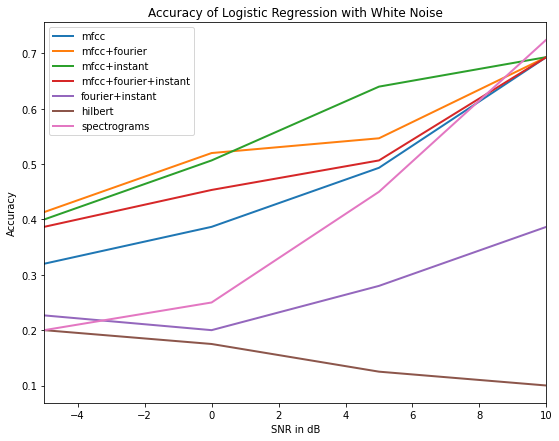

In [46]:
fig, ax = plt.subplots(figsize=[9, 7])

for feature in list_features:
        df=df_WN_acc.loc[df_WN_acc['Feature']==feature]
        ax.plot(df['SNR'],df['Logistic Regression'], linewidth=2, label=feature)
ax.set_xlabel('SNR in dB')
ax.set_ylabel('Accuracy')
plt.title("Accuracy of Logistic Regression with White Noise")
plt.xlim(-5, 10)
plt.legend()
plt.show()

**Plot for MAE of Logistic Regression with Babble Noise**

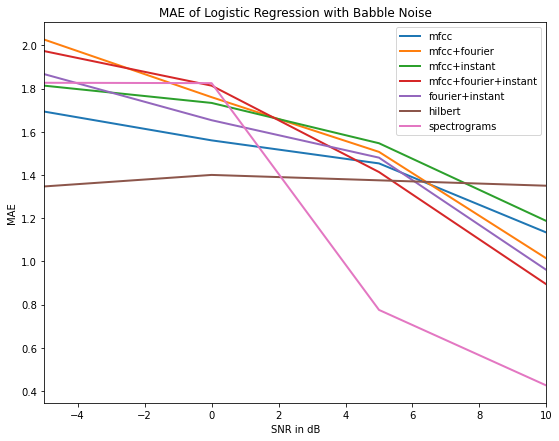

In [47]:
fig, ax = plt.subplots(figsize=[9, 7])

for feature in list_features:
        df=df_babble_mae.loc[df_babble_mae['Feature']==feature]
        ax.plot(df['SNR'],df['Logistic Regression'], linewidth=2, label=feature)
ax.set_xlabel('SNR in dB')
ax.set_ylabel('MAE')
plt.title("MAE of Logistic Regression with Babble Noise")
plt.xlim(-5, 10)
plt.legend()
plt.show()

**Plot for MAE of Logistic Regression with High Frequency Channel Noise**

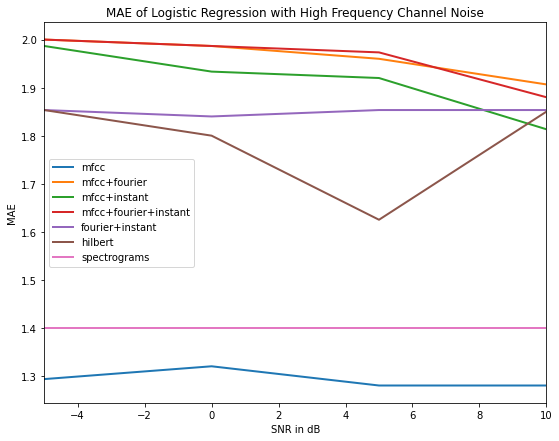

In [48]:
fig, ax = plt.subplots(figsize=[9, 7])

for feature in list_features:
        df=df_hf_mae.loc[df_hf_mae['Feature']==feature]
        ax.plot(df['SNR'],df['Logistic Regression'], linewidth=2, label=feature)
ax.set_xlabel('SNR in dB')
ax.set_ylabel('MAE')
plt.title("MAE of Logistic Regression with High Frequency Channel Noise")
plt.xlim(-5, 10)
plt.legend()
plt.show()

**Plot for MAE of Logistic Regression with White Noise**

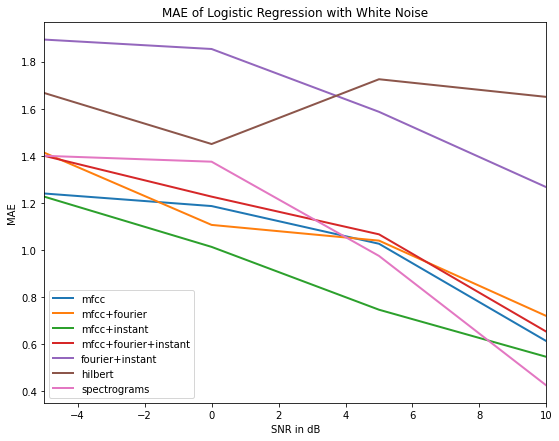

In [49]:
fig, ax = plt.subplots(figsize=[9, 7])

for feature in list_features:
        df=df_WN_mae.loc[df_WN_mae['Feature']==feature]
        ax.plot(df['SNR'],df['Logistic Regression'], linewidth=2, label=feature)
ax.set_xlabel('SNR in dB')
ax.set_ylabel('MAE')
plt.title("MAE of Logistic Regression with White Noise")
plt.xlim(-5, 10)
plt.legend()
plt.show()

**Plot for Accuracy using KNN on clean featuers**

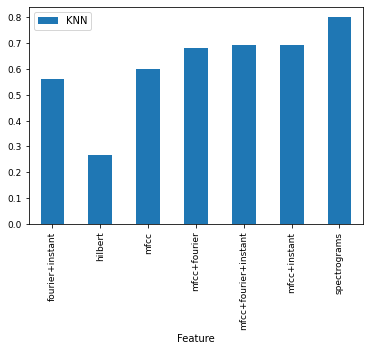

In [50]:
KNN_plot = df_clean_acc.plot.bar(x = 'Feature', y = 'KNN', fontsize='9')

**Plot for Accuracy using SVM on clean featuers**

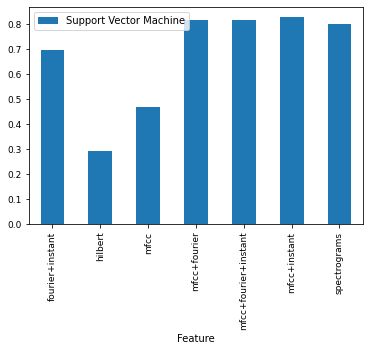

In [51]:
SVM_plot = df_clean_acc.plot.bar(x = 'Feature', y = 'Support Vector Machine', fontsize='9')

**Plot for Accuracy using Decision Tree on clean featuers**

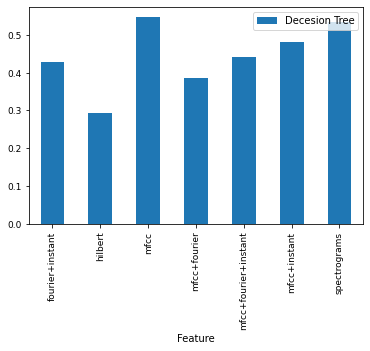

In [52]:
tree_plot = df_clean_acc.plot.bar(x = 'Feature', y = 'Decesion Tree', fontsize='9')

**Plot for Accuracy using Gaussian Naive Bayes on clean featuers**

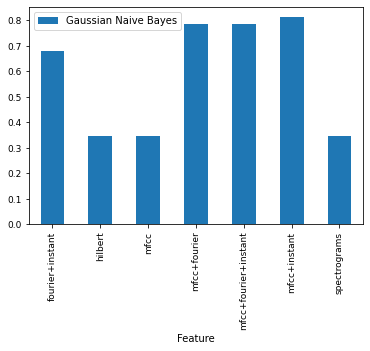

In [53]:
GNB_plot = df_clean_acc.plot.bar(x = 'Feature', y = 'Gaussian Naive Bayes', fontsize='9')

**Plot for Accuracy using Random Forest Classifier on clean featuers**

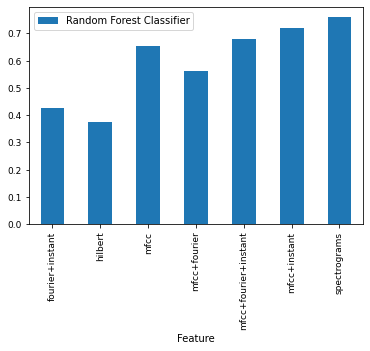

In [54]:
rfc_plot = df_clean_acc.plot.bar(x = 'Feature', y = 'Random Forest Classifier', fontsize='9')

**Plot for Accuracy using Logistic Regression on clean featuers**

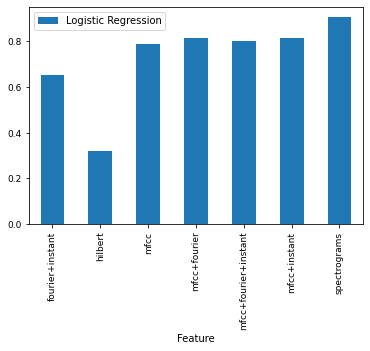

In [55]:
lr_plot = df_clean_acc.plot.bar(x = 'Feature', y = 'Logistic Regression', fontsize='9')

**Effect of different k's for KNN on Spectrogram**

In [56]:
training_data_dir  = "Speech_Data\French_spectrograms\French_spectrograms_TrainingData.npz"
training_label_dir = "Speech_Data\French_spectrograms\French_spectrograms_TrainingLabel.txt"
testing_data_dir   = "Speech_Data\French_spectrograms\French_spectrograms_TestingData.npz"
testing_label_dir  = "Speech_Data\French_spectrograms\French_spectrograms_TestingLabel.txt"

In [57]:
train_data=load(training_data_dir)
x_train=train_data["arr_0"]
test_data=load(testing_data_dir)
x_test=test_data["arr_0"]
y_train = convert_txt_List(training_label_dir)
y_test = convert_txt_List(testing_label_dir)

**Below plot explains how different values of K affect training and test set accuracy**

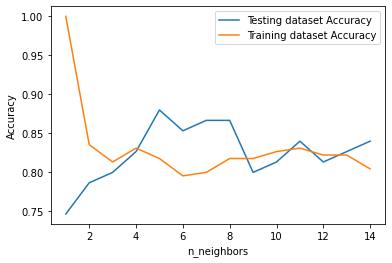

In [59]:
neighbors = np.arange(1, 15)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    predict = knn.predict(x_test)
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(x_train, y_train)
    test_accuracy[i] = knn.score(x_test, y_test)
  
    #Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
  
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()